## Breast Cancer Classifier Decision Tree 
**DATA 602:** University of Maryland Dec 2021 <br><br>
Authors: 
- Lauren Kuza
- David Long
- Alem Getu

Sources:
- https://quantdare.com/decision-trees-gini-vs-entropy/
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

In [86]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.metrics import plot_confusion_matrix as matrix
import matplotlib.pyplot as plt

#Read in Data;  Class 2 for benign 4 for malignant
cancer_data = pd.read_csv('Breast_Cancer_data.csv')
data_filtered = cancer_data[cancer_data['Bare Nuclei'] != '?'] #remove rows with missing data
data_filtered = data_filtered.astype('int64') #converts the object to int64

In [87]:
#function that if the Class is 2 make the Bare Nuclei value 1, and if Class is 4 make Bare Nuclei value 8
def update_missing_data(Bare,Class): 
  if Bare=='?' and Class == 2:
    Bare = 1 #avverage of Class 2, rounded
  elif Bare=='?' and Class == 4:
    Bare = 8 #average of Class 4, rounded
  else:
    Bare = Bare
  return Bare
cancer_data['Bare Nuclei'] = cancer_data.apply(lambda x: update_missing_data(x['Bare Nuclei'], x['Class']), axis =1)
cancer_data = cancer_data.astype('int64') #converts Vare Nuclei class from objects to int64
cancer_data.dtypes

id number                      int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [89]:
cancer_data.describe

<bound method NDFrame.describe of      id number  Clump Thickness  Uniformity of Cell Size  \
0      1000025                5                        1   
1      1002945                5                        4   
2      1015425                3                        1   
3      1016277                6                        8   
4      1017023                4                        1   
..         ...              ...                      ...   
694     776715                3                        1   
695     841769                2                        1   
696     888820                5                       10   
697     897471                4                        8   
698     897471                4                        8   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                           1                  1                            2   
1                           4                  5                            7   
2 

In [94]:
labels = cancer_data['Class']
features = ["Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses"]

#get dataframe of just features
#get all rows and just features columns
X = cancer_data.loc[:,features]
Y = cancer_data["Class"]
Y = Y.astype('int')

features
labels

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 699, dtype: int64

### K-Fold Cross Validation
We used sklearn cross validation to estimate optimal k value and criterion for our decision tree
- Criterion options "gini" or "entropy"
- K value range from 2 - 20

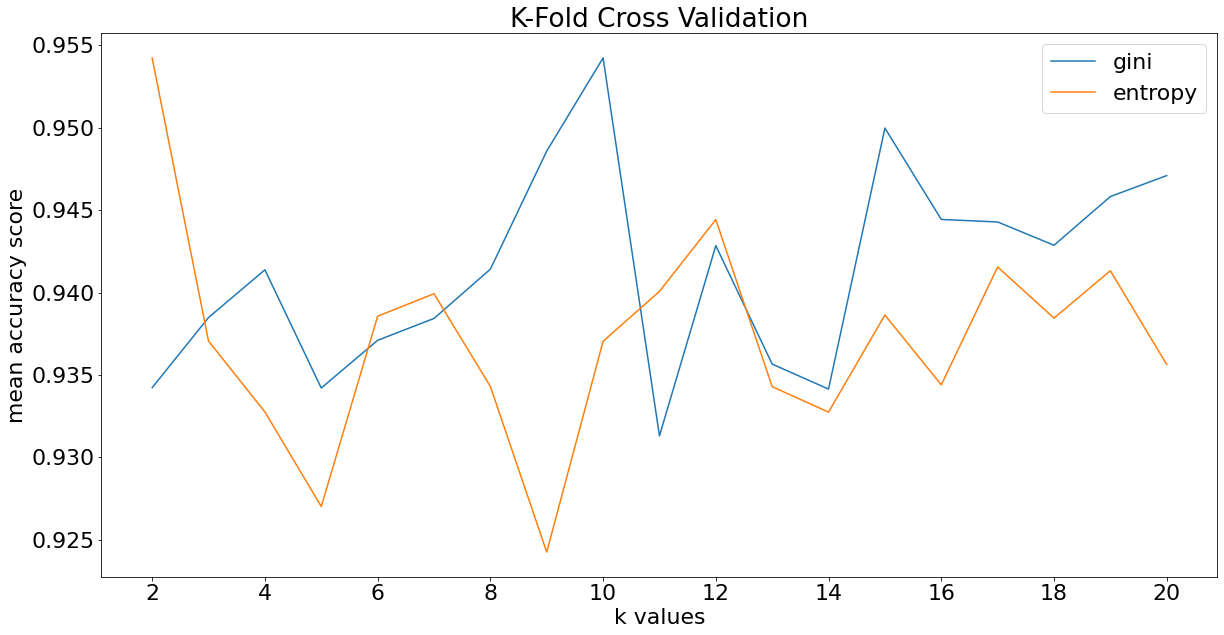

In [102]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
#Finally, create a scorer by calling make_scorer using the score function precision_score and pass the extra parameter pos_label="donated".

#set how many folds/combinations you want

clf = tree.DecisionTreeClassifier(random_state=0, criterion="gini")
clf_entropy = tree.DecisionTreeClassifier(random_state=0, criterion="entropy")

mean_scores = []
mean_scores_entropy = []
for k in range(2,21):
  scores = cross_val_score(clf, X, Y, cv=k)
  scores_entropy = cross_val_score(clf_entropy, X, Y, cv=k)
  mean_scores.append(scores.mean())
  mean_scores_entropy.append(scores_entropy.mean())

k_vals = list(range(2,21))

plt.figure(figsize=[20,10])
plt.plot(k_vals, mean_scores, label="gini") 
plt.plot(k_vals, mean_scores_entropy, label="entropy")
plt.legend()
plt.xlabel("k values")
plt.ylabel("mean accuracy score")
plt.title("K-Fold Cross Validation")
plt.xticks(np.arange(min(k_vals), max(k_vals)+1, 2.0))
plt.show()

In [97]:
#compute the mean accuracy, and the margin of error at 95% confidence interval. I.e., we are 95% confident that the mean
#accuracy is 68% +- 2 standard deviations/sqrt(k) (the more deviations the more confident we can be, widening the beam/net).
print("Accuracy = %0.2f%% (+/- %0.2f%%) @95%%" % (scores.mean()*100, (scores.std() * 1.96)/k**(1/2)*100))
# scores.mean()

Accuracy = 94.71% (+/- 1.74%) @95%


Average K-Fold Score : 0.9471008403361344
model score =  0.9285714285714286
[[456   2]
 [  3 238]]
model score =  0.9857142857142858
[[458   0]
 [  1 240]]
model score =  0.8714285714285714
[[454   4]
 [  5 236]]
model score =  0.9571428571428572
[[456   2]
 [  1 240]]
model score =  0.9285714285714286
[[456   2]
 [  3 238]]
model score =  0.9428571428571428


/var/folders/7l/g0kl_kjj3xzbr0mbt2mycs_w0000gn/T/ipykernel_7018/1392882543.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


[[457   1]
 [  3 238]]
model score =  0.9428571428571428
[[456   2]
 [  2 239]]
model score =  0.9142857142857143
[[456   2]
 [  4 237]]
model score =  0.9
[[454   4]
 [  3 238]]
model score =  0.9565217391304348
[[458   0]
 [  3 238]]


<Figure size 2160x2160 with 0 Axes>

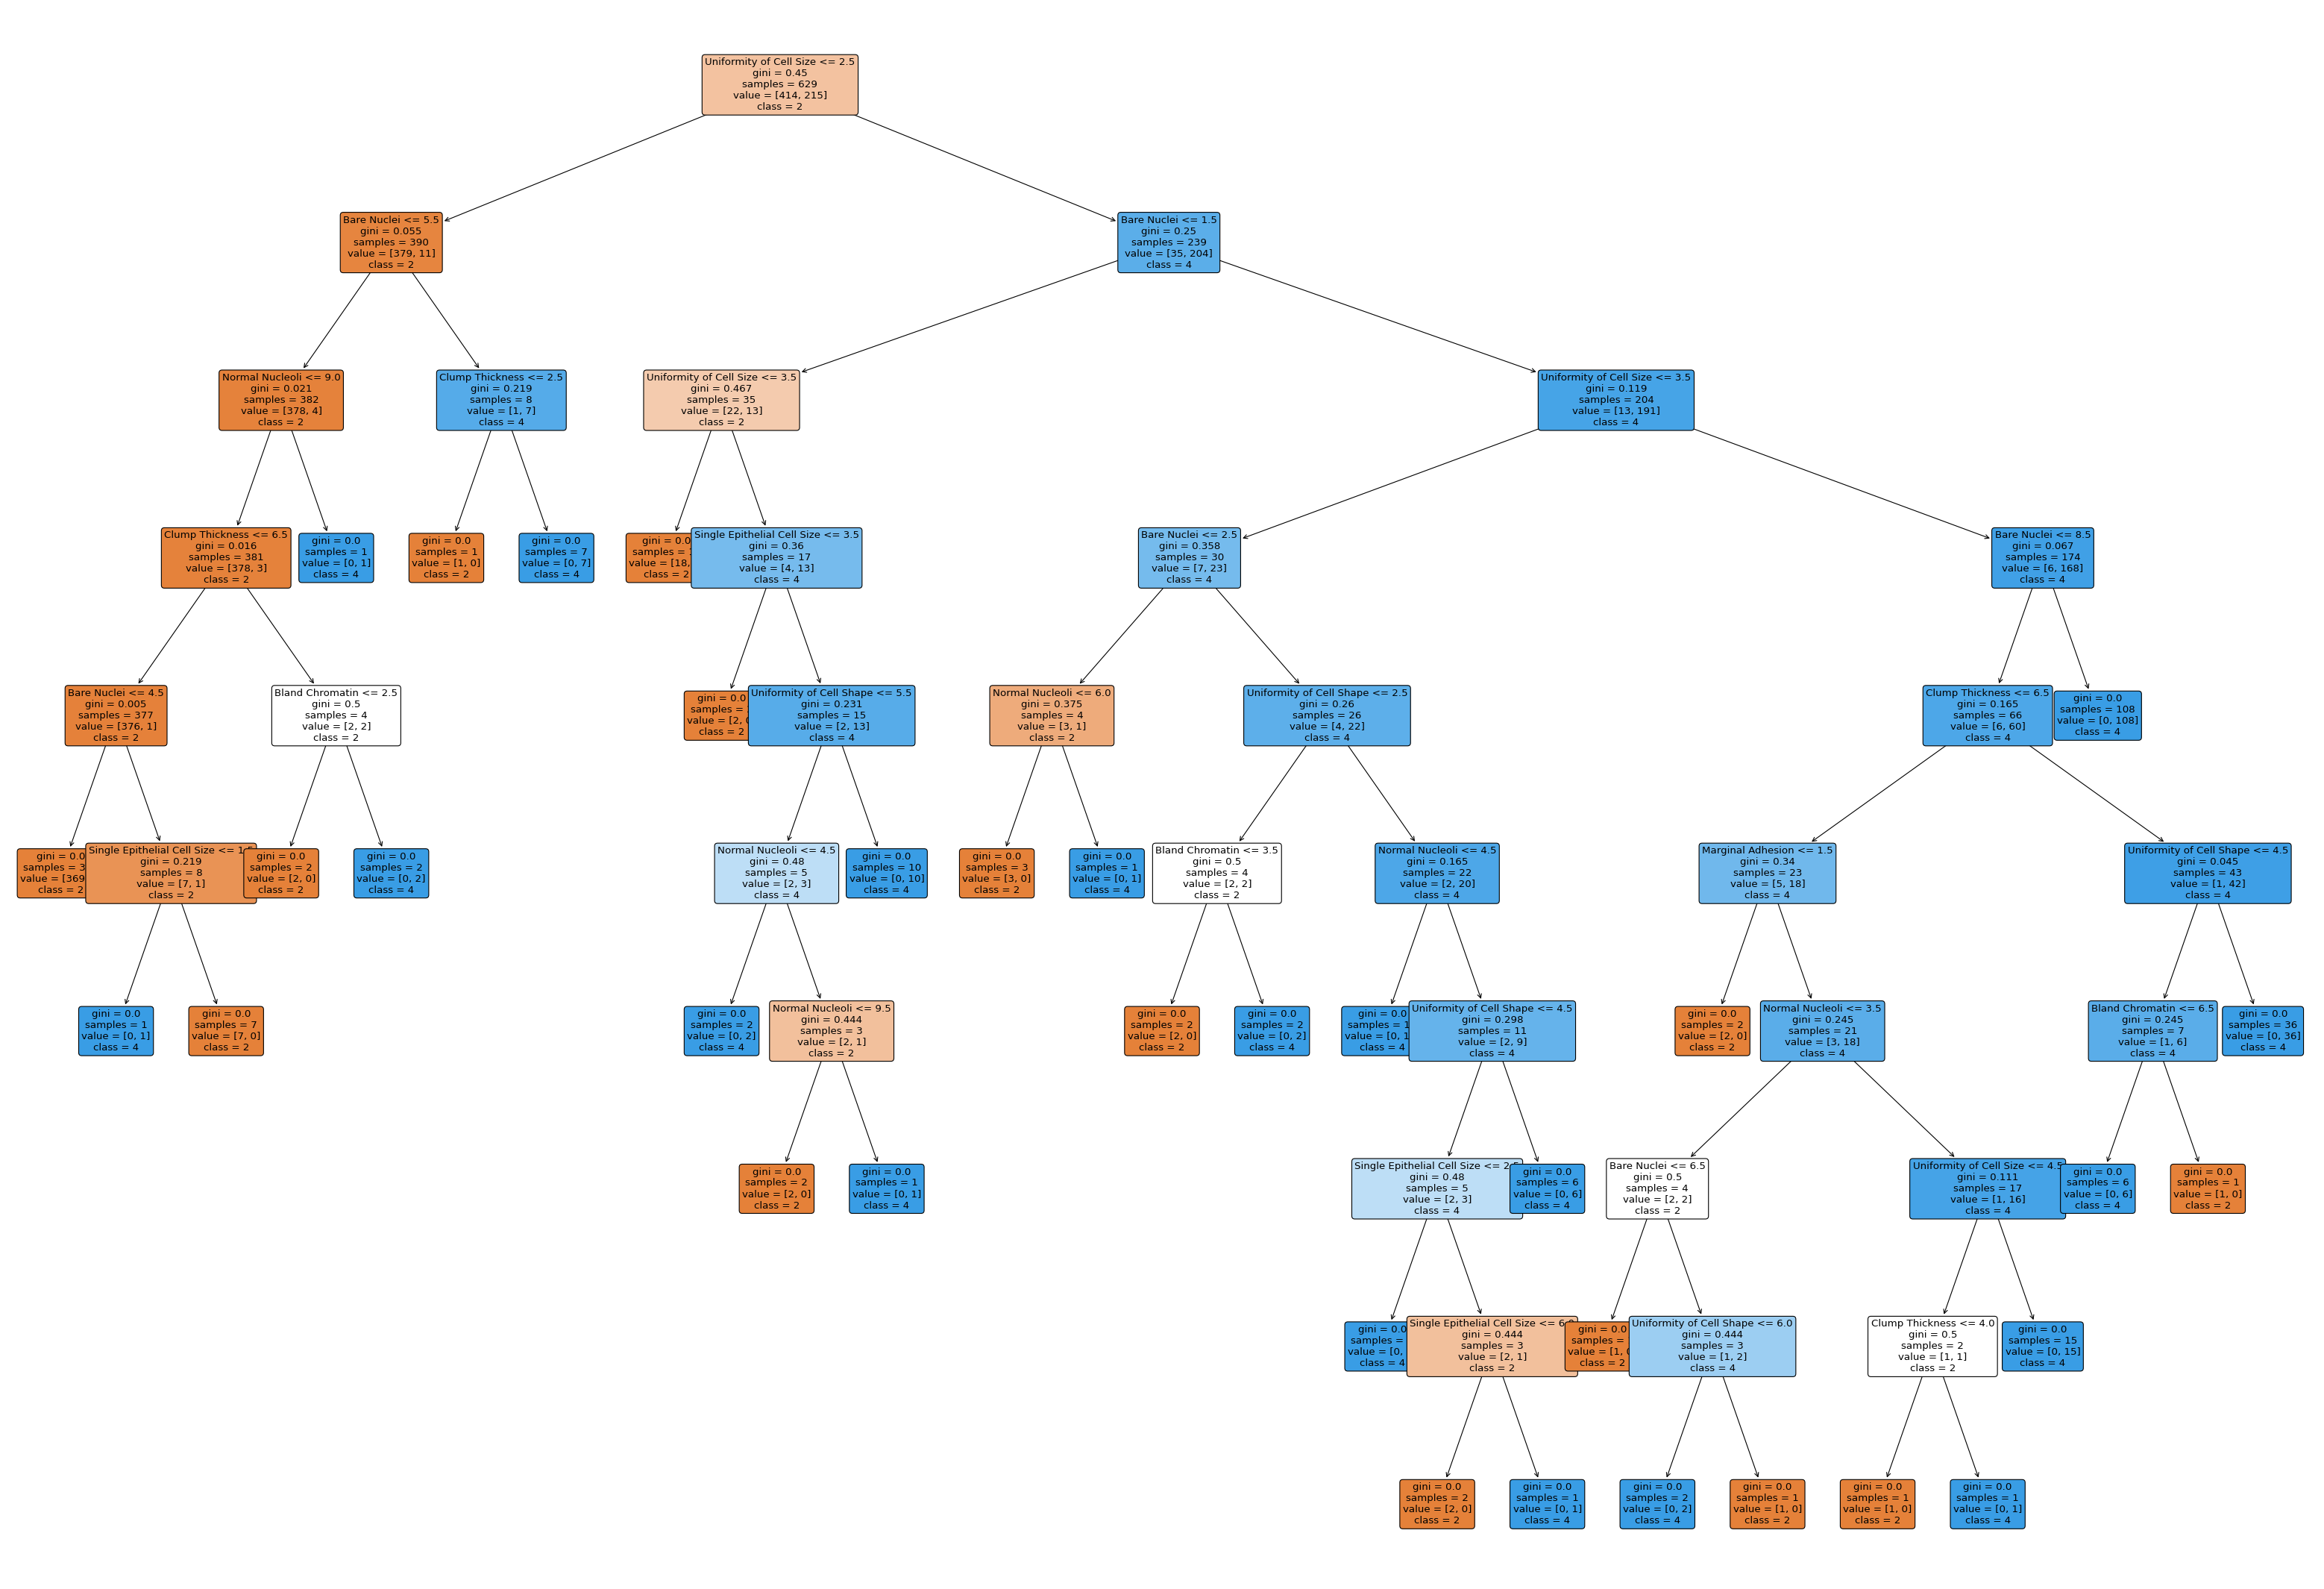

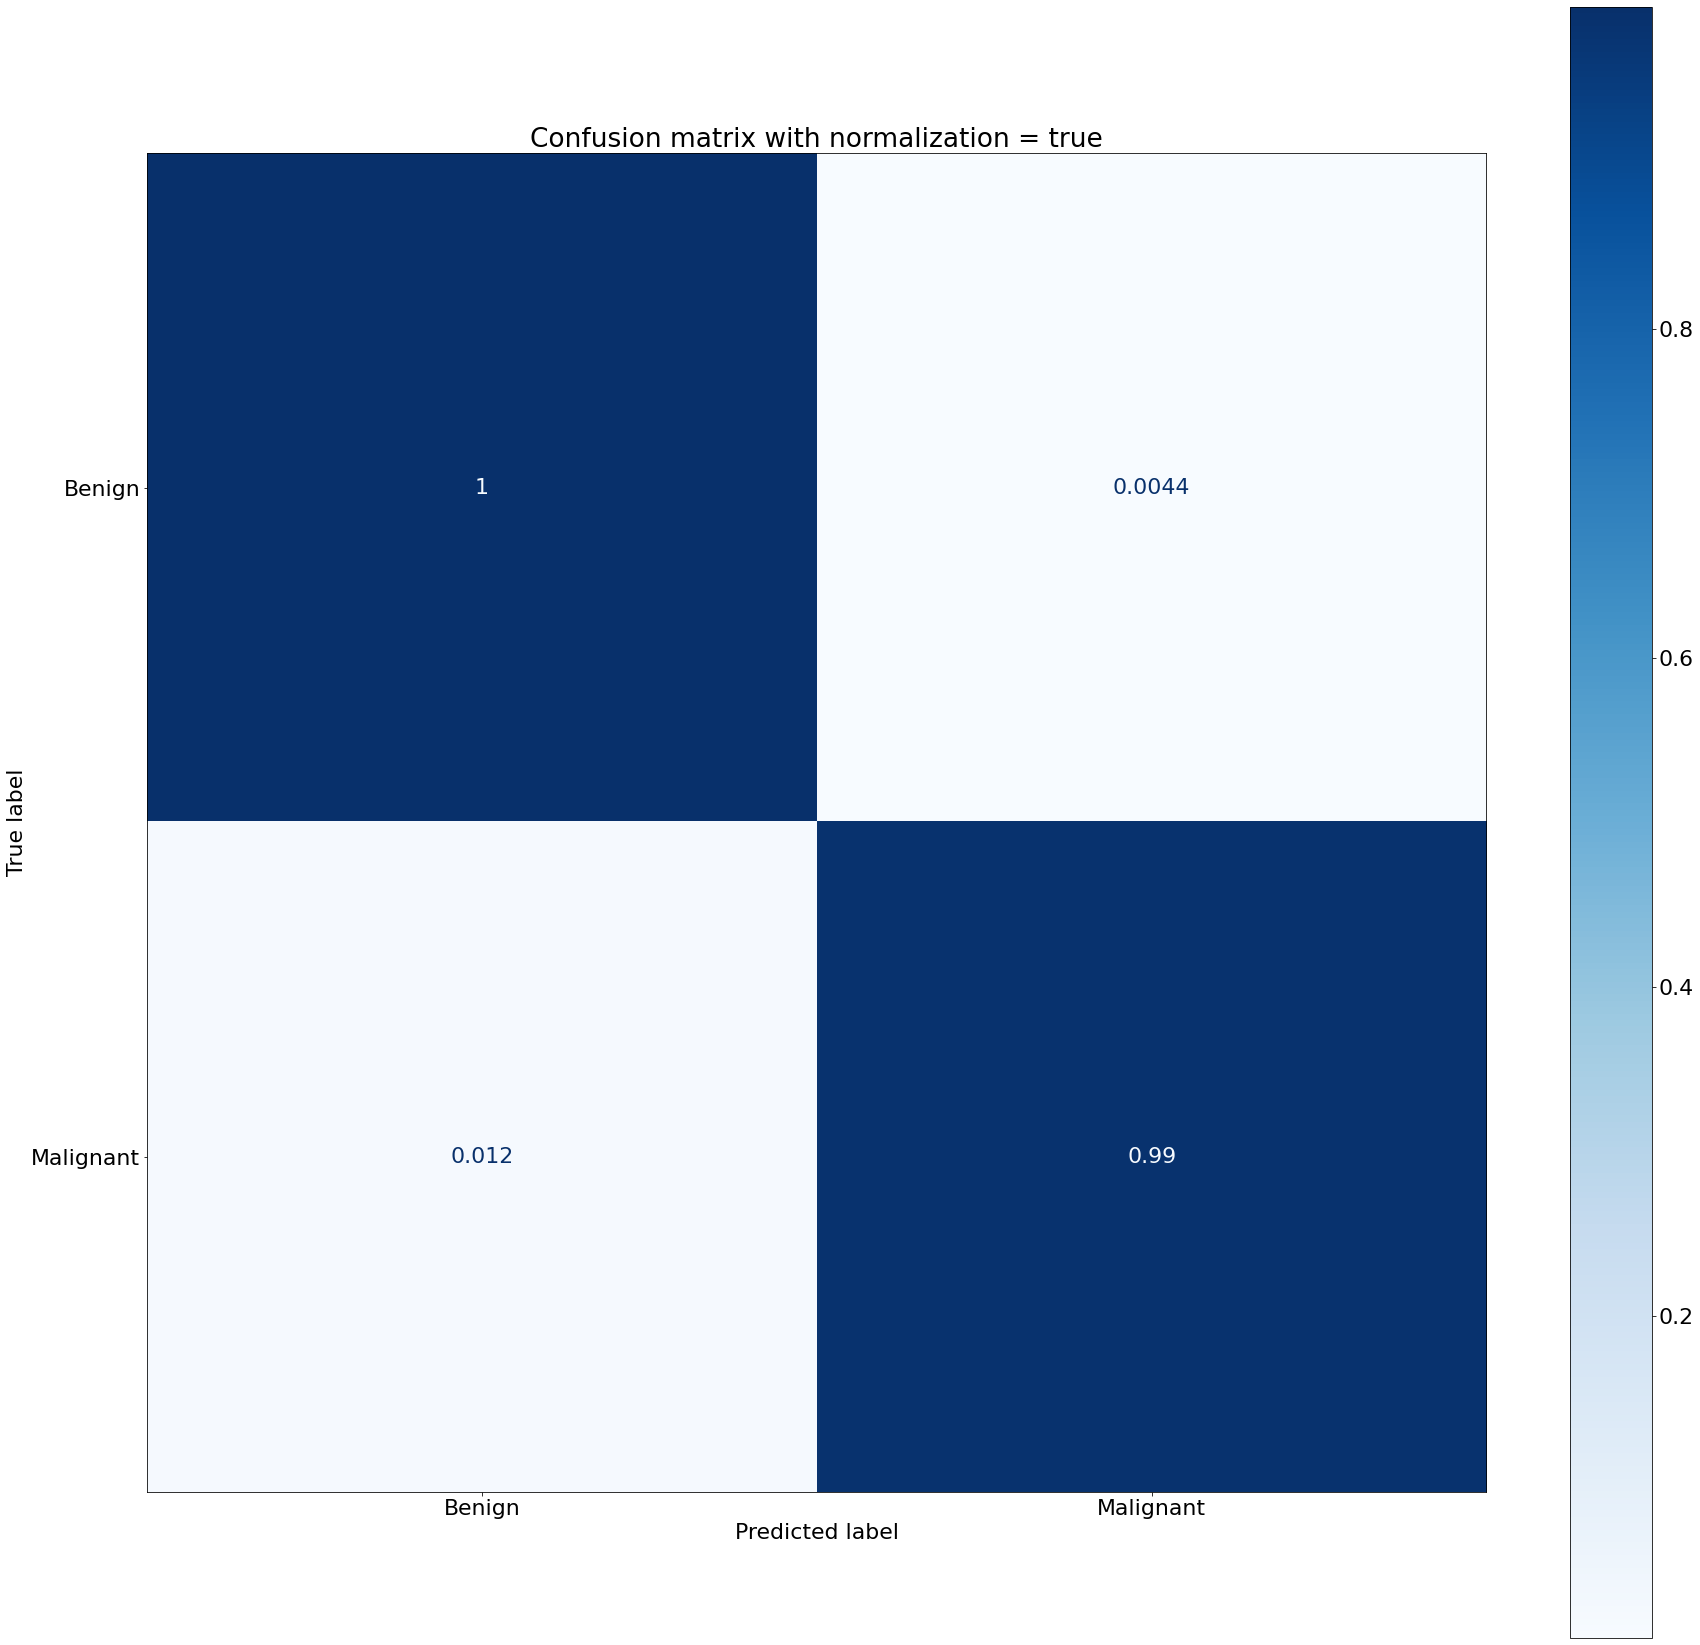

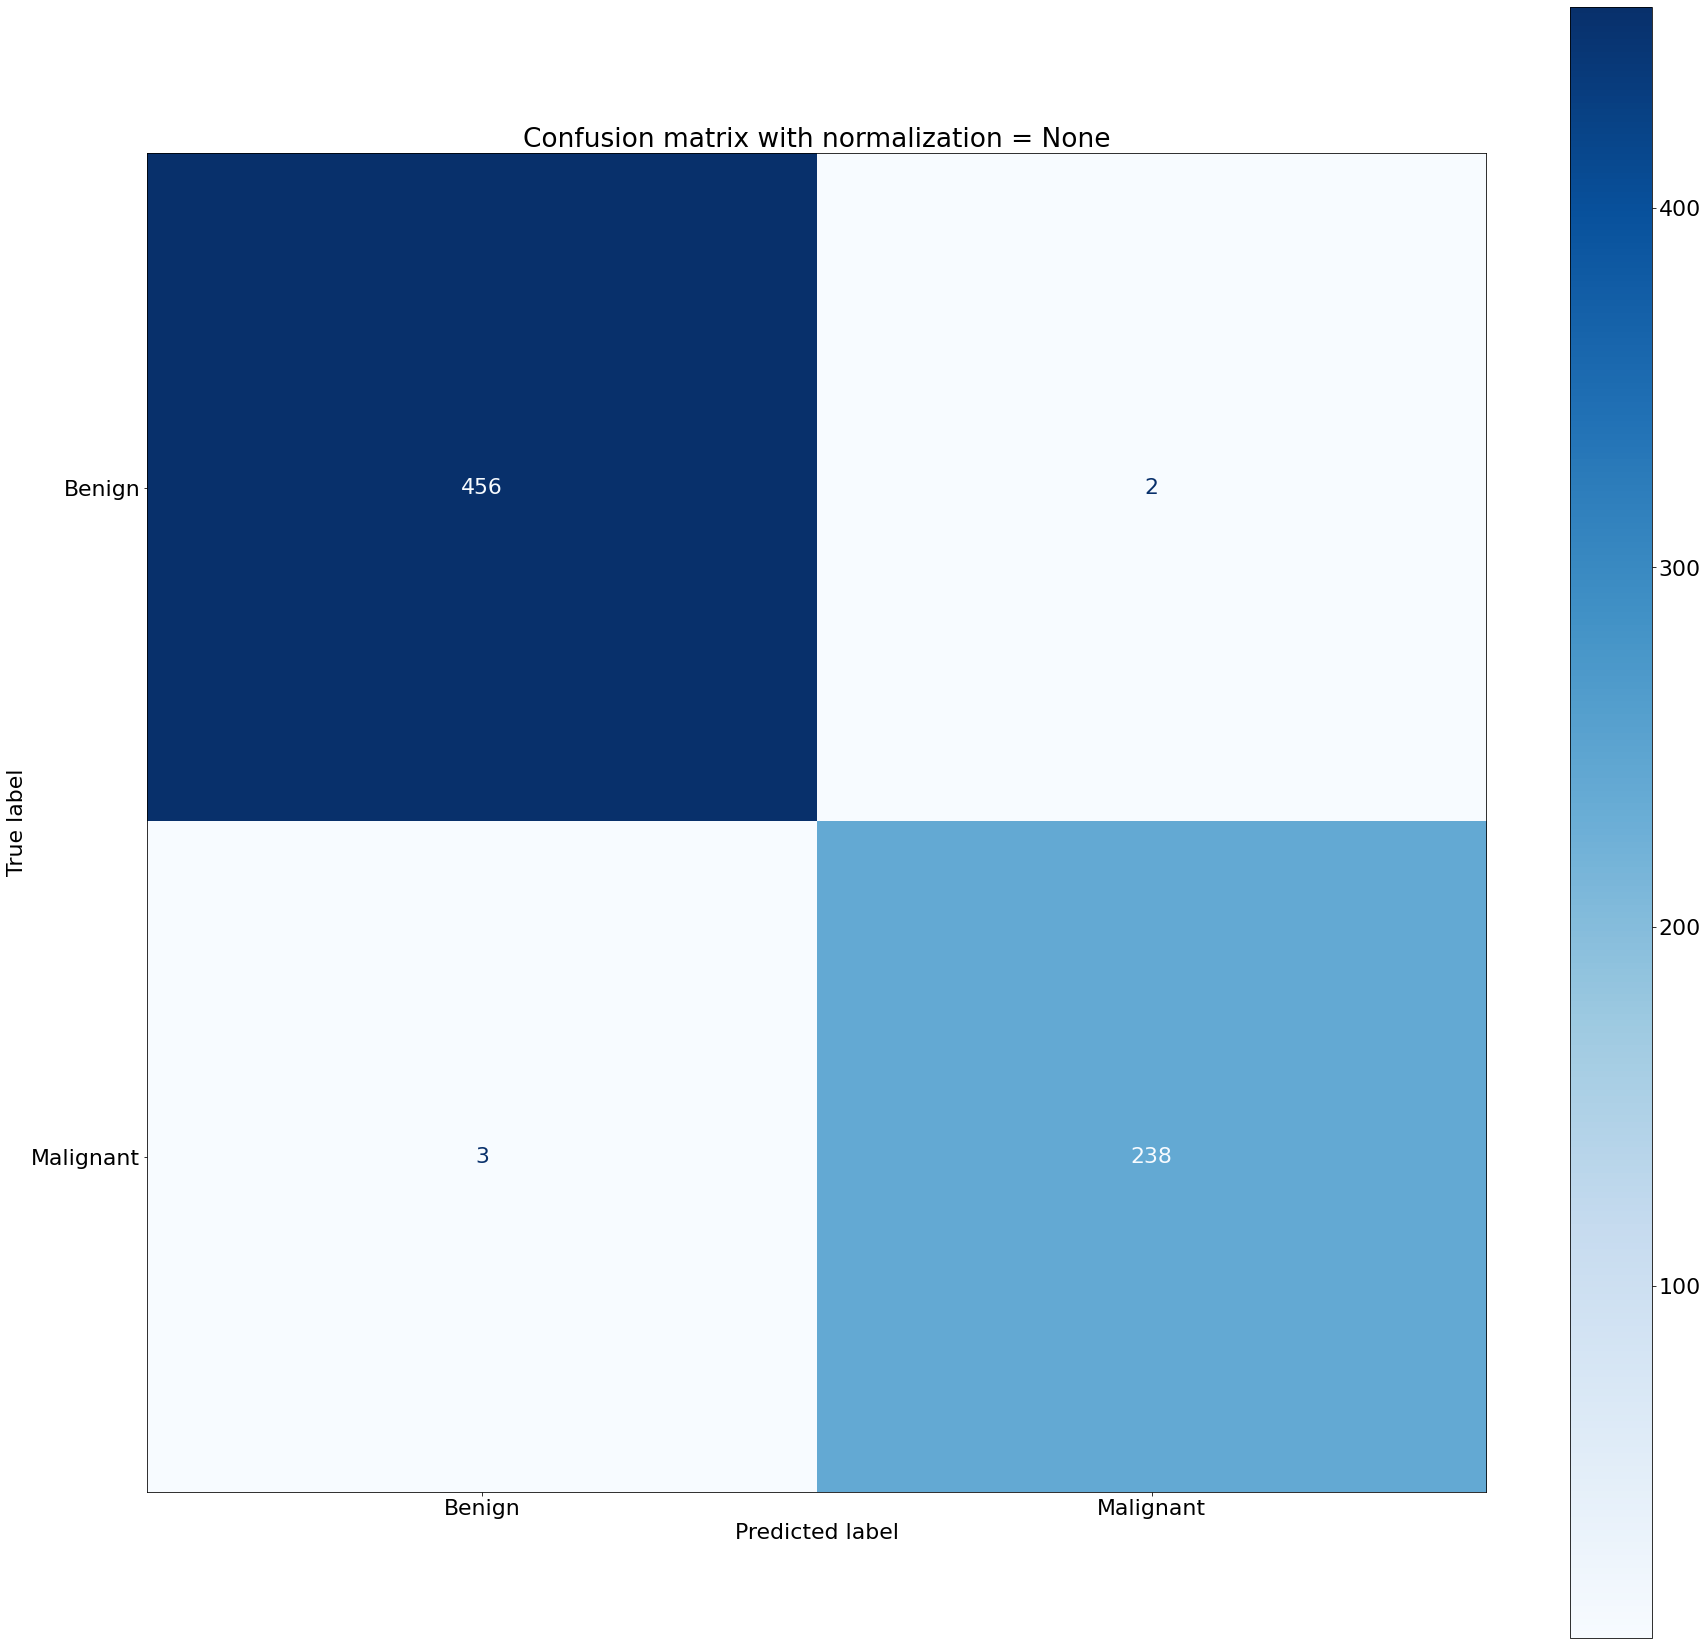

<Figure size 2160x2160 with 0 Axes>

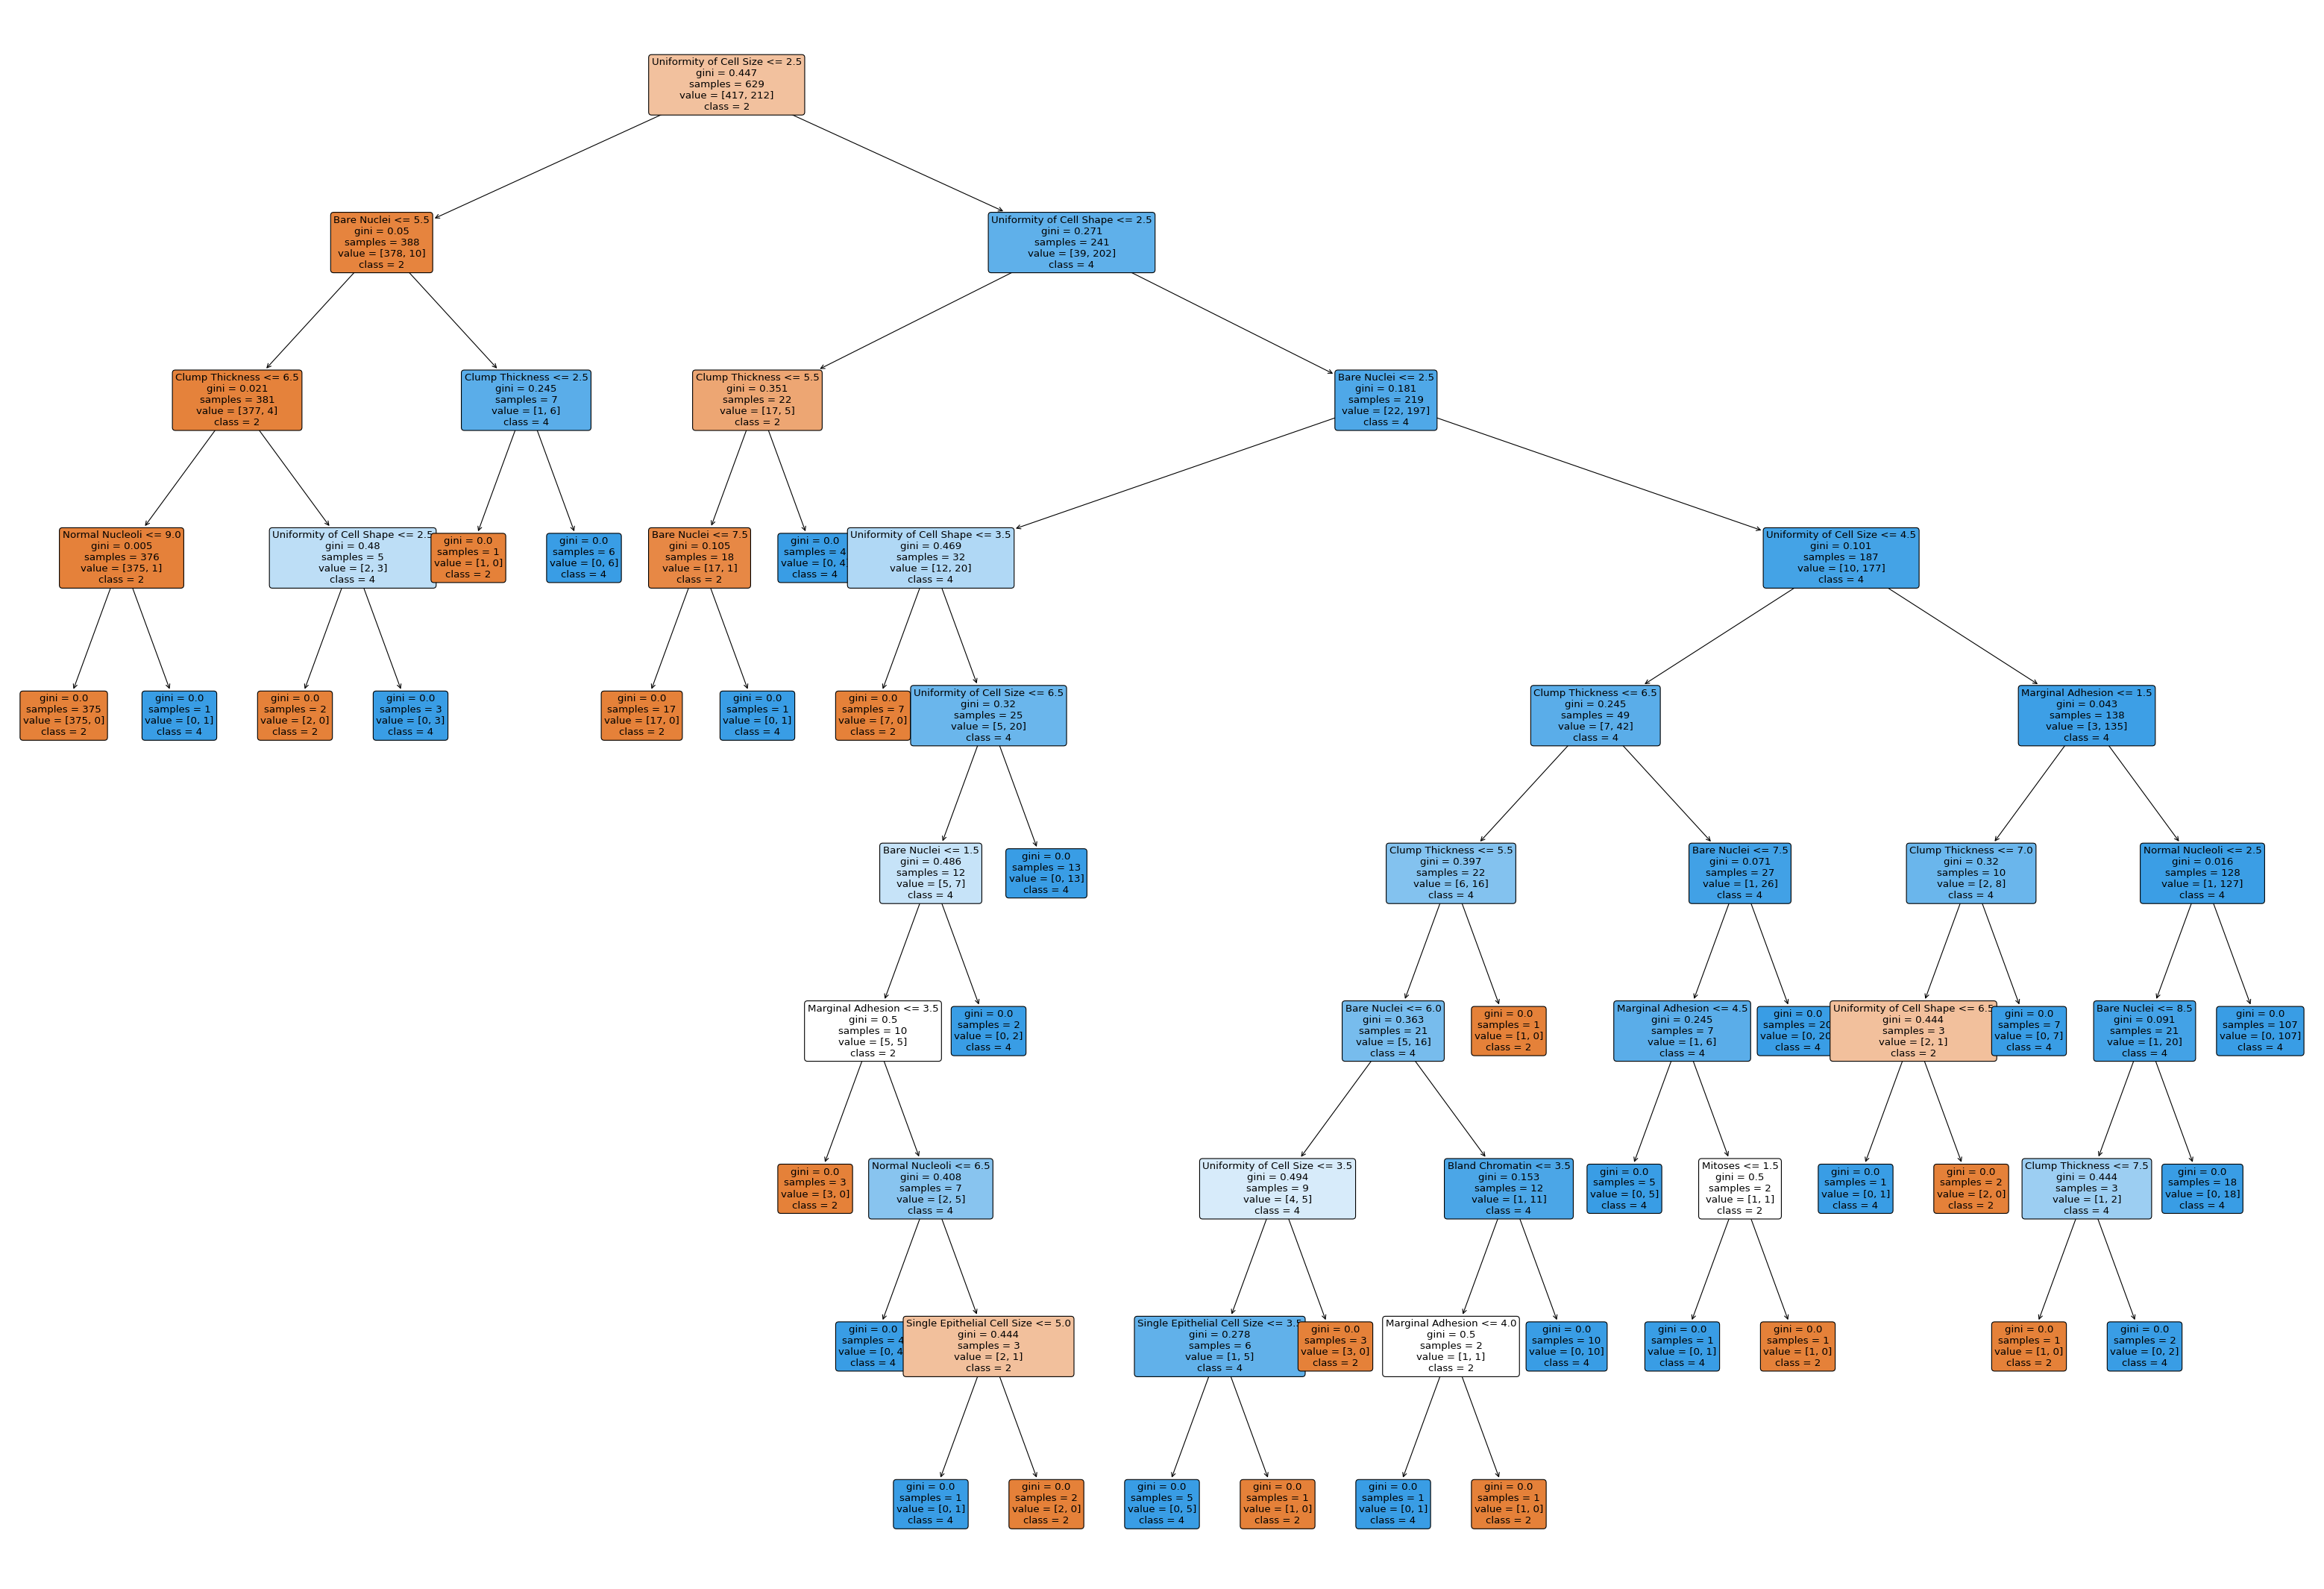

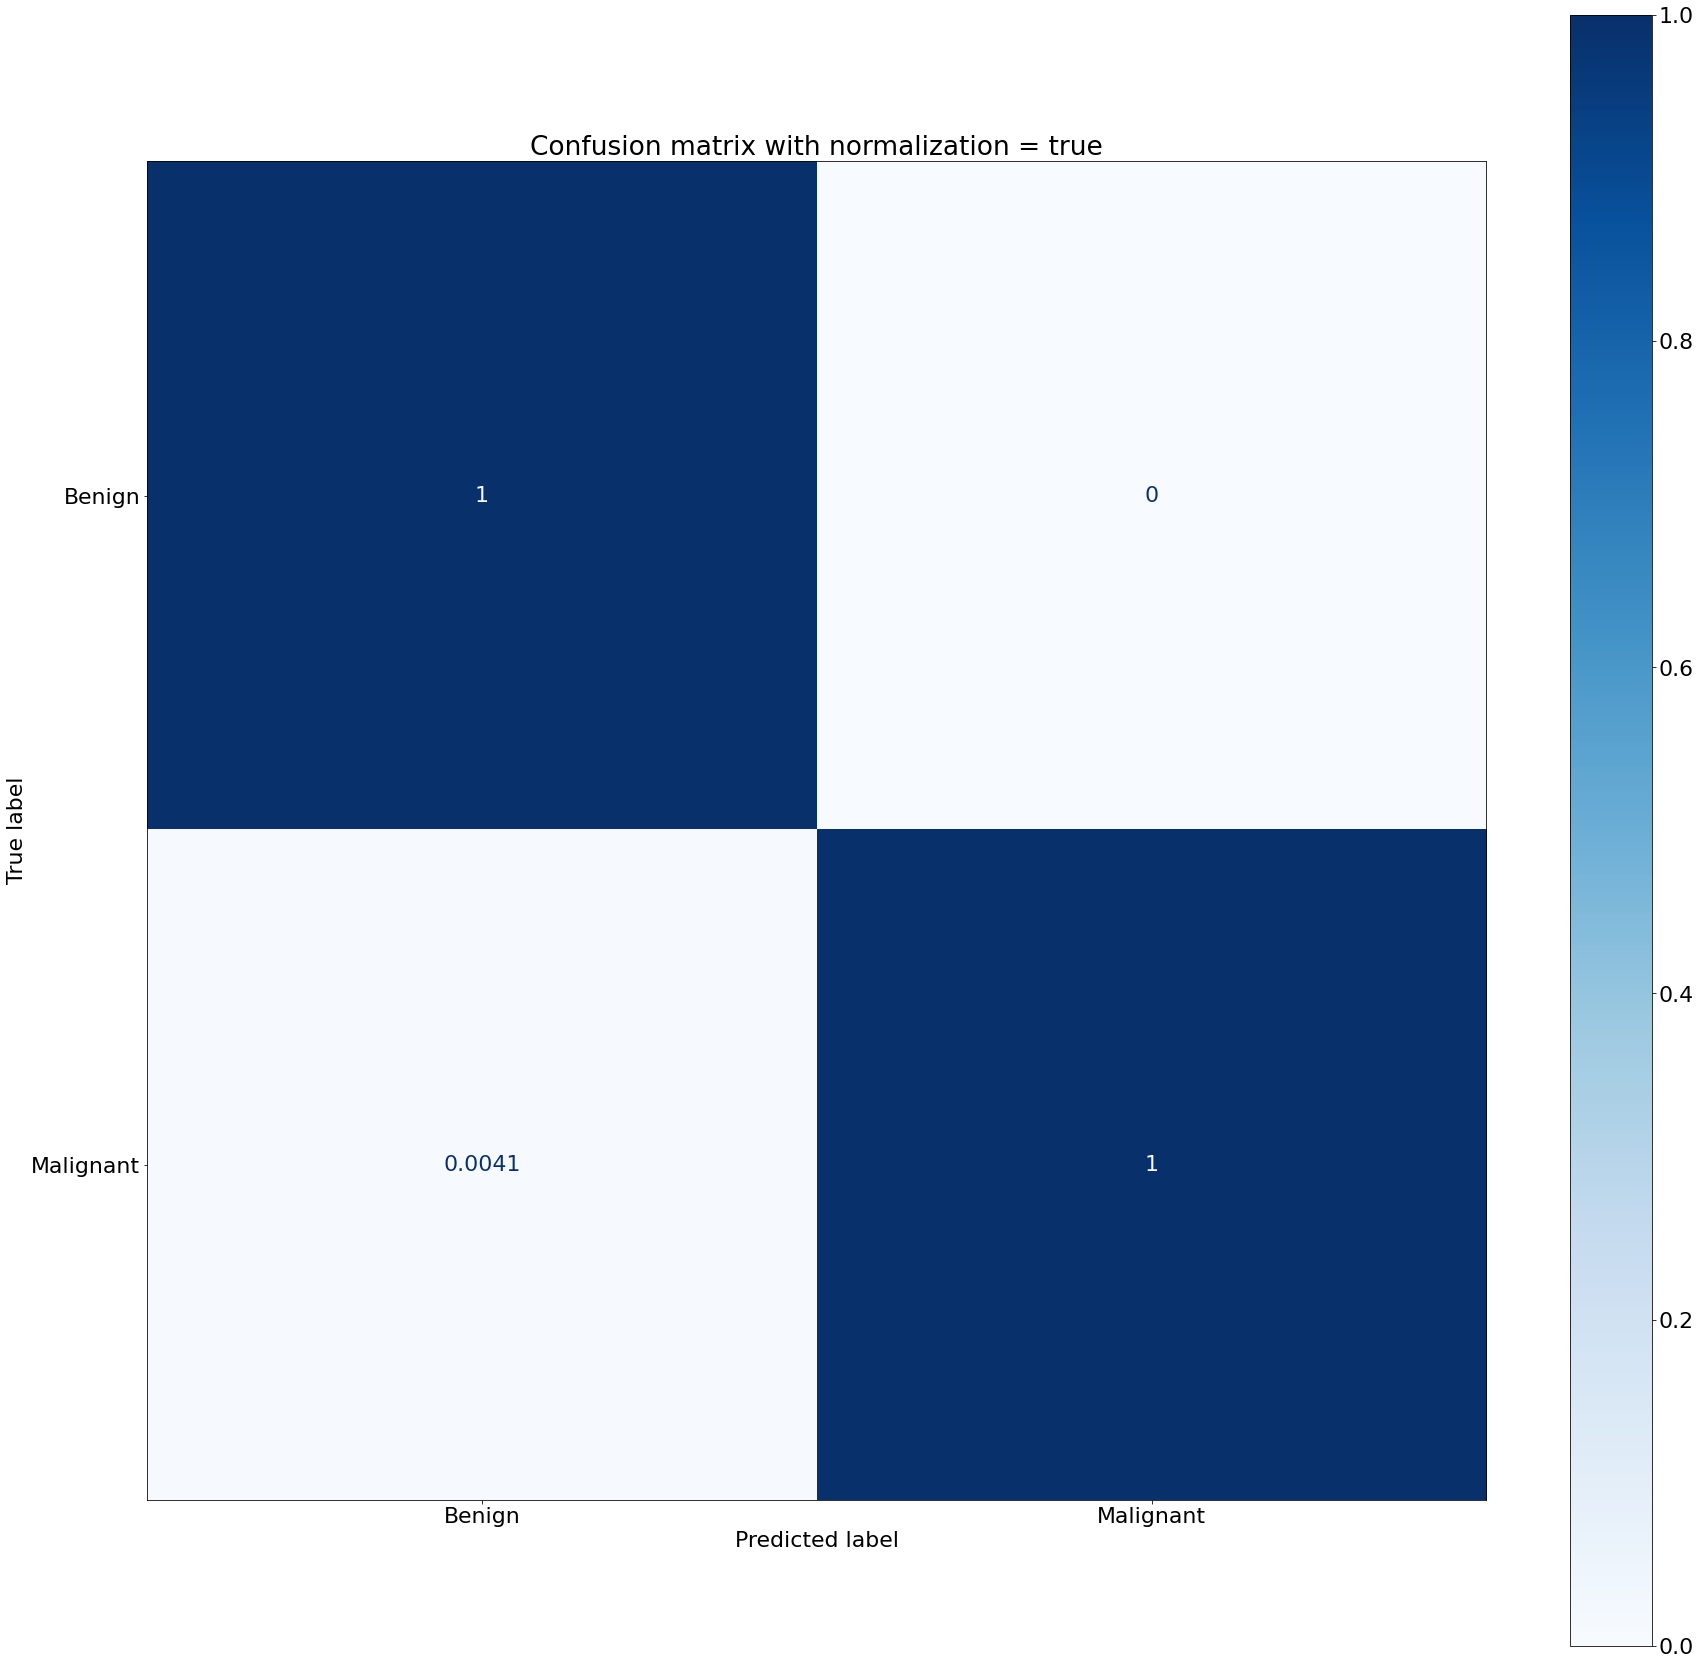

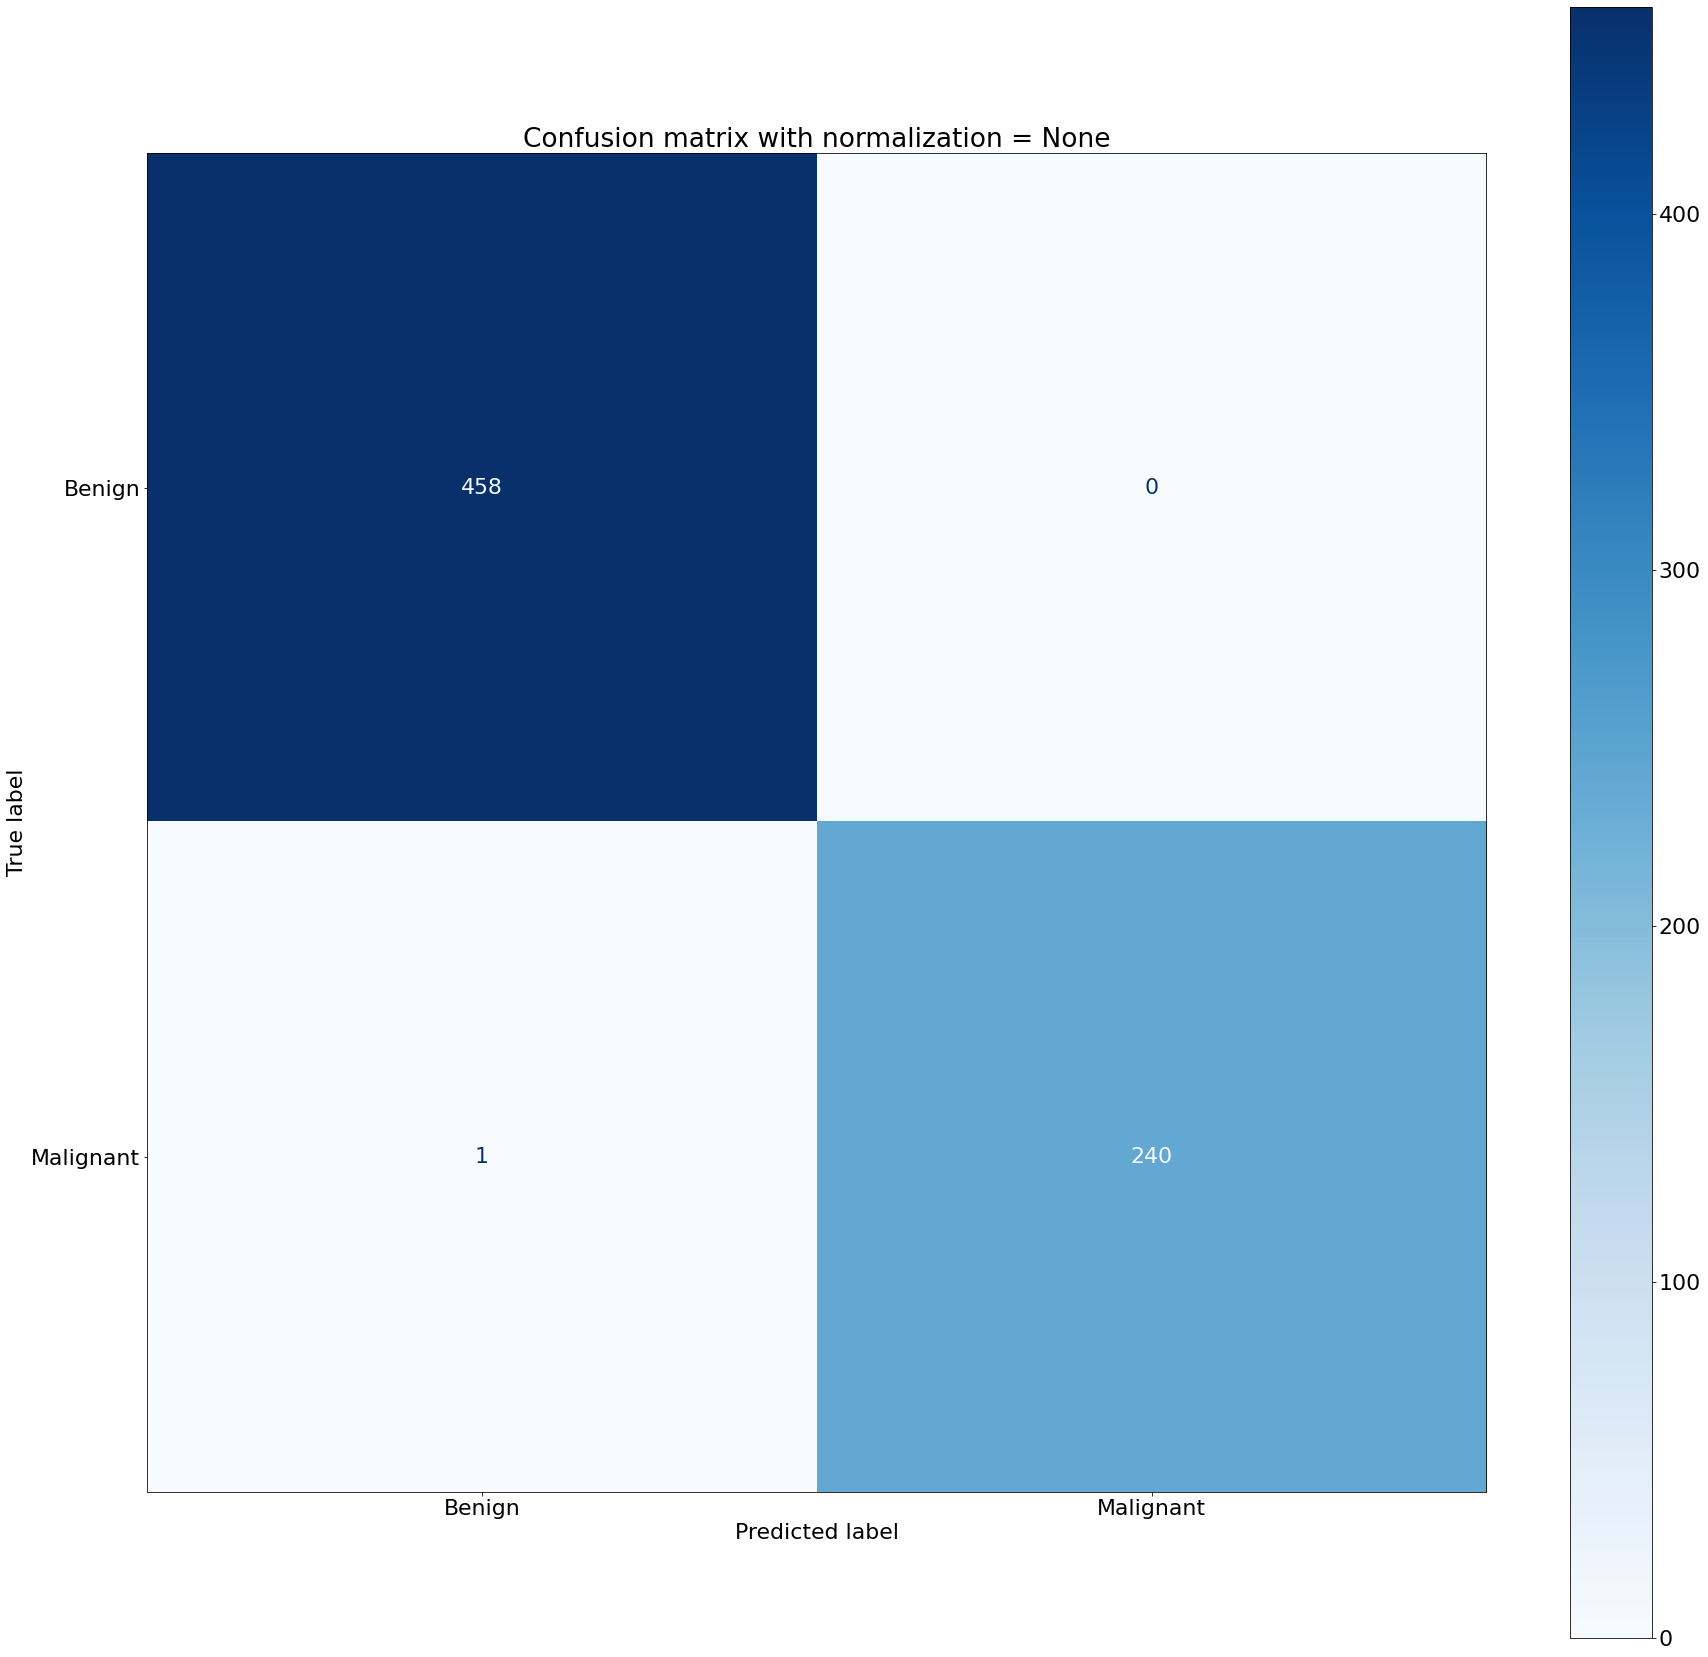

<Figure size 2160x2160 with 0 Axes>

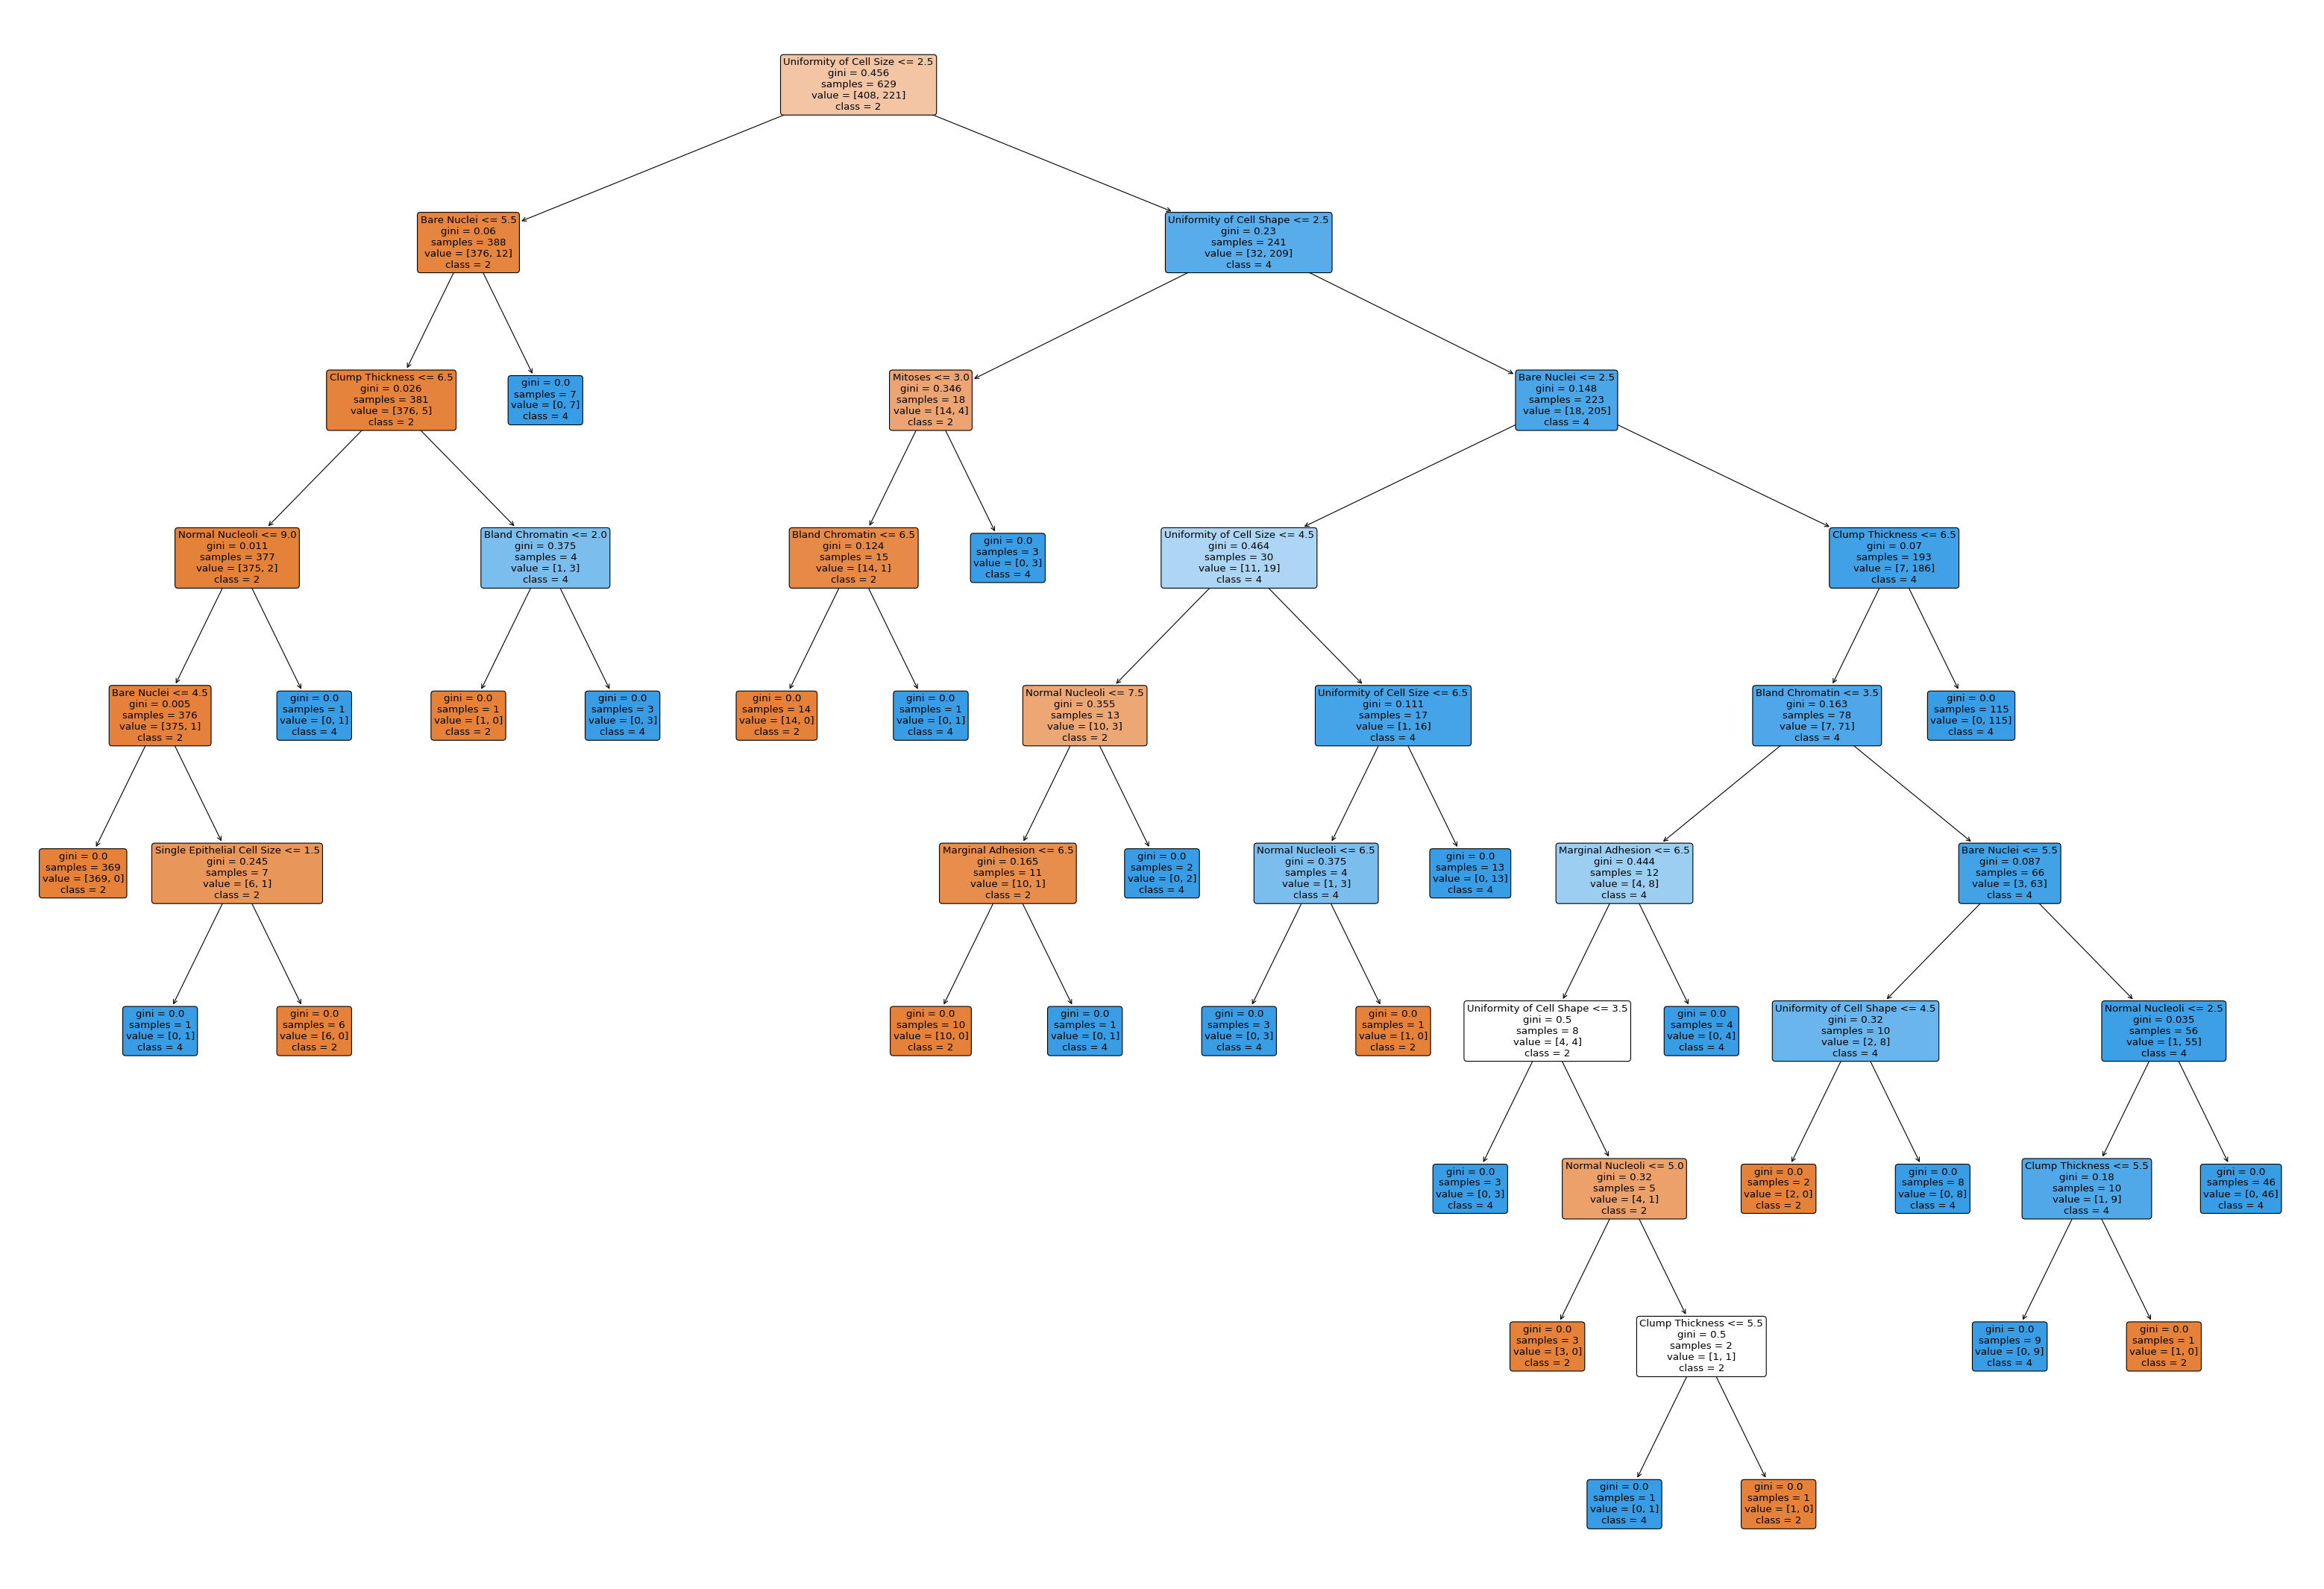

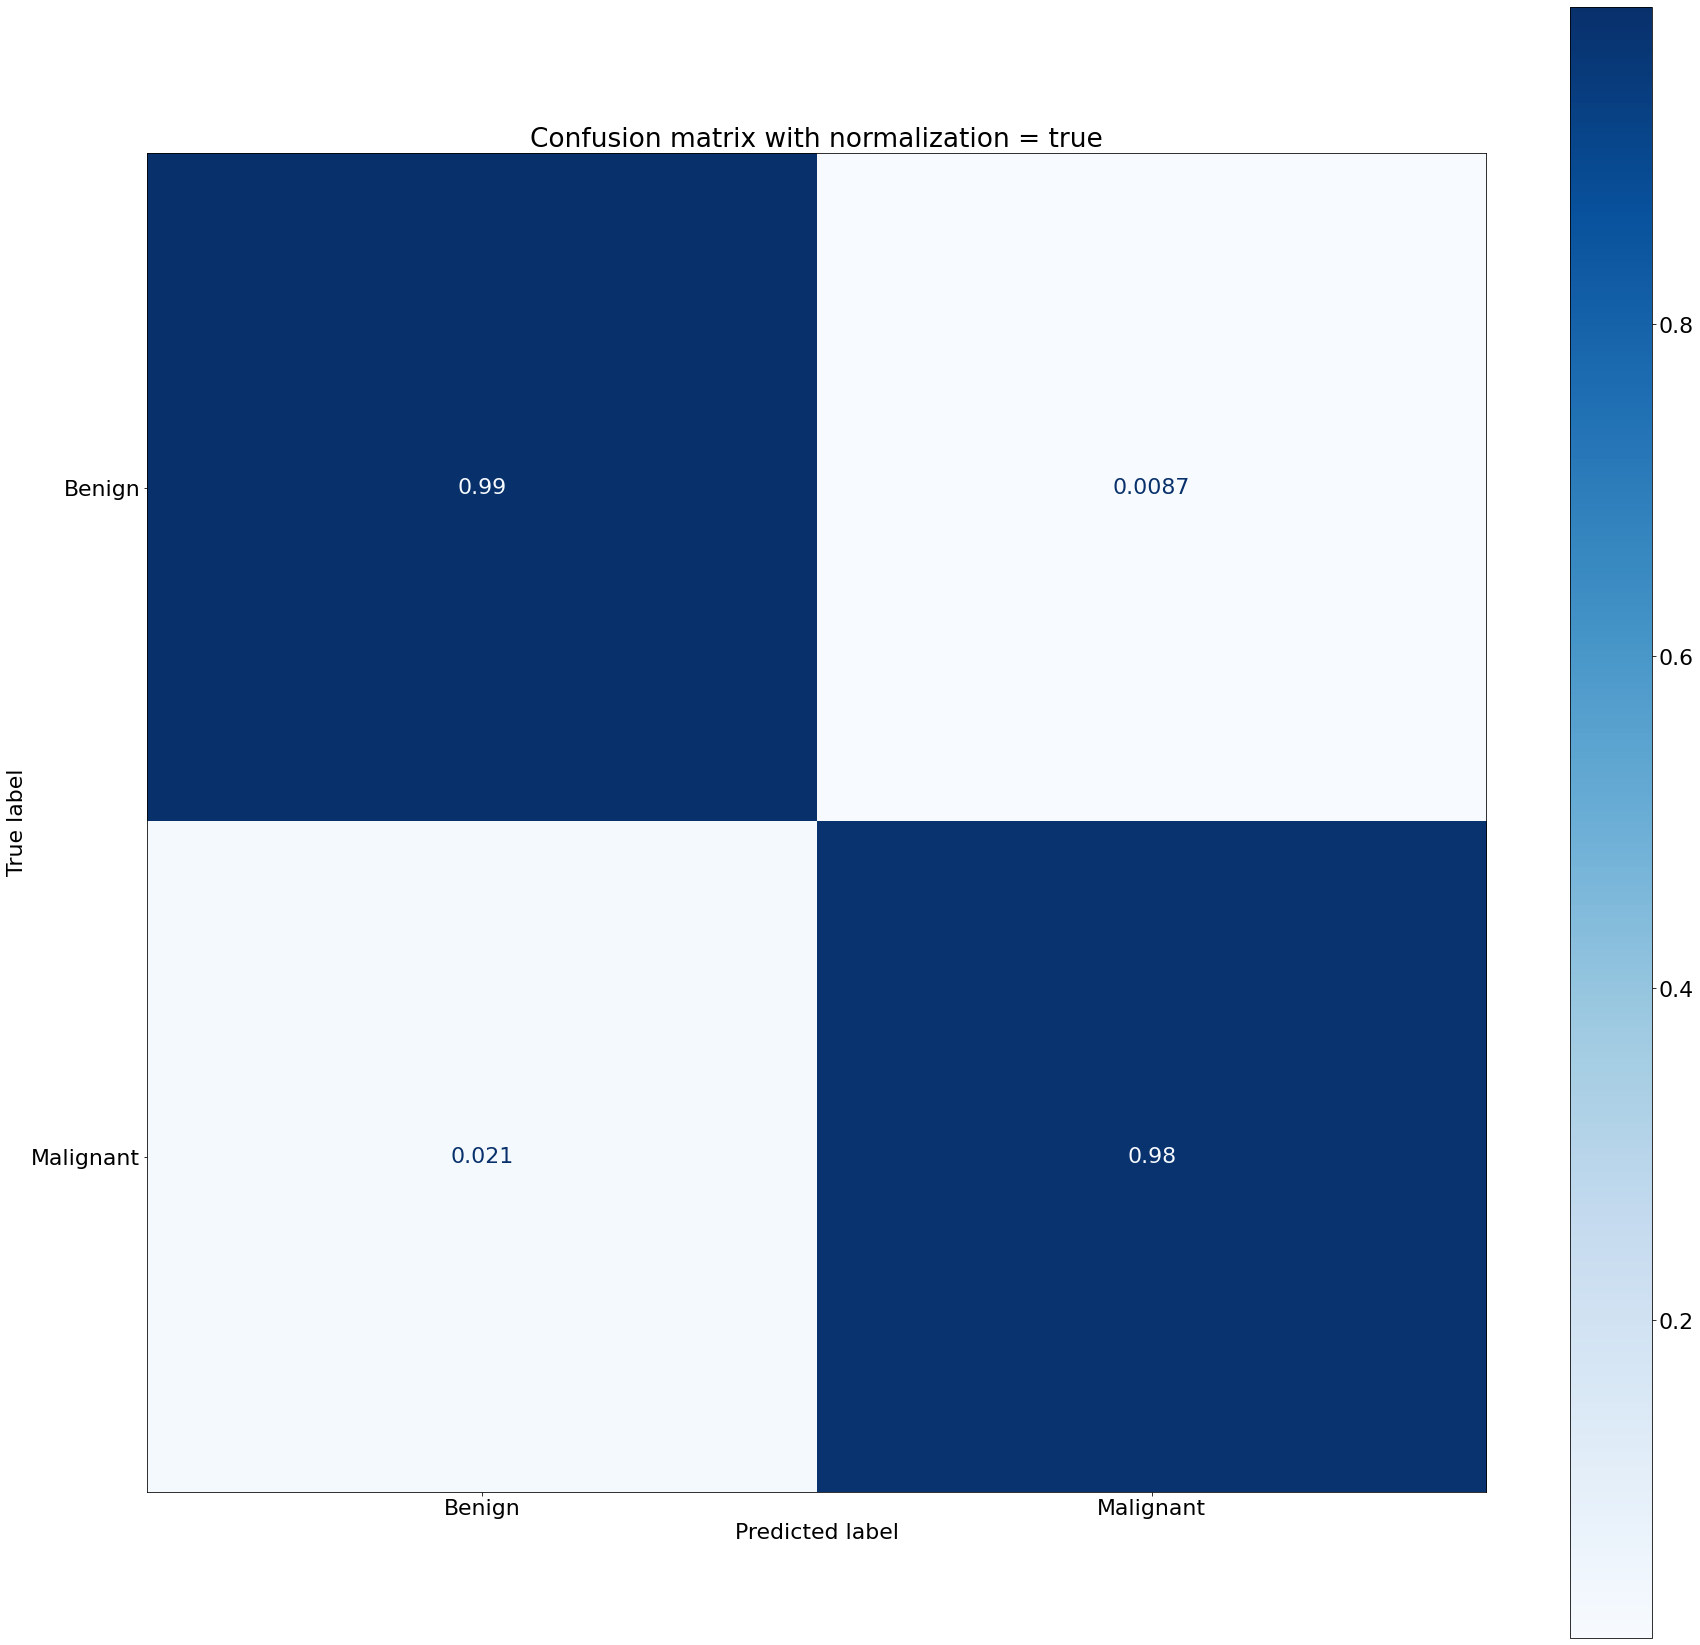

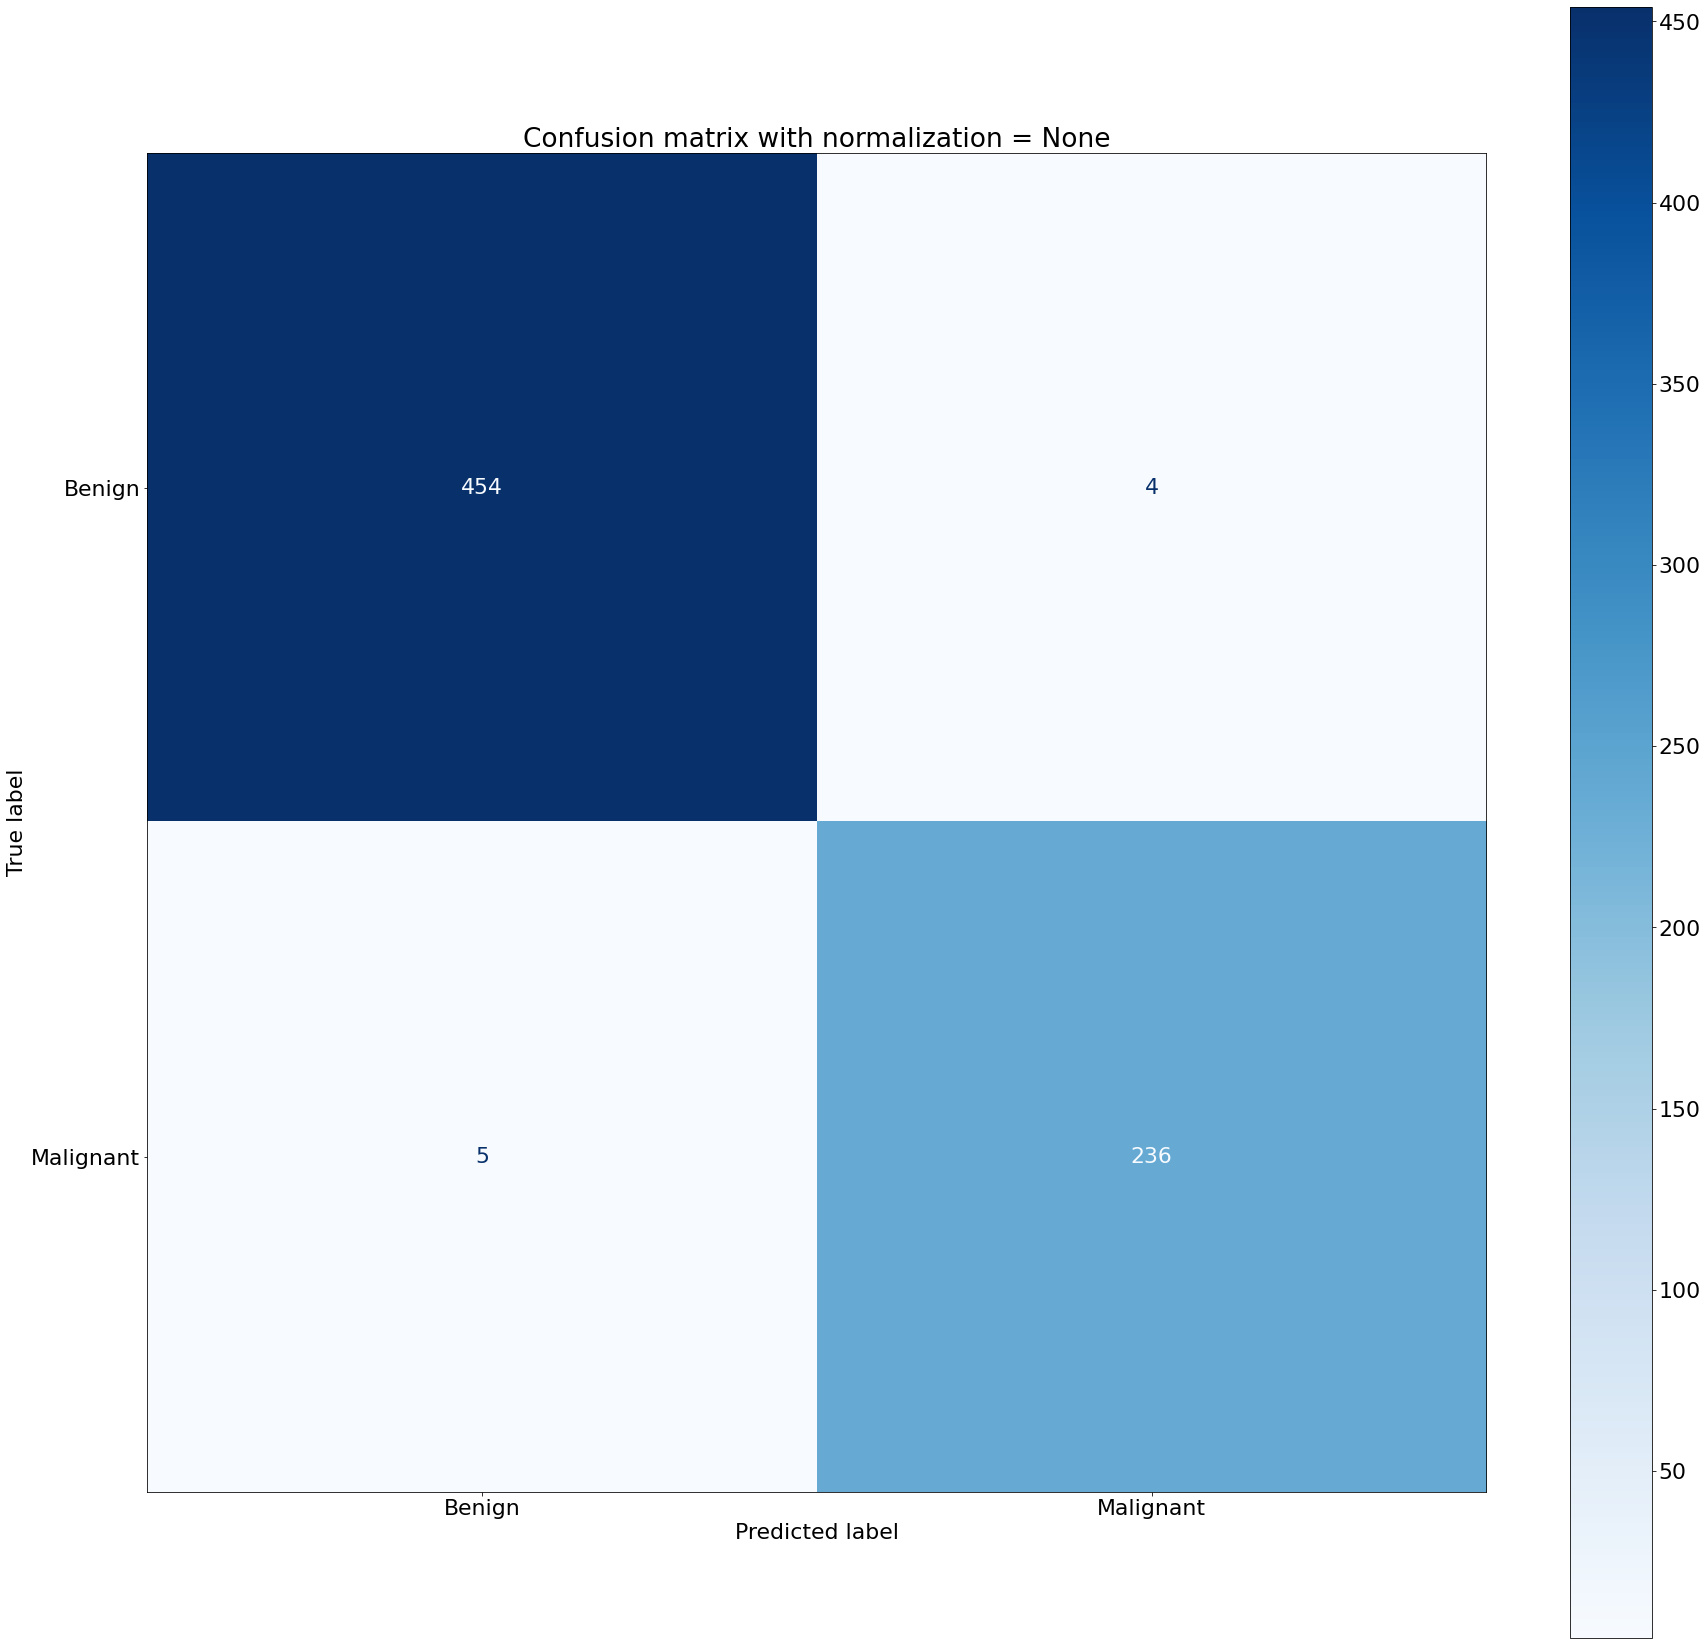

<Figure size 2160x2160 with 0 Axes>

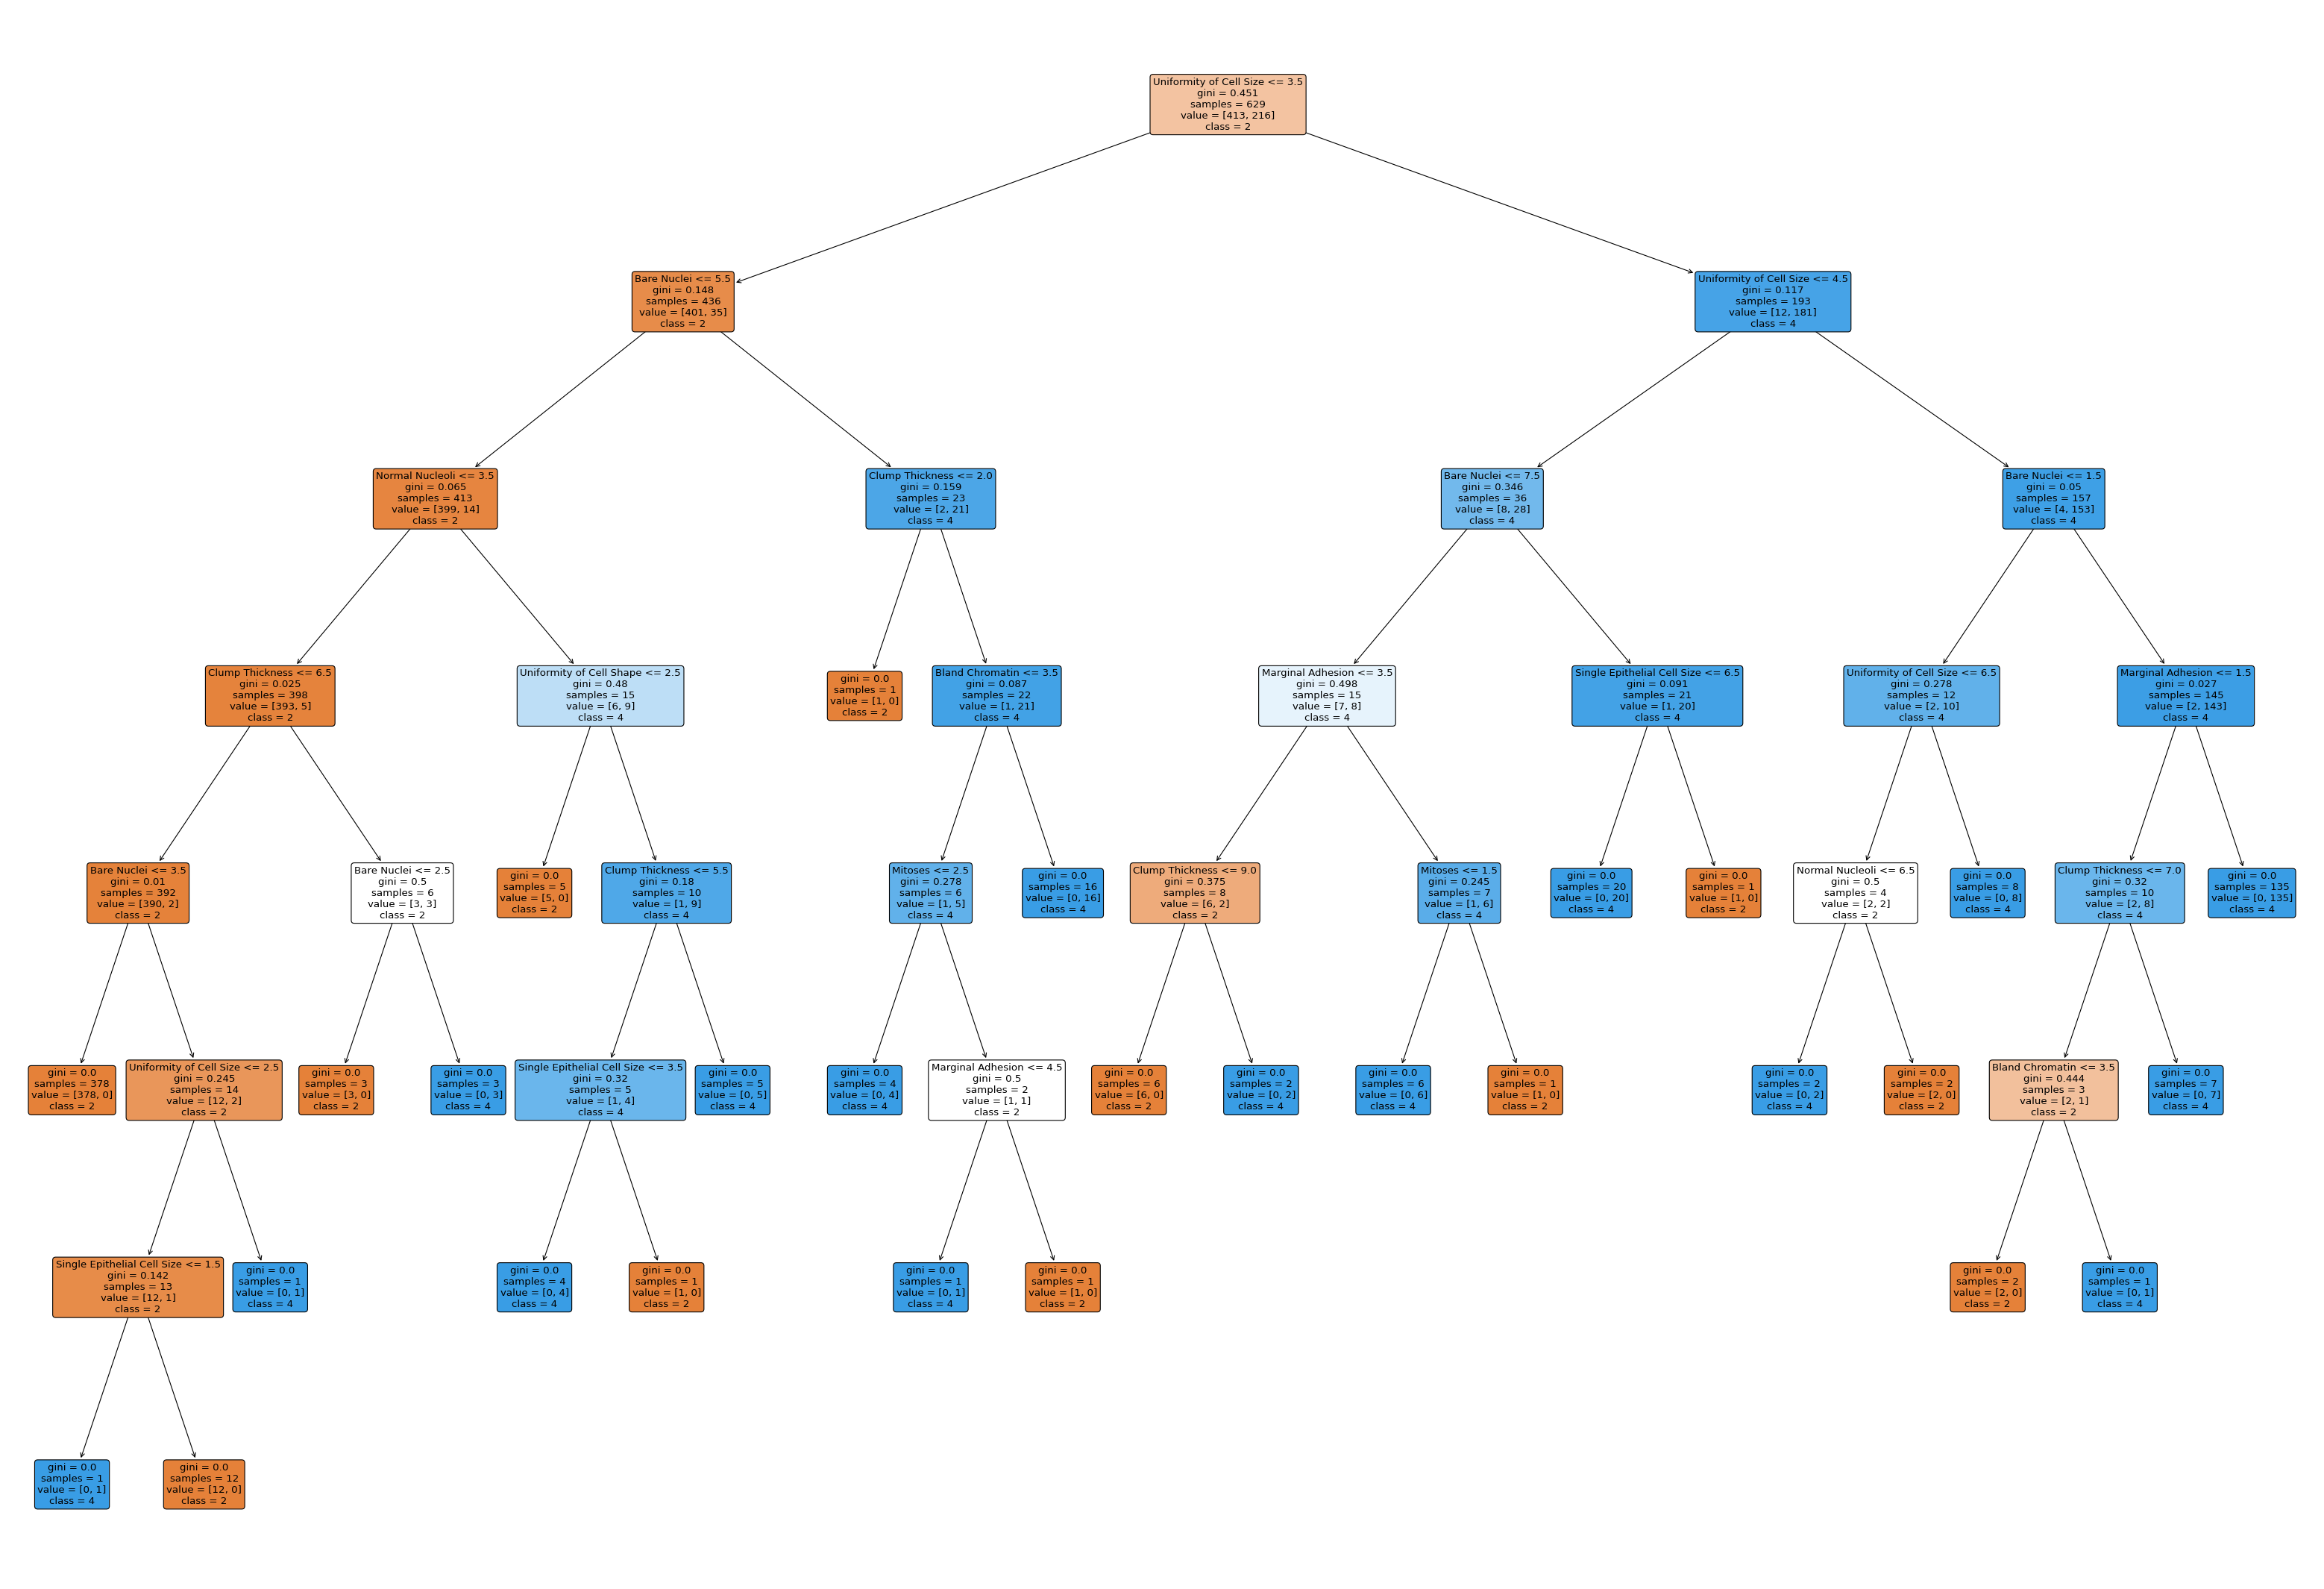

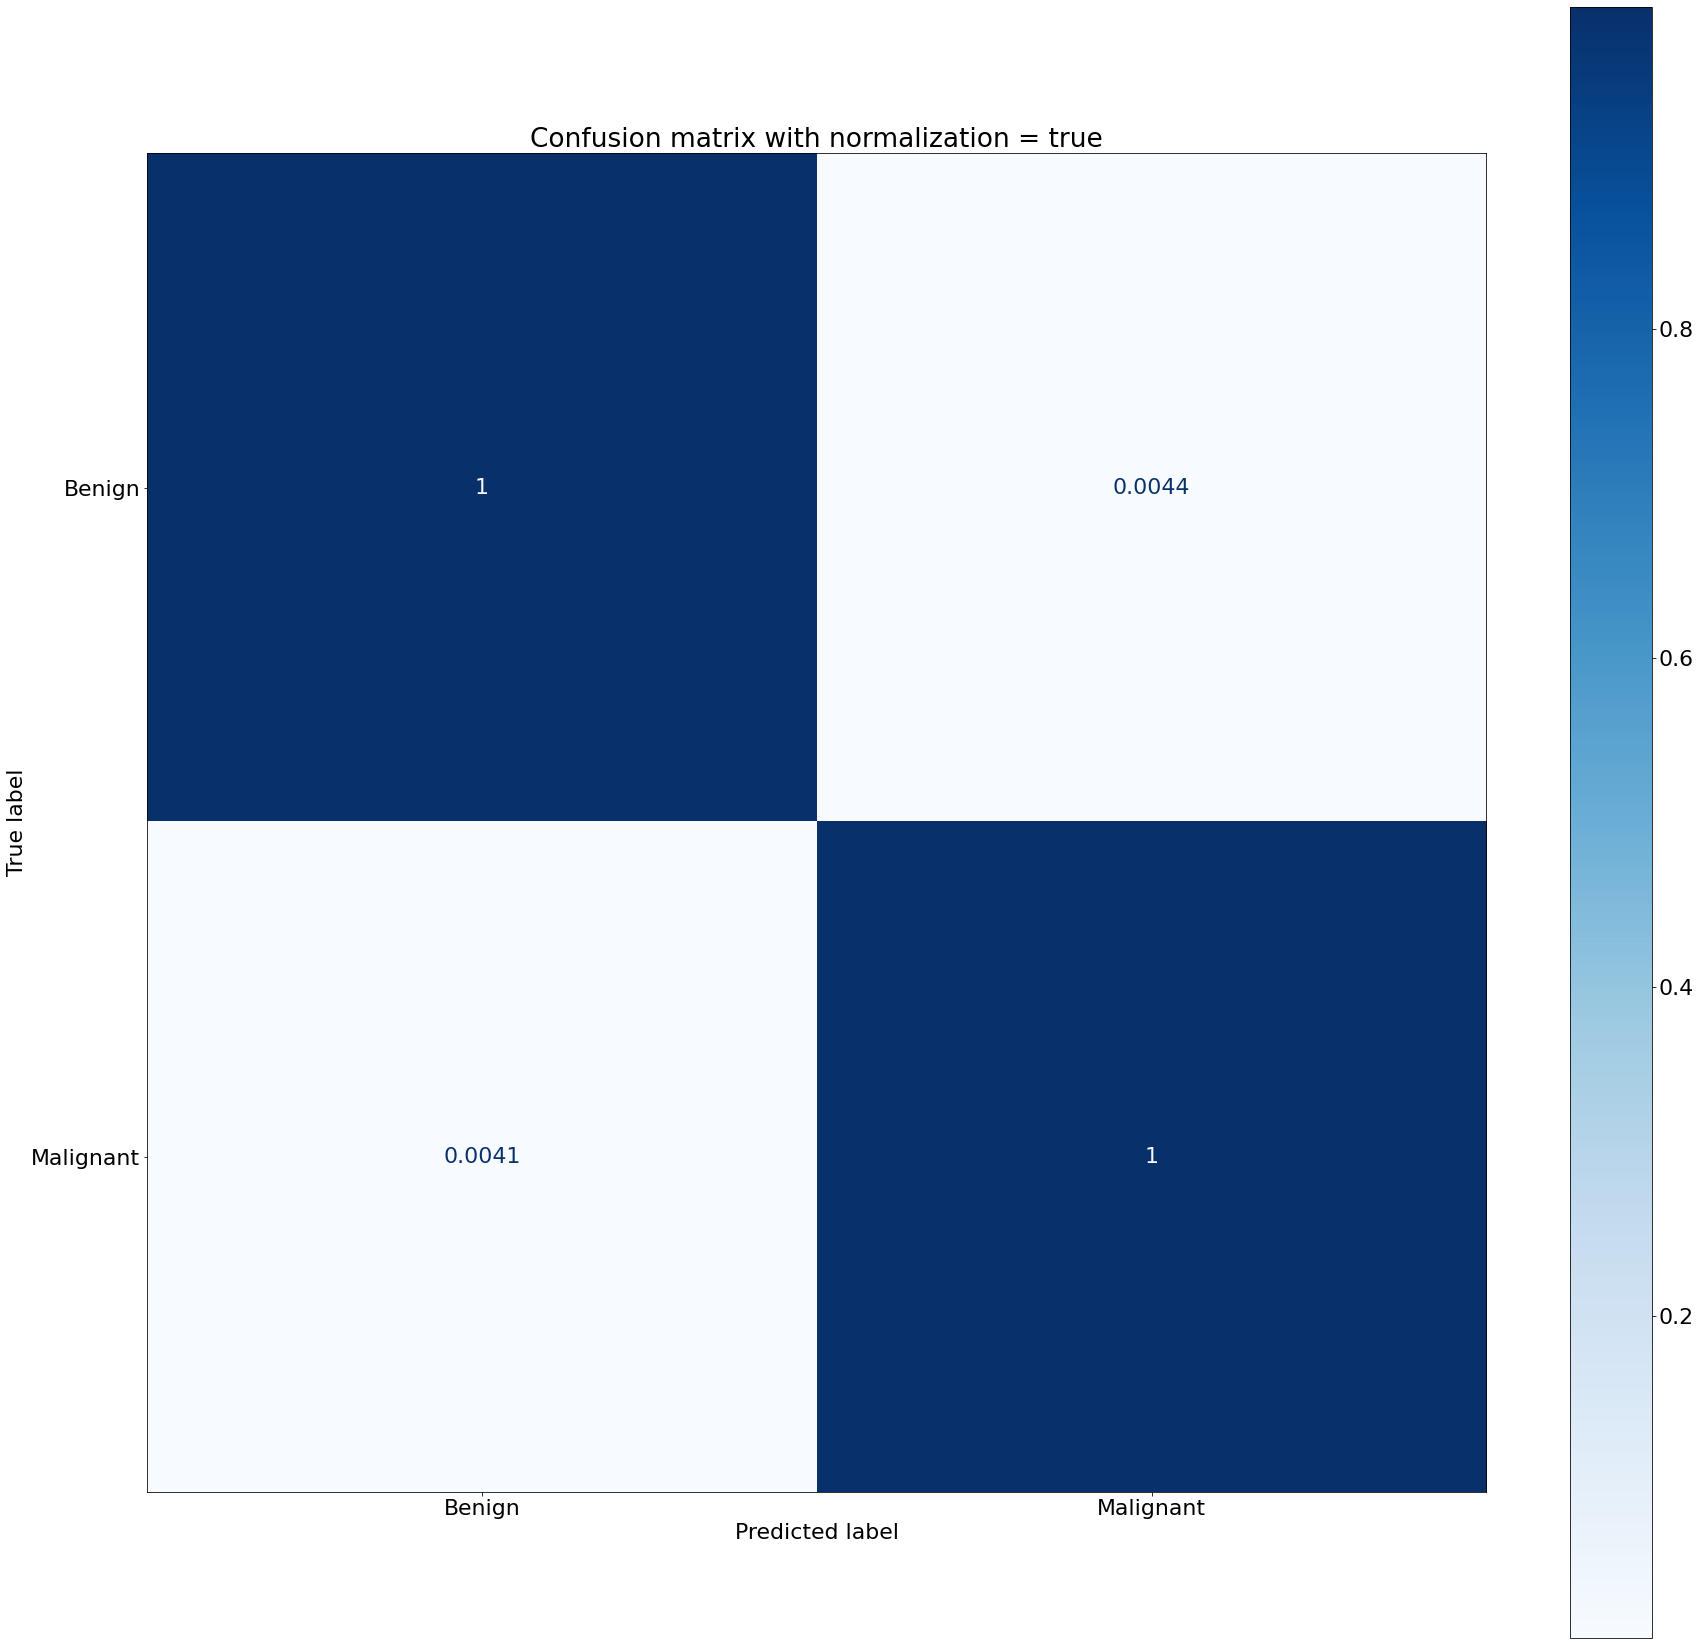

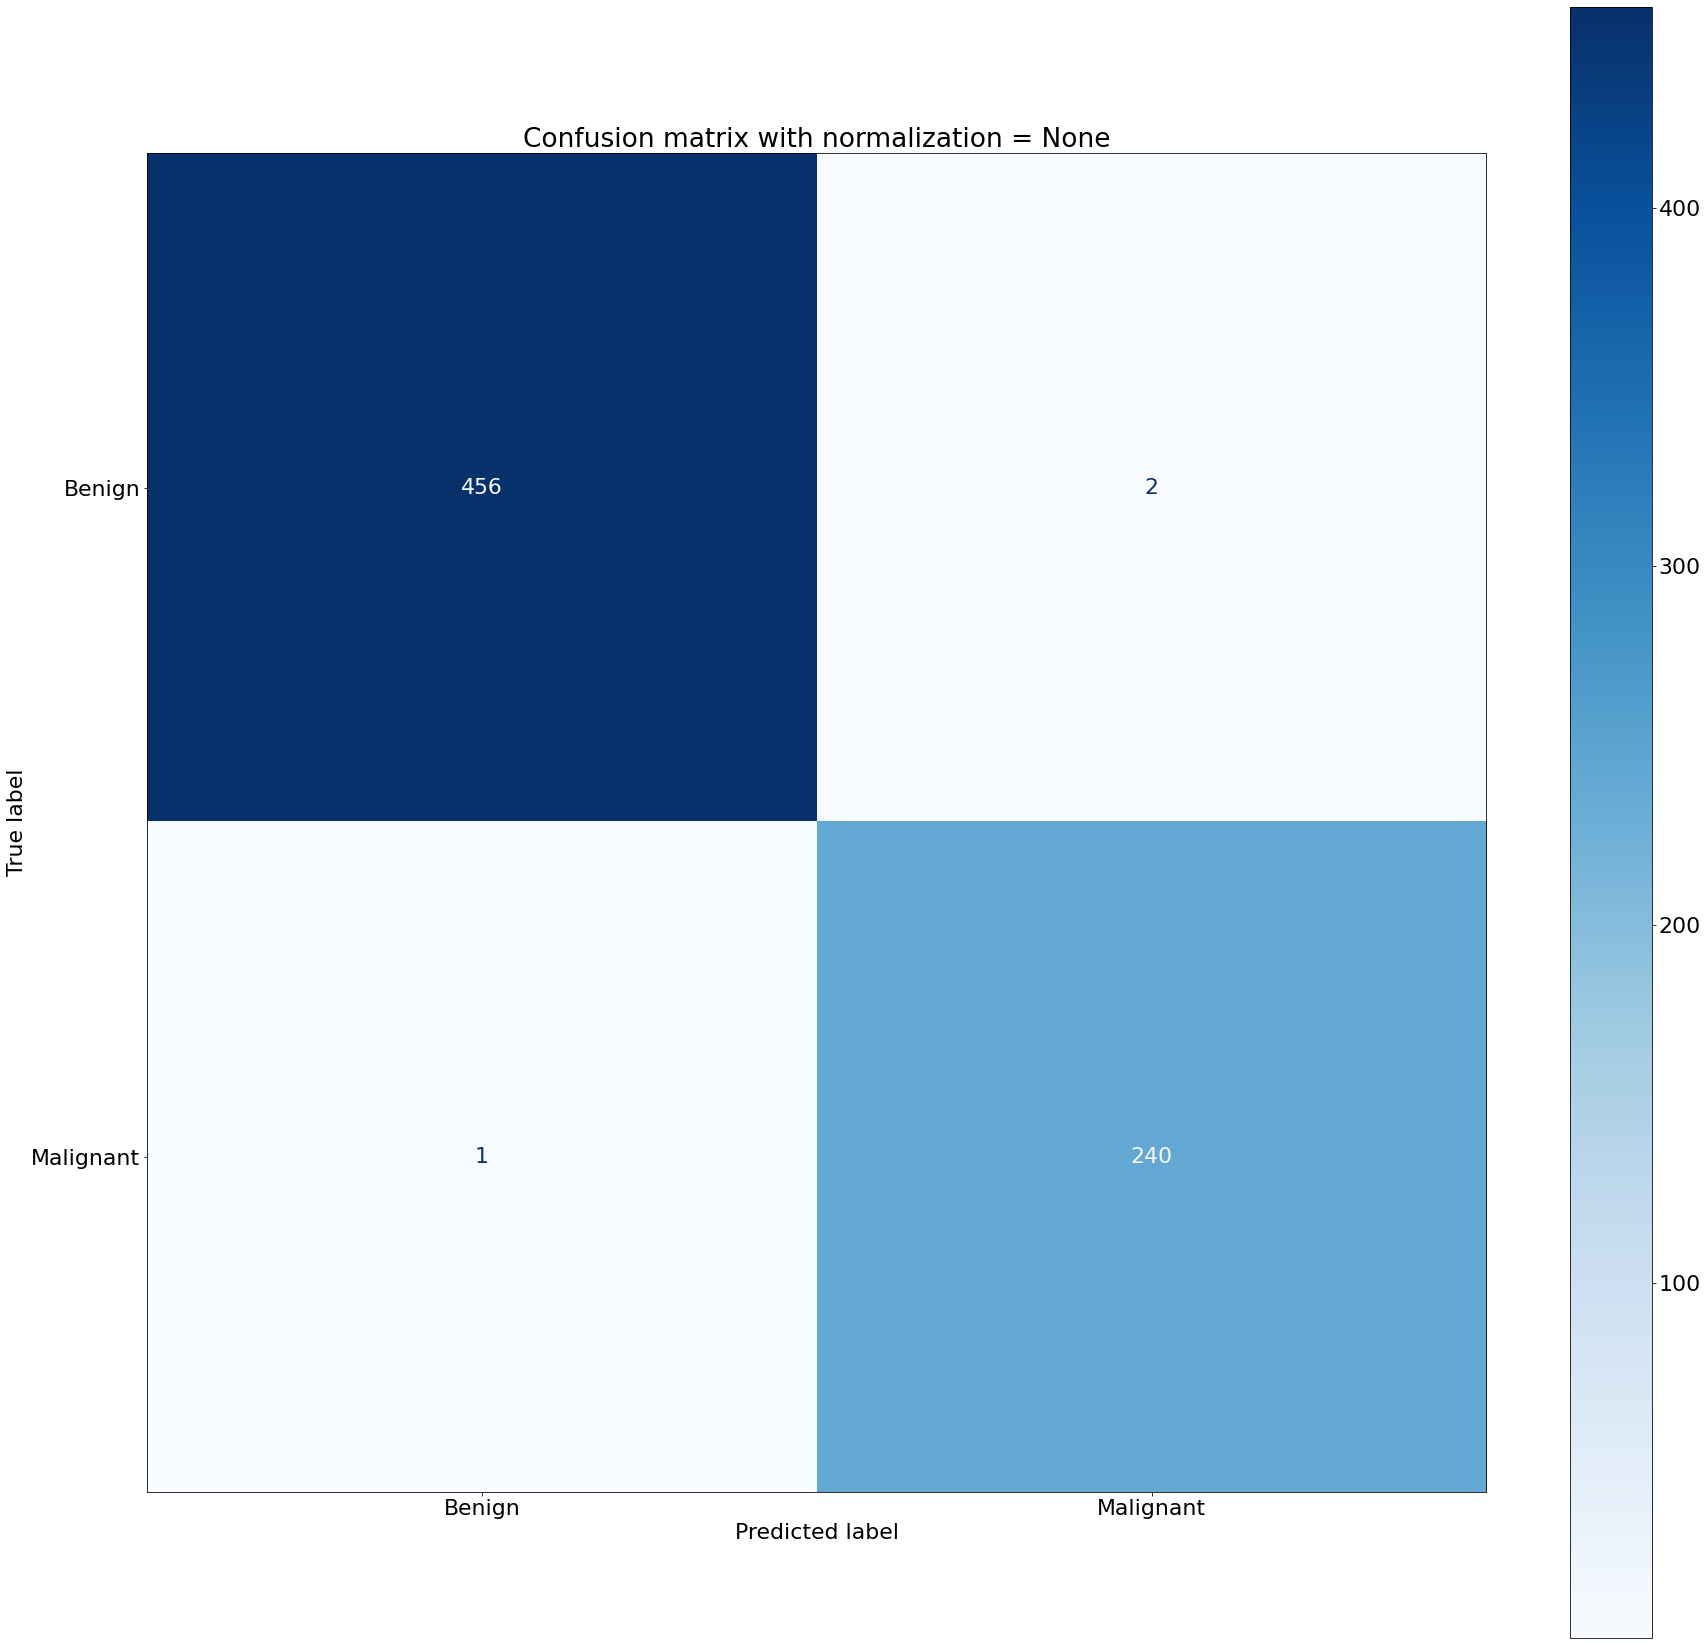

<Figure size 2160x2160 with 0 Axes>

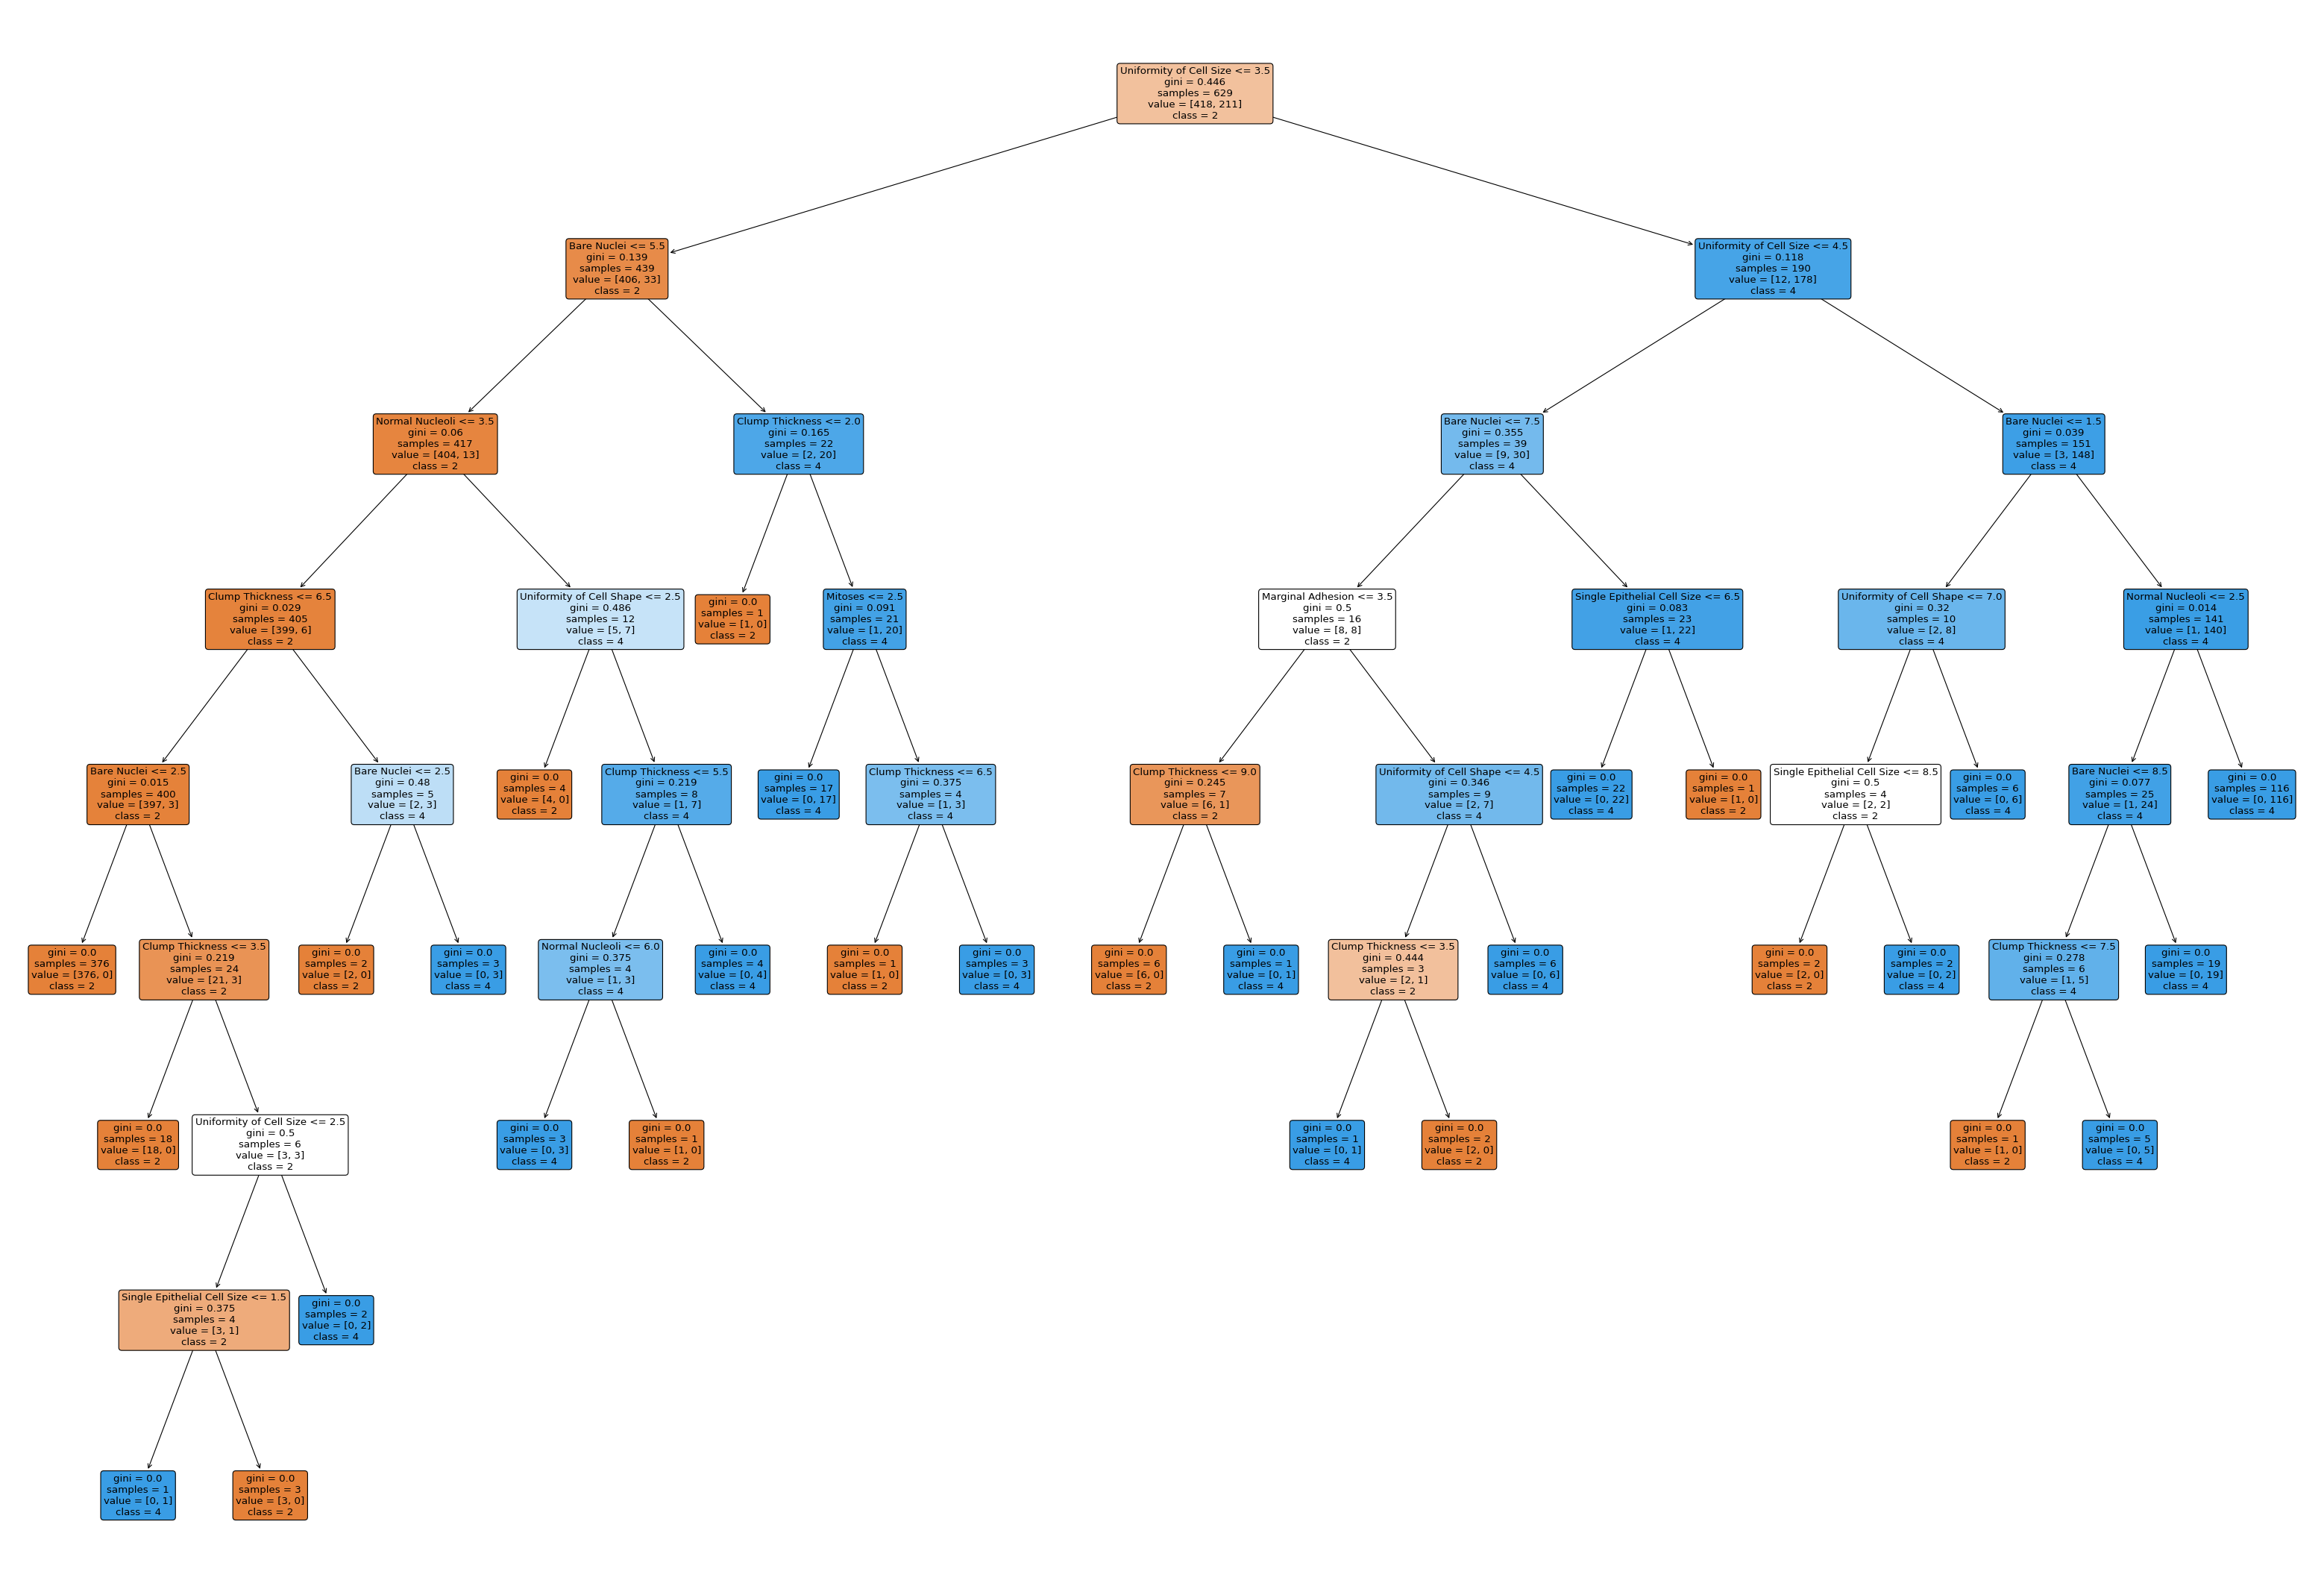

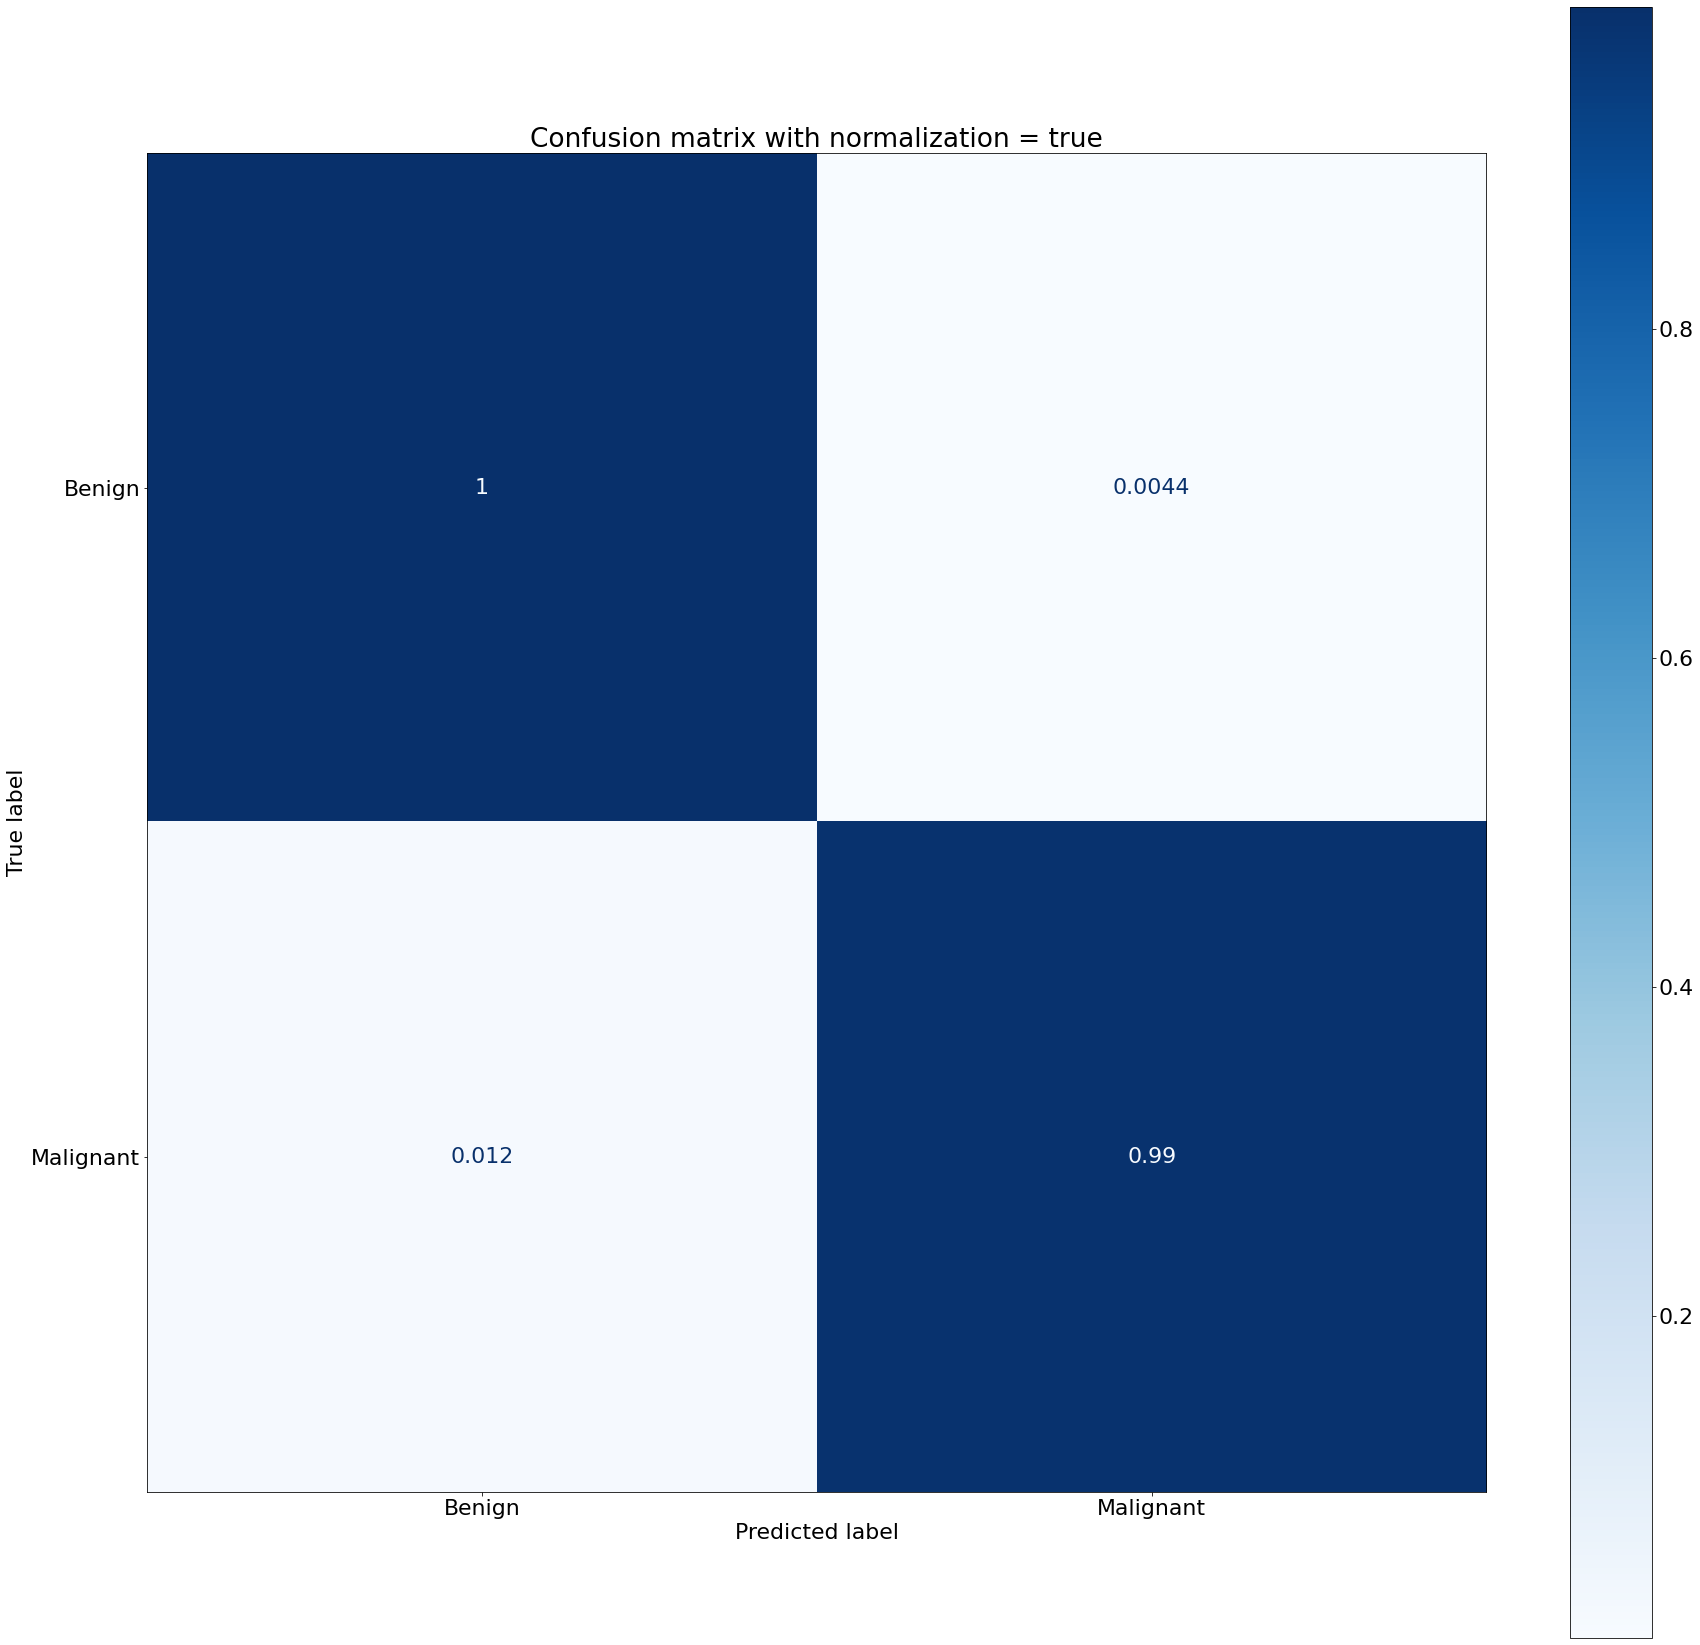

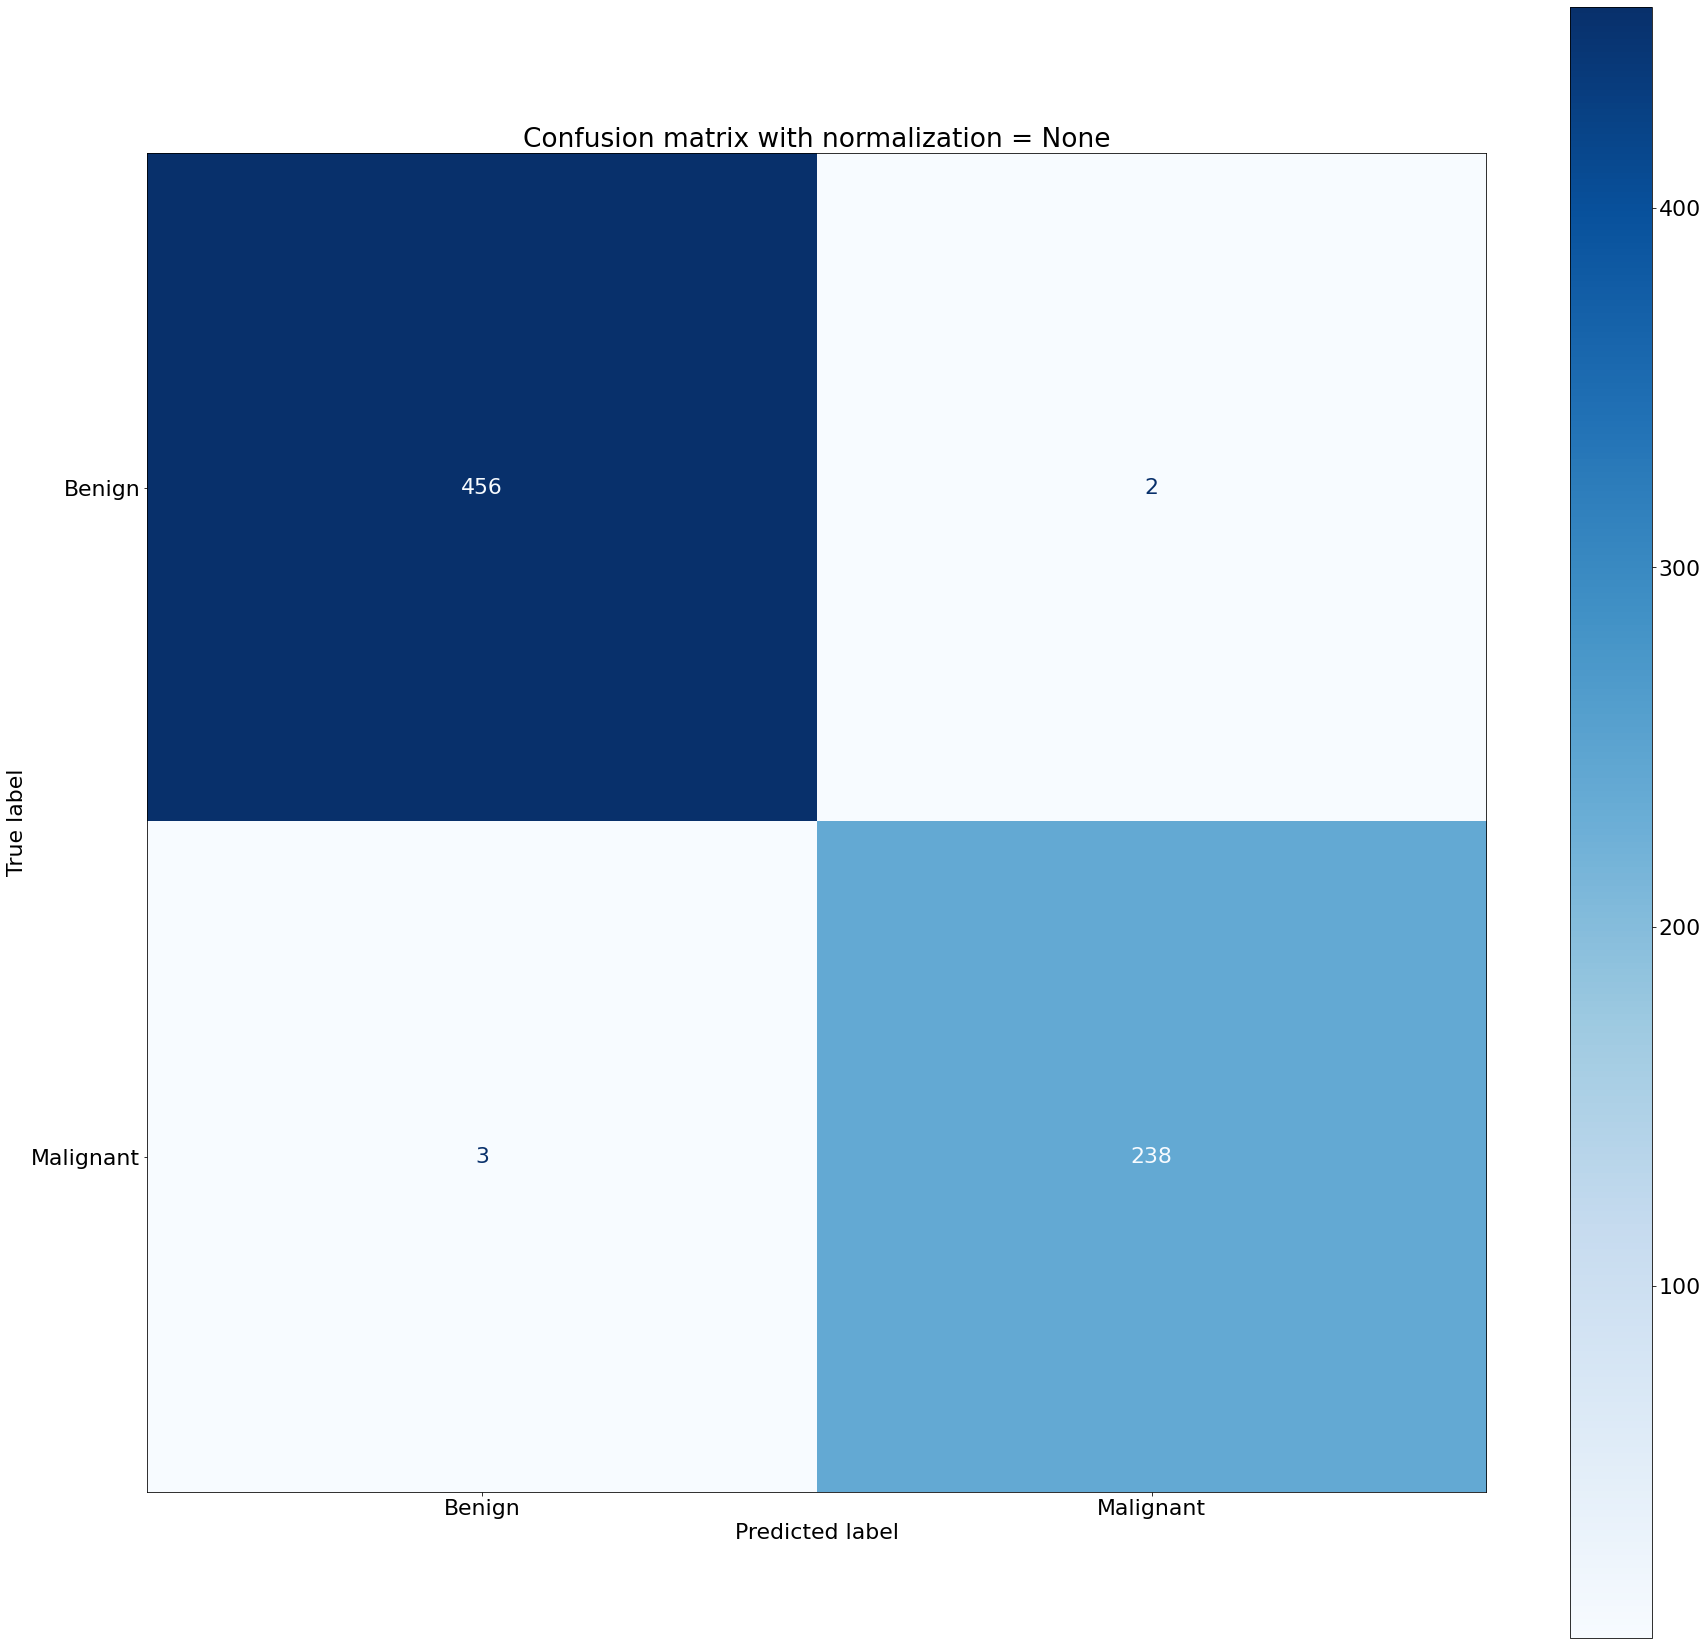

<Figure size 2160x2160 with 0 Axes>

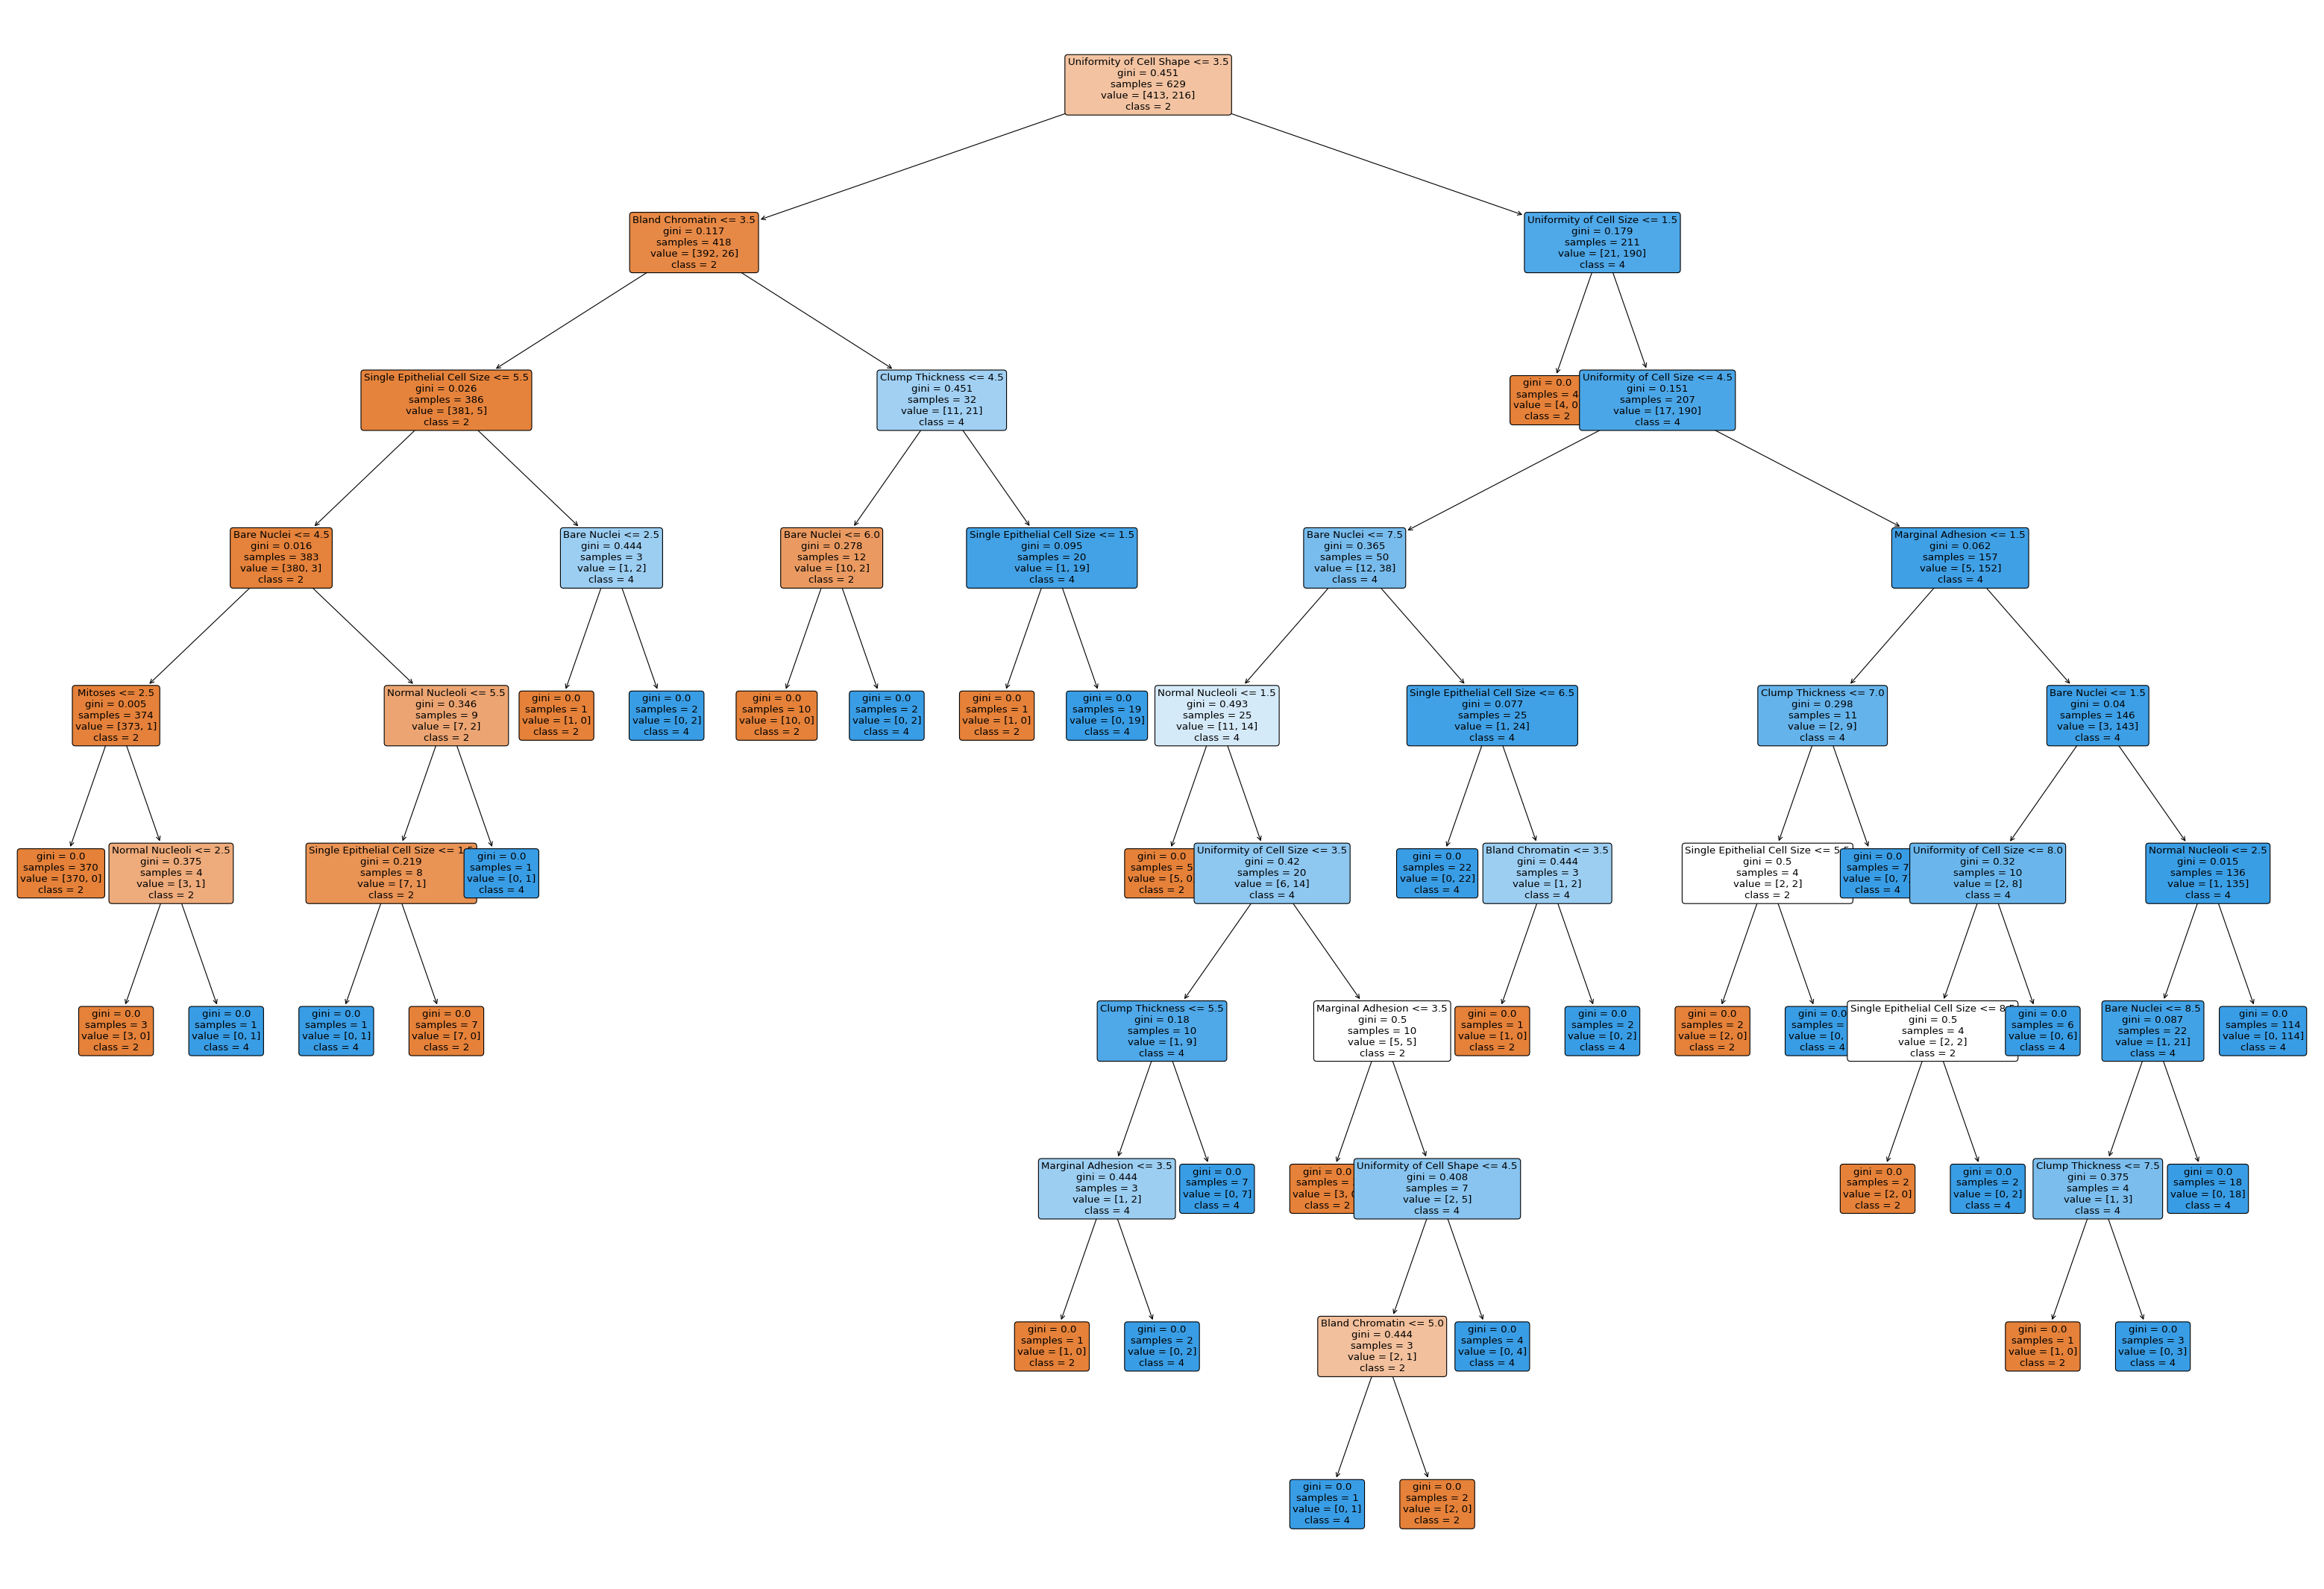

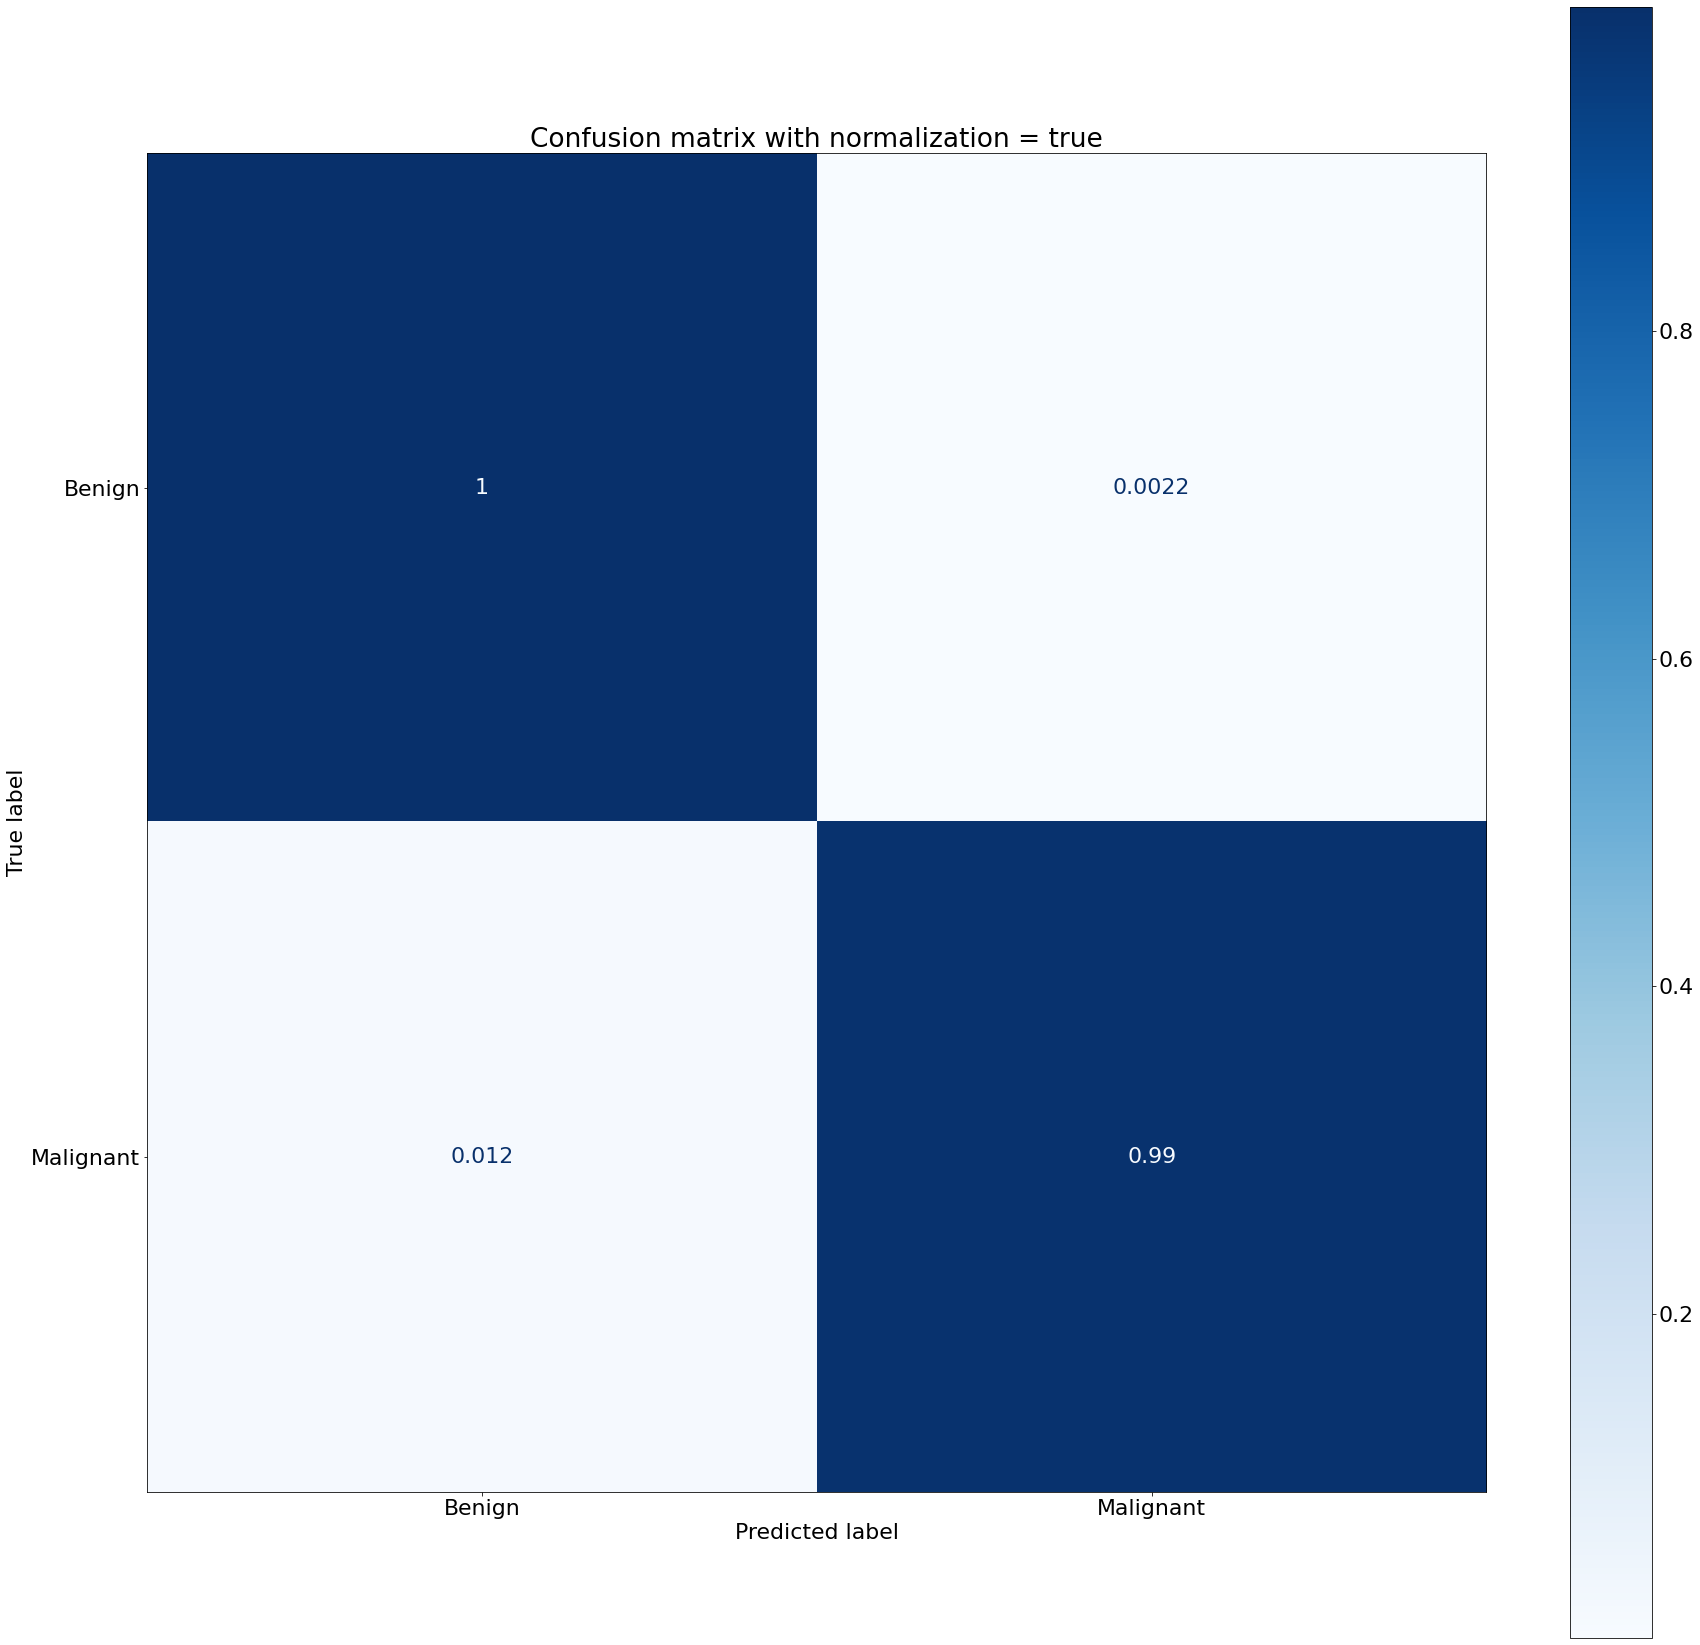

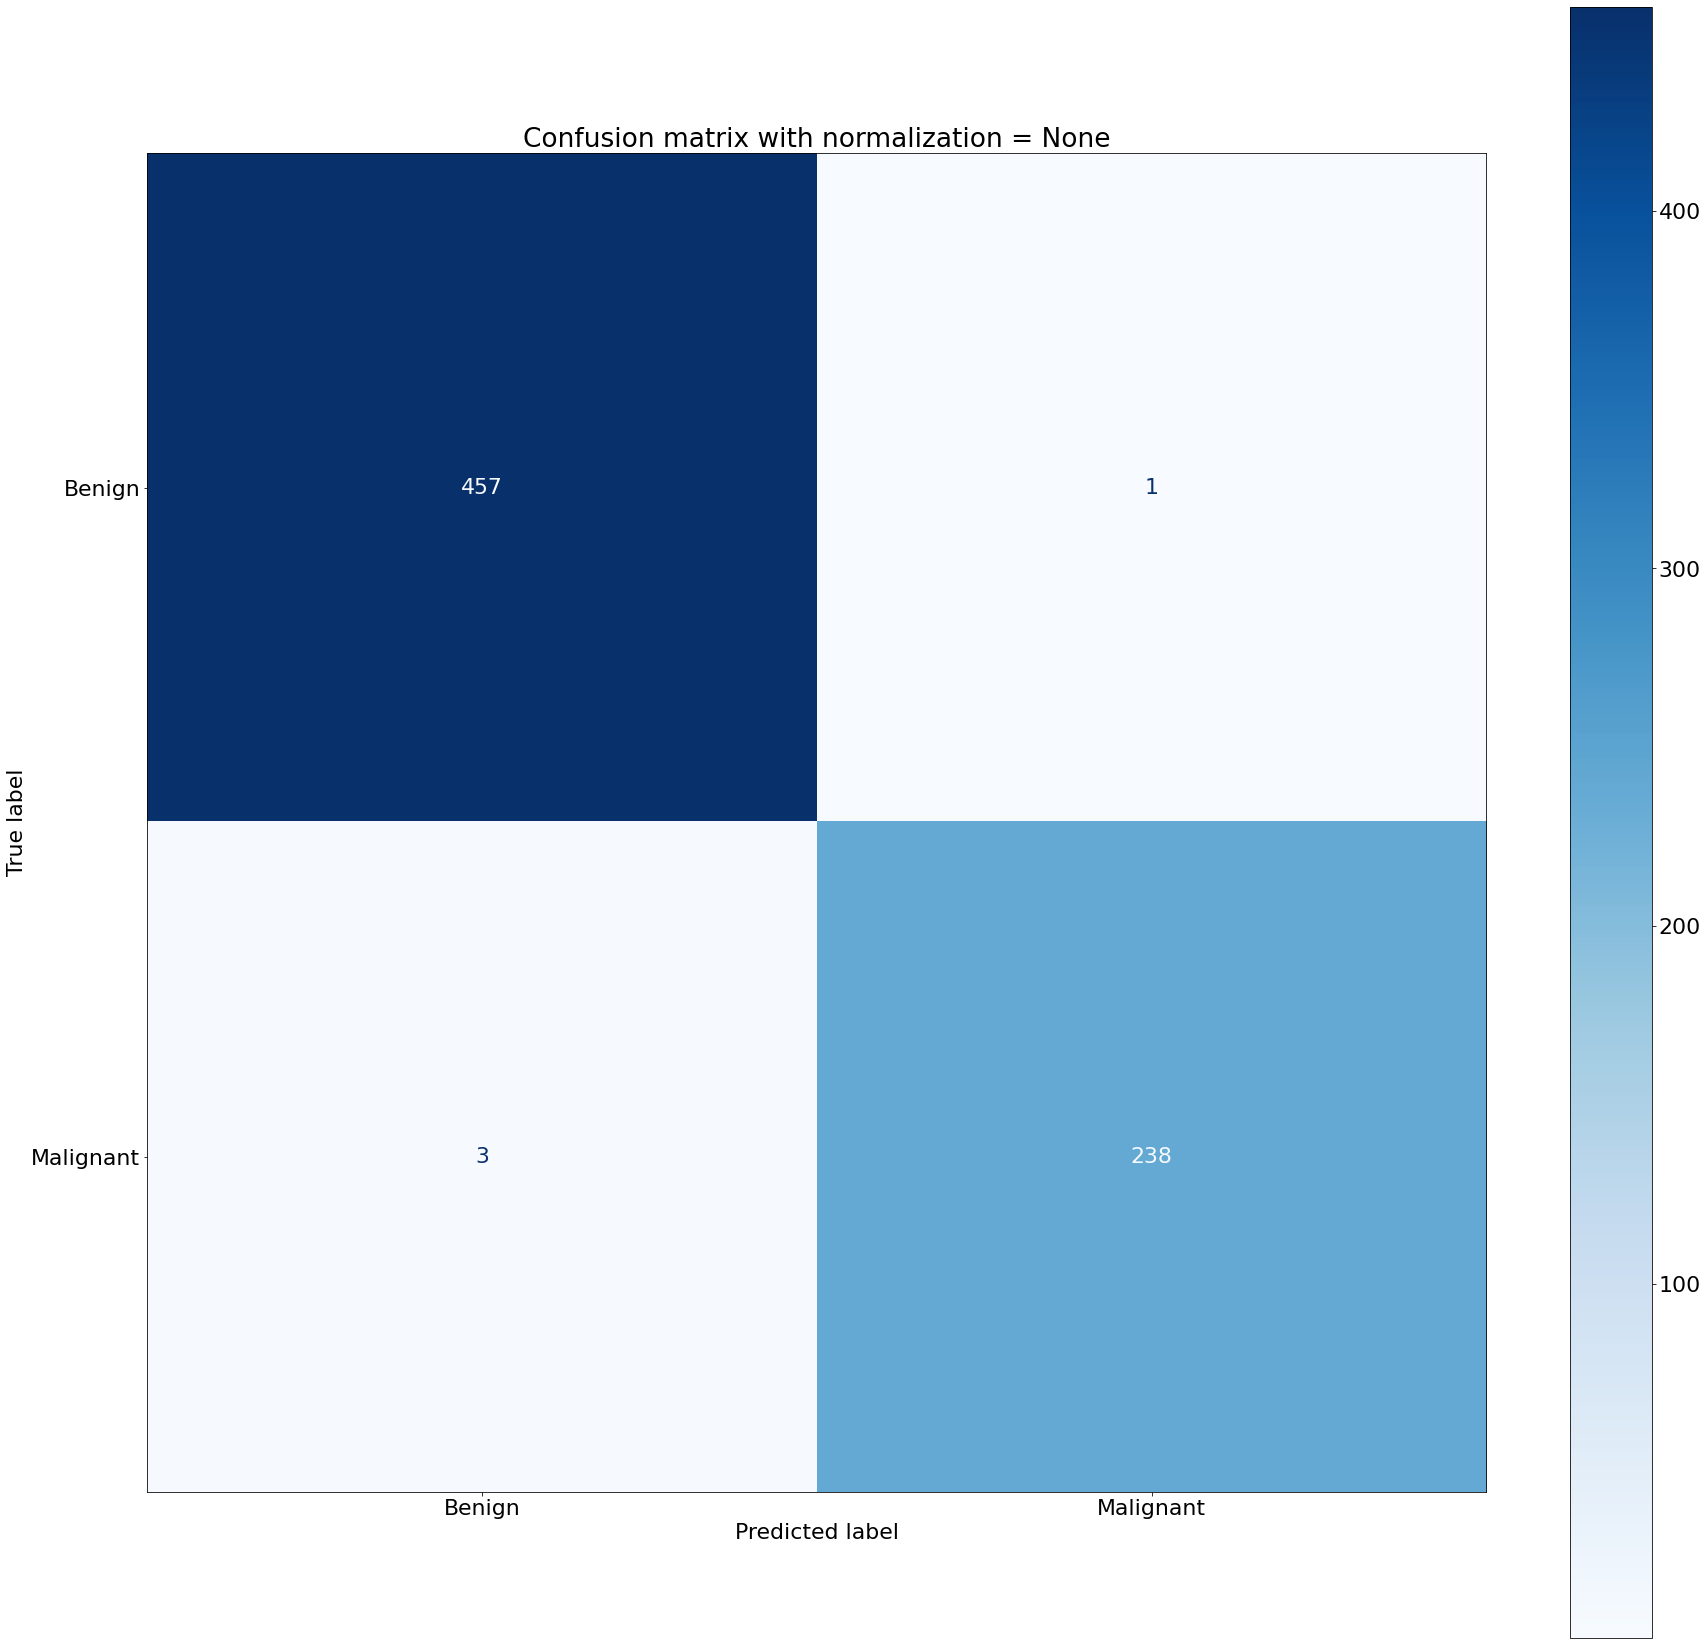

<Figure size 2160x2160 with 0 Axes>

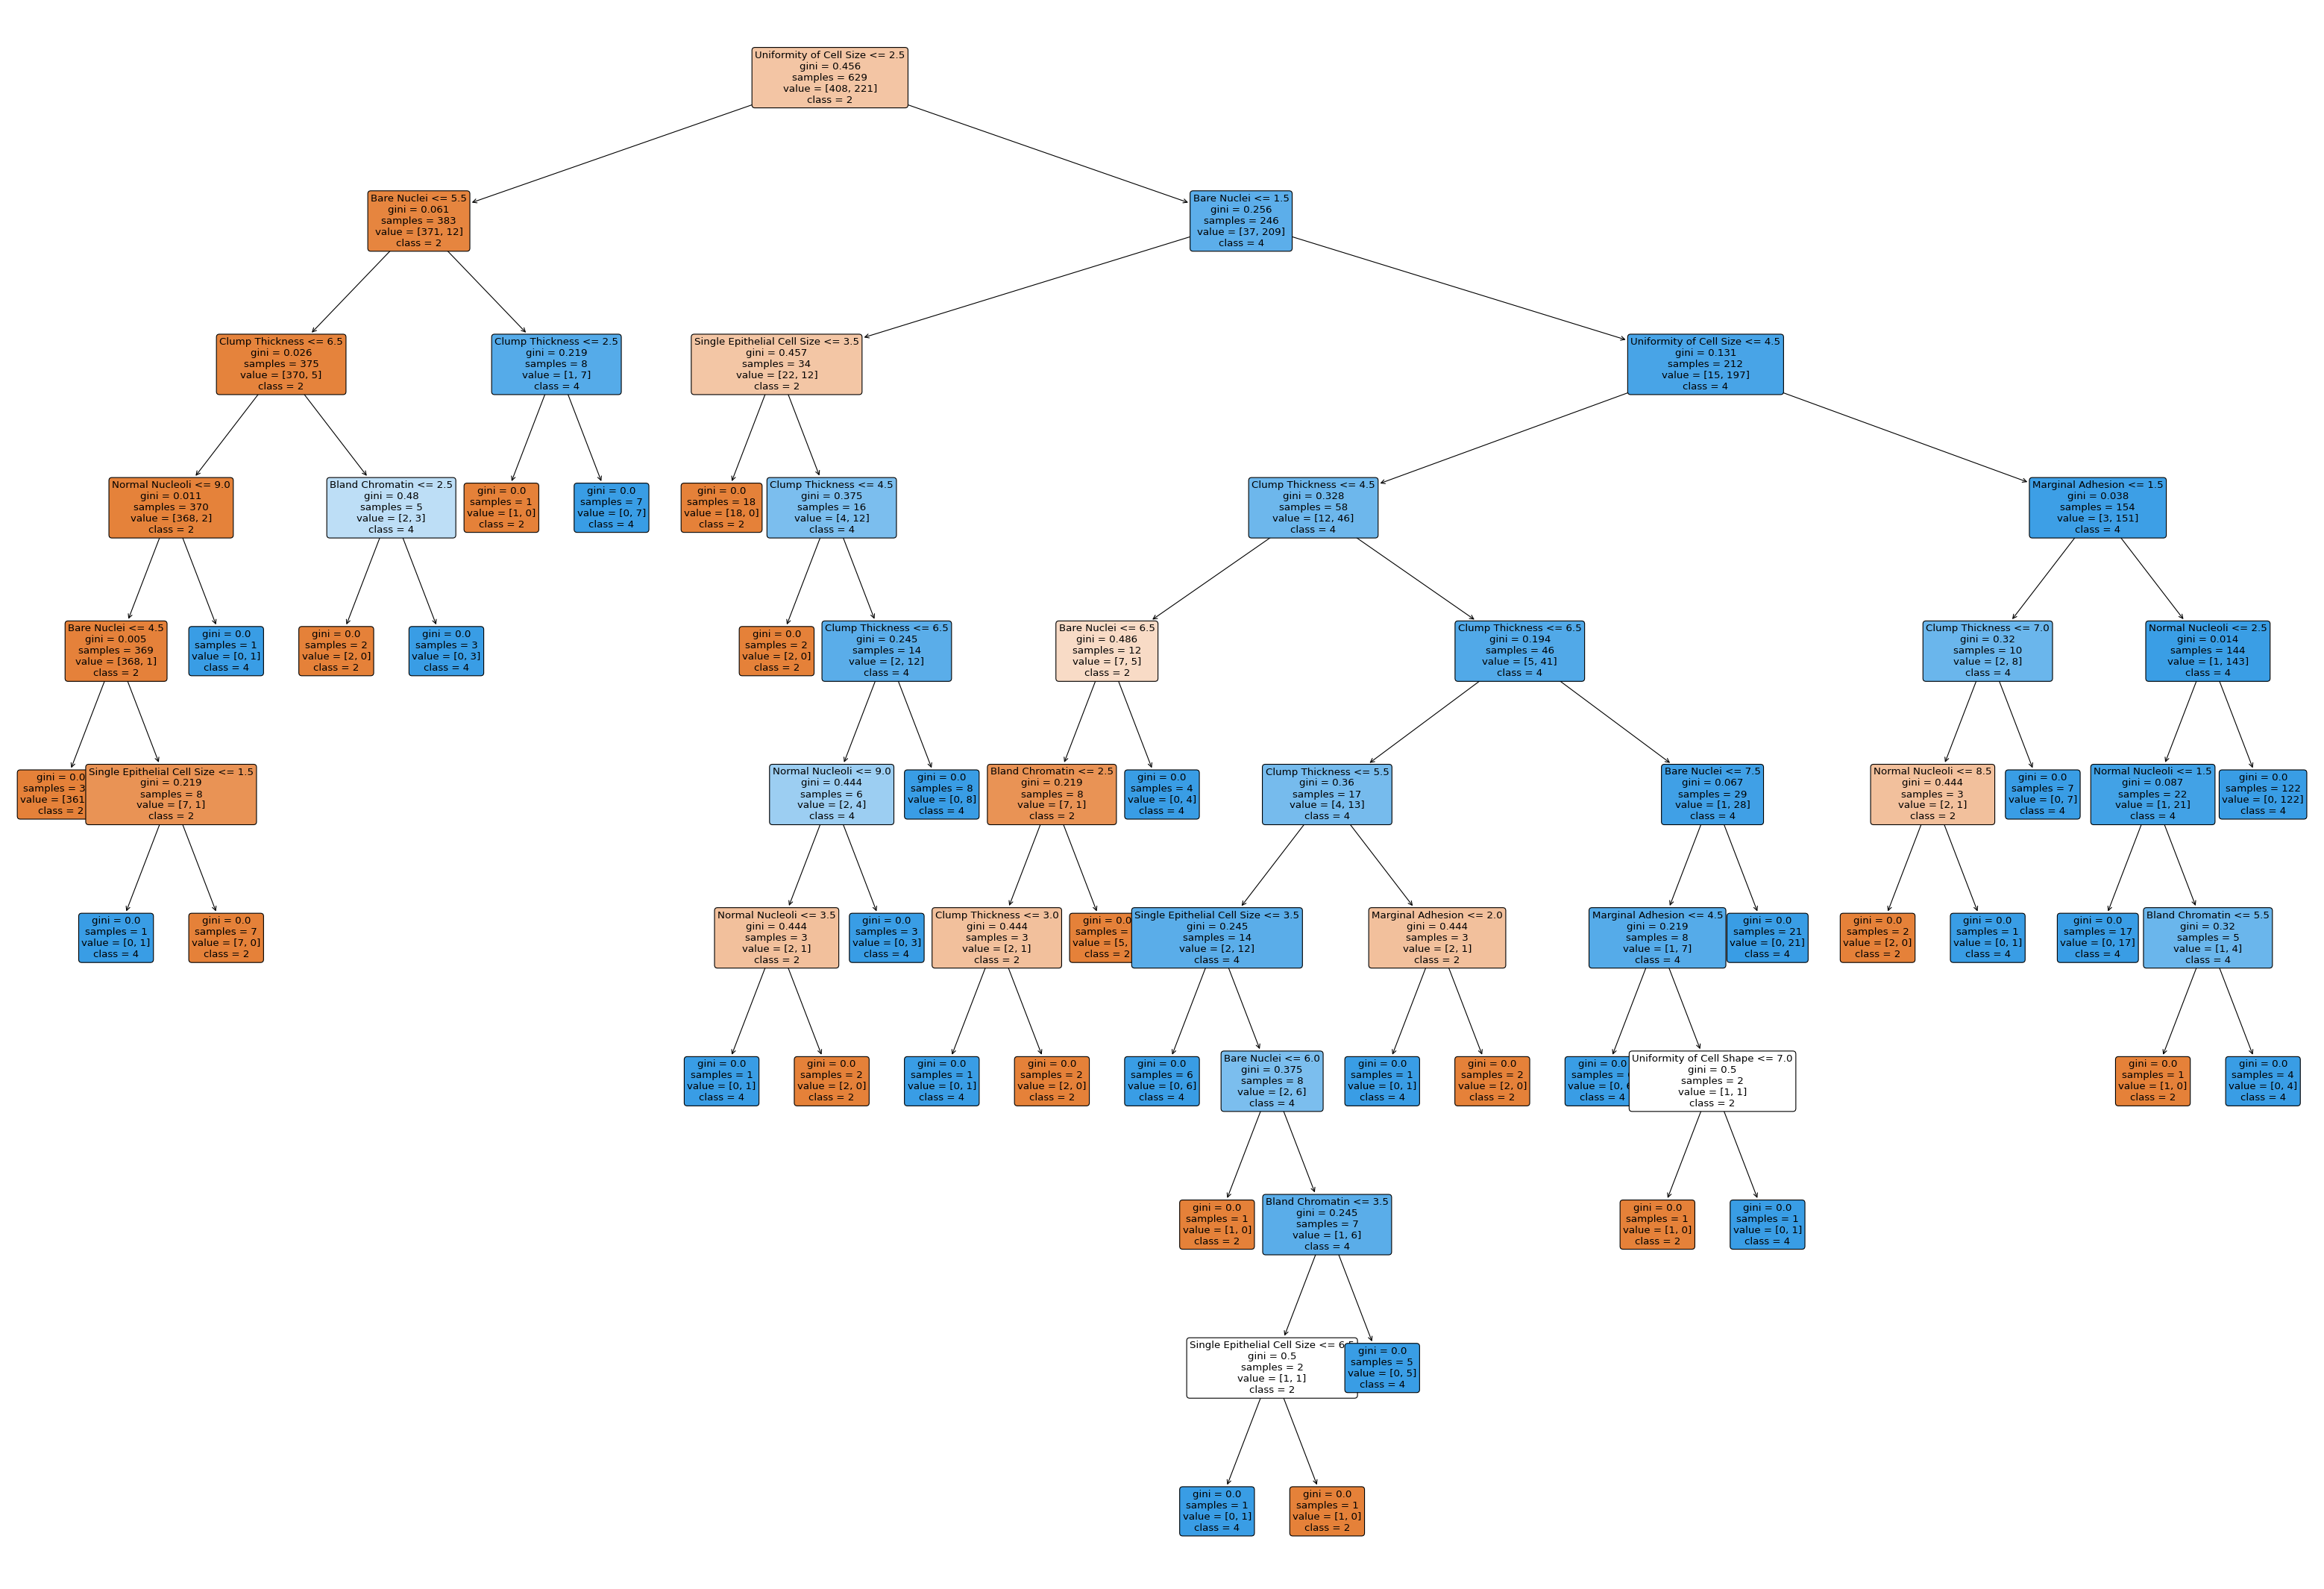

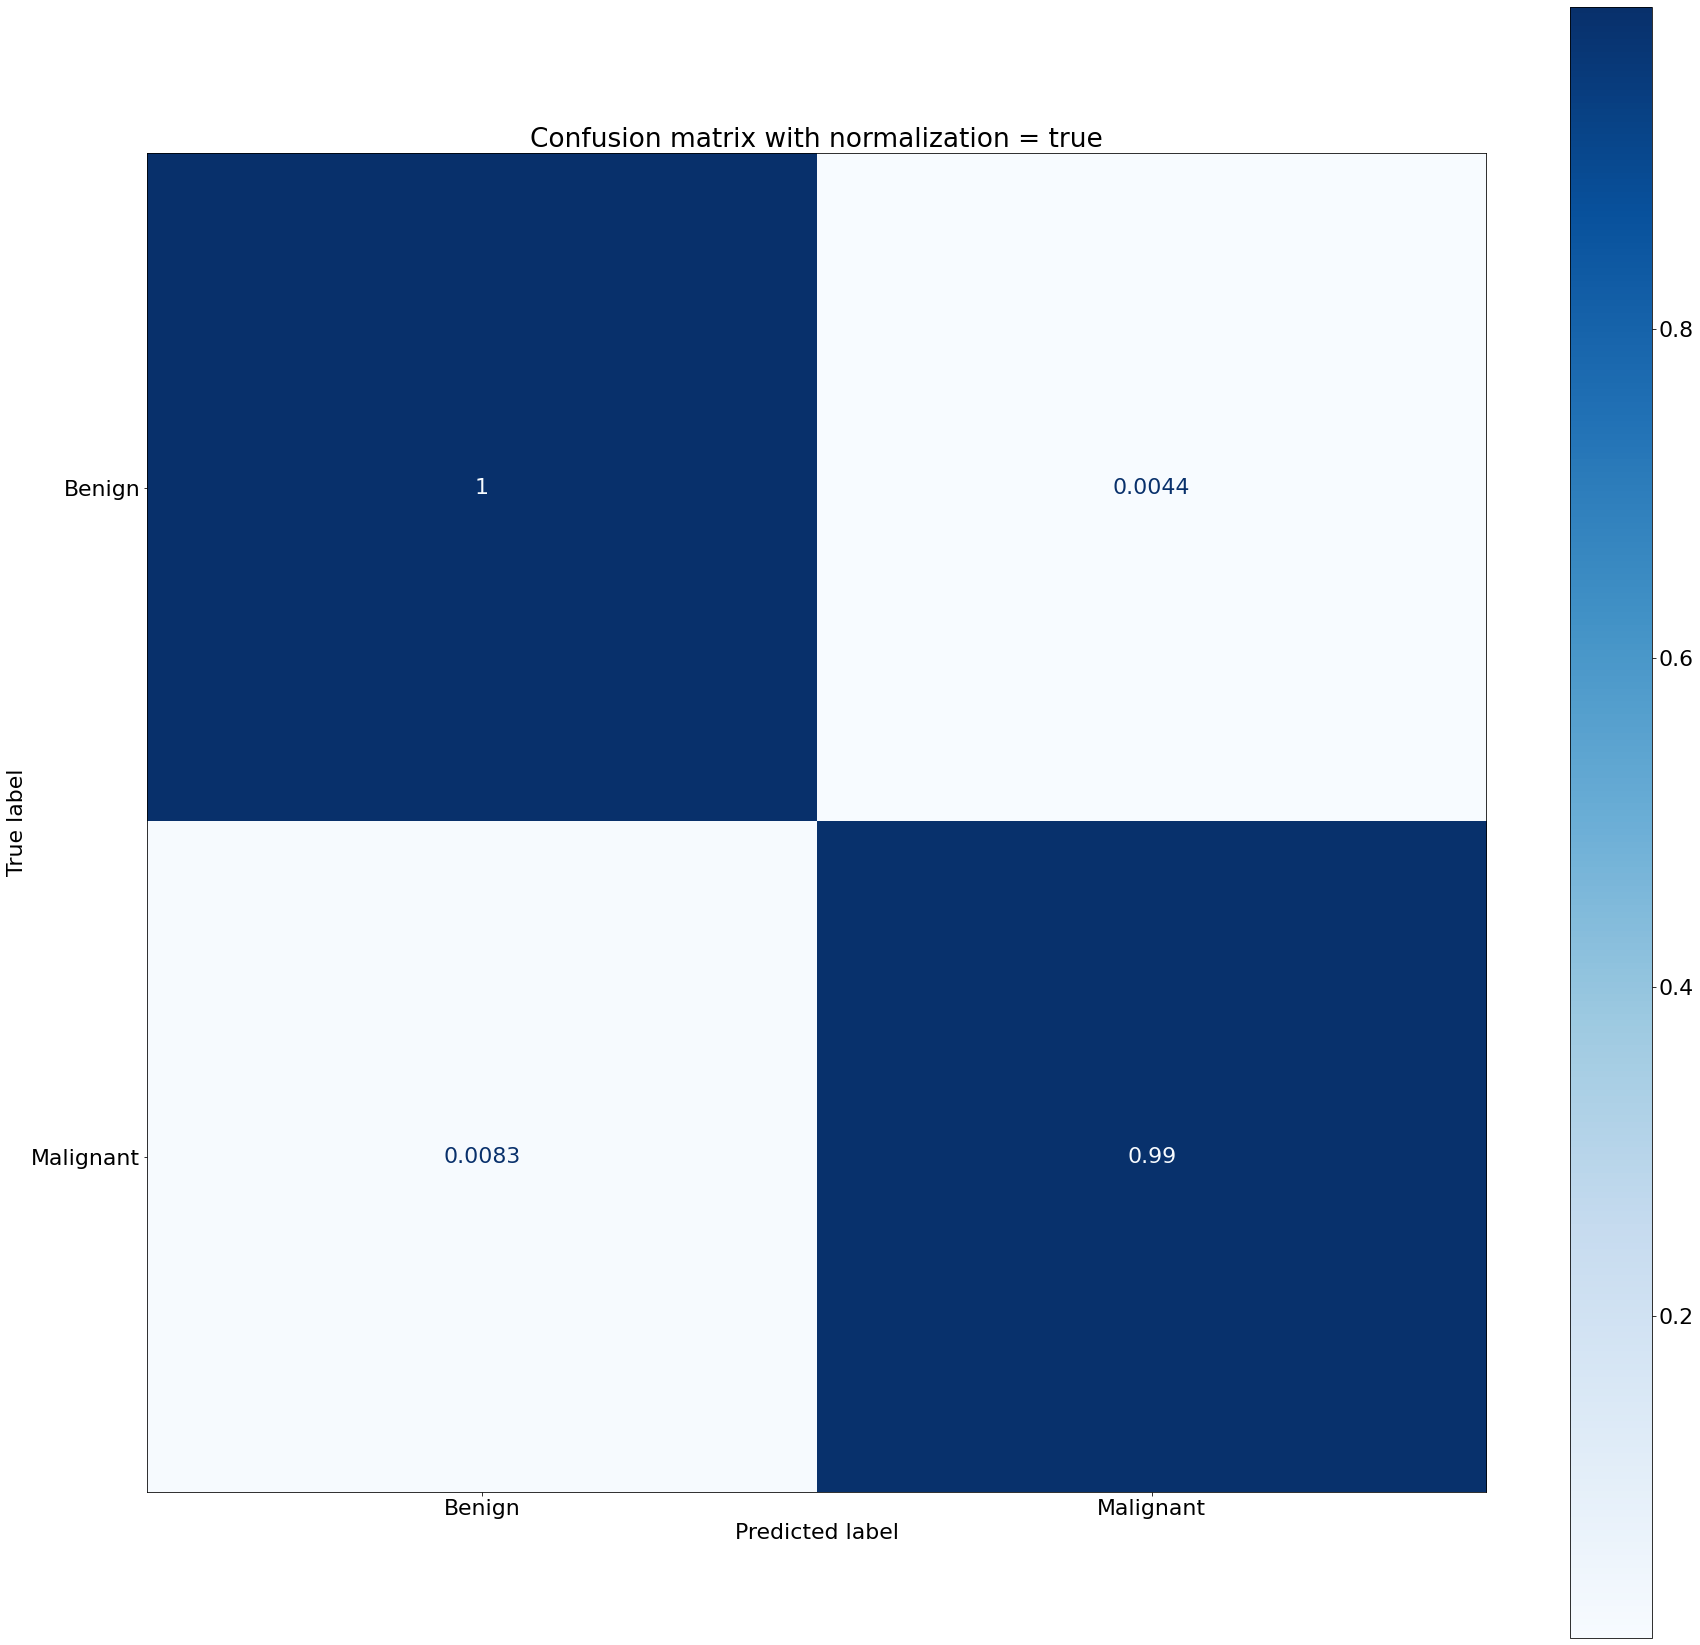

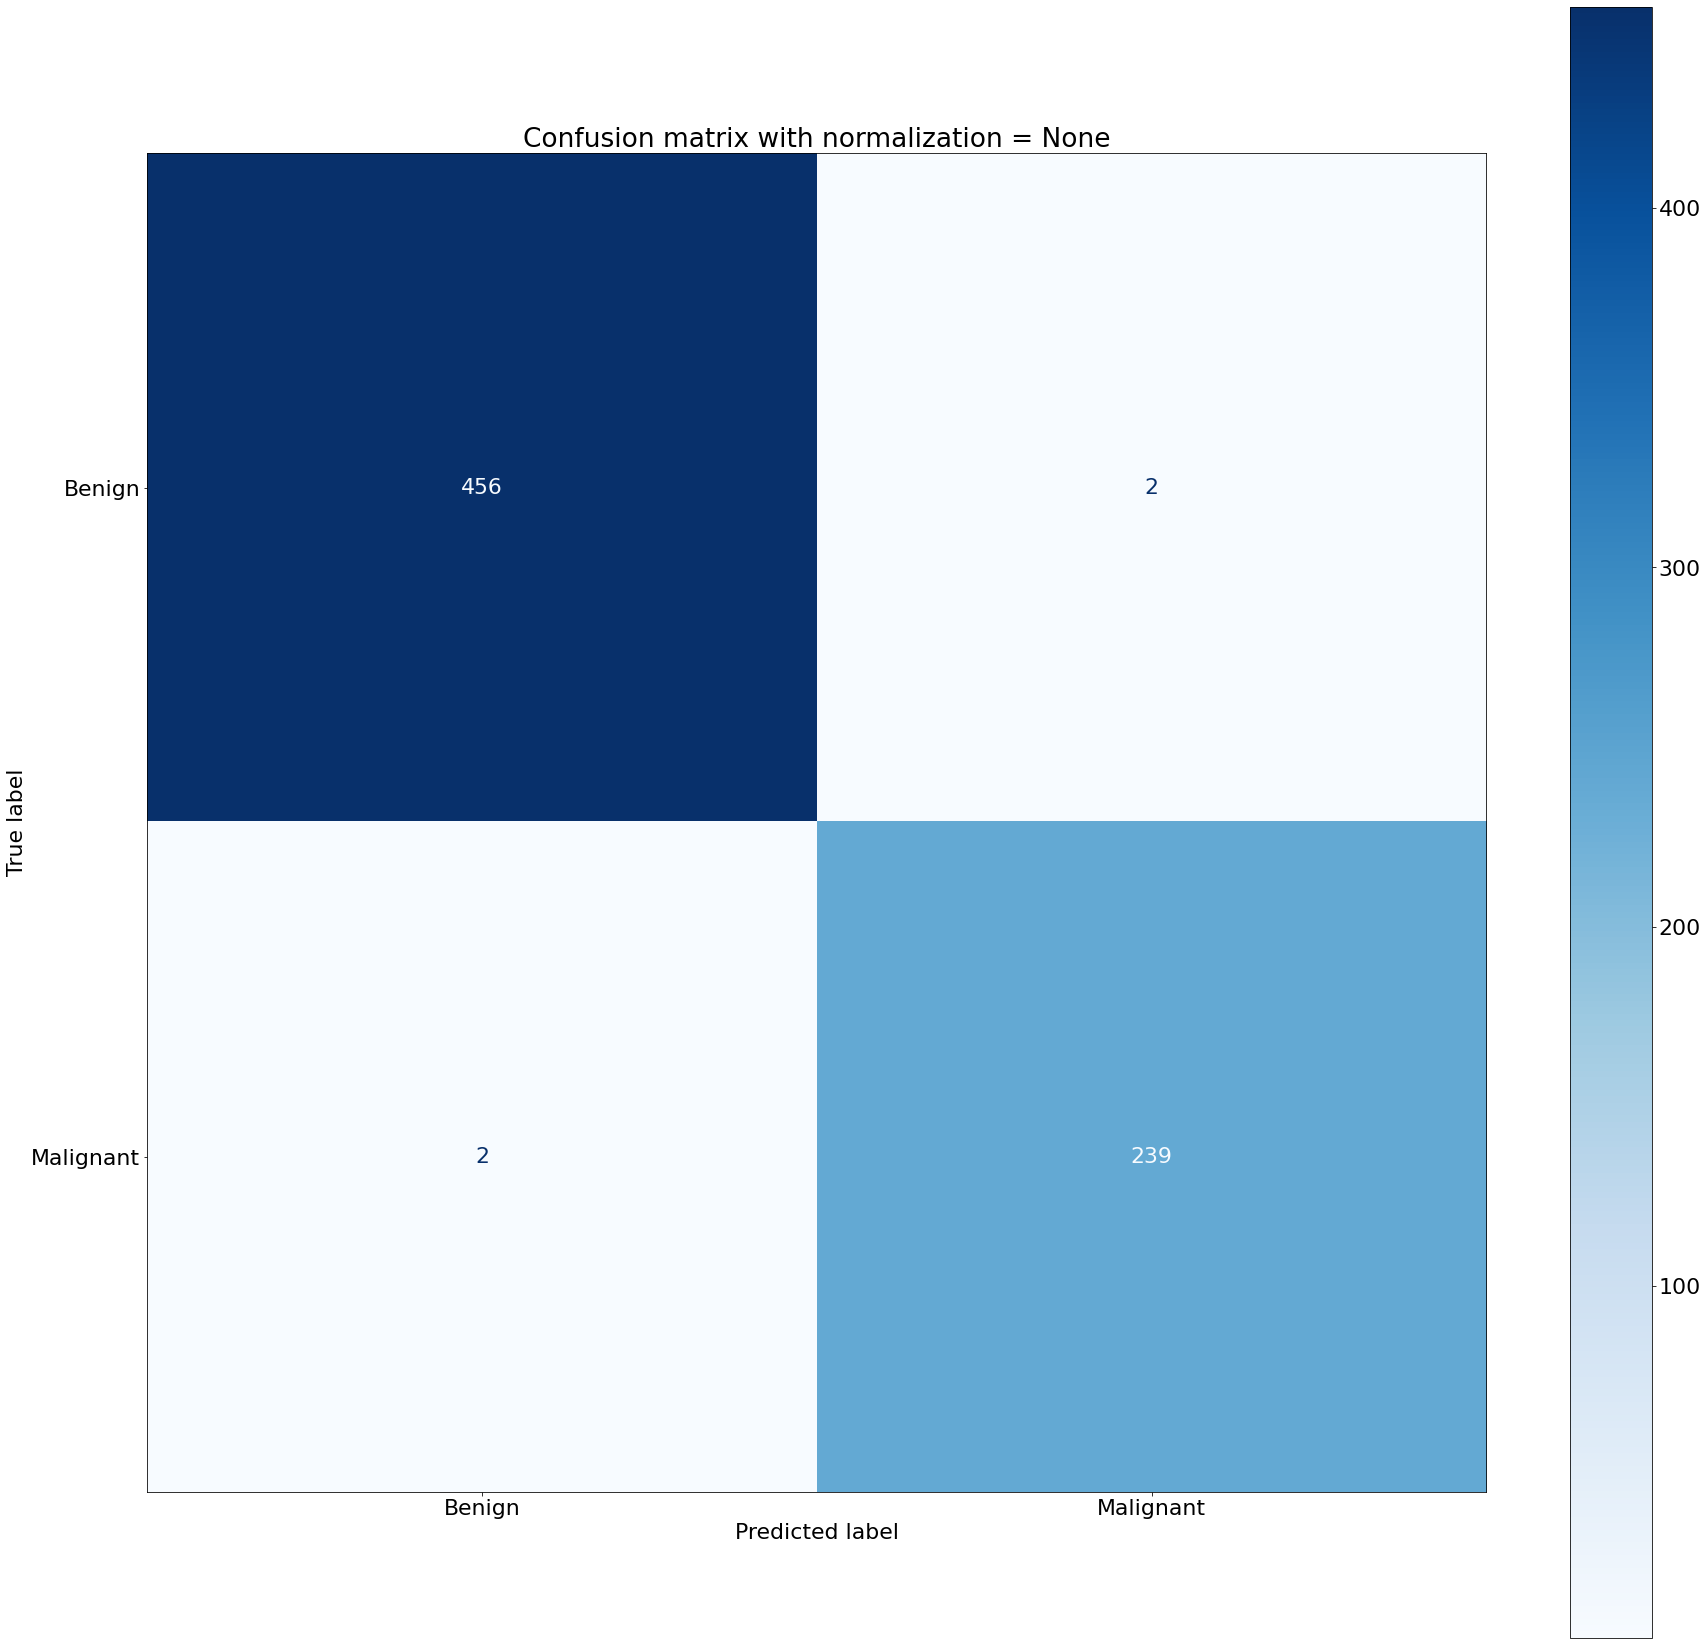

<Figure size 2160x2160 with 0 Axes>

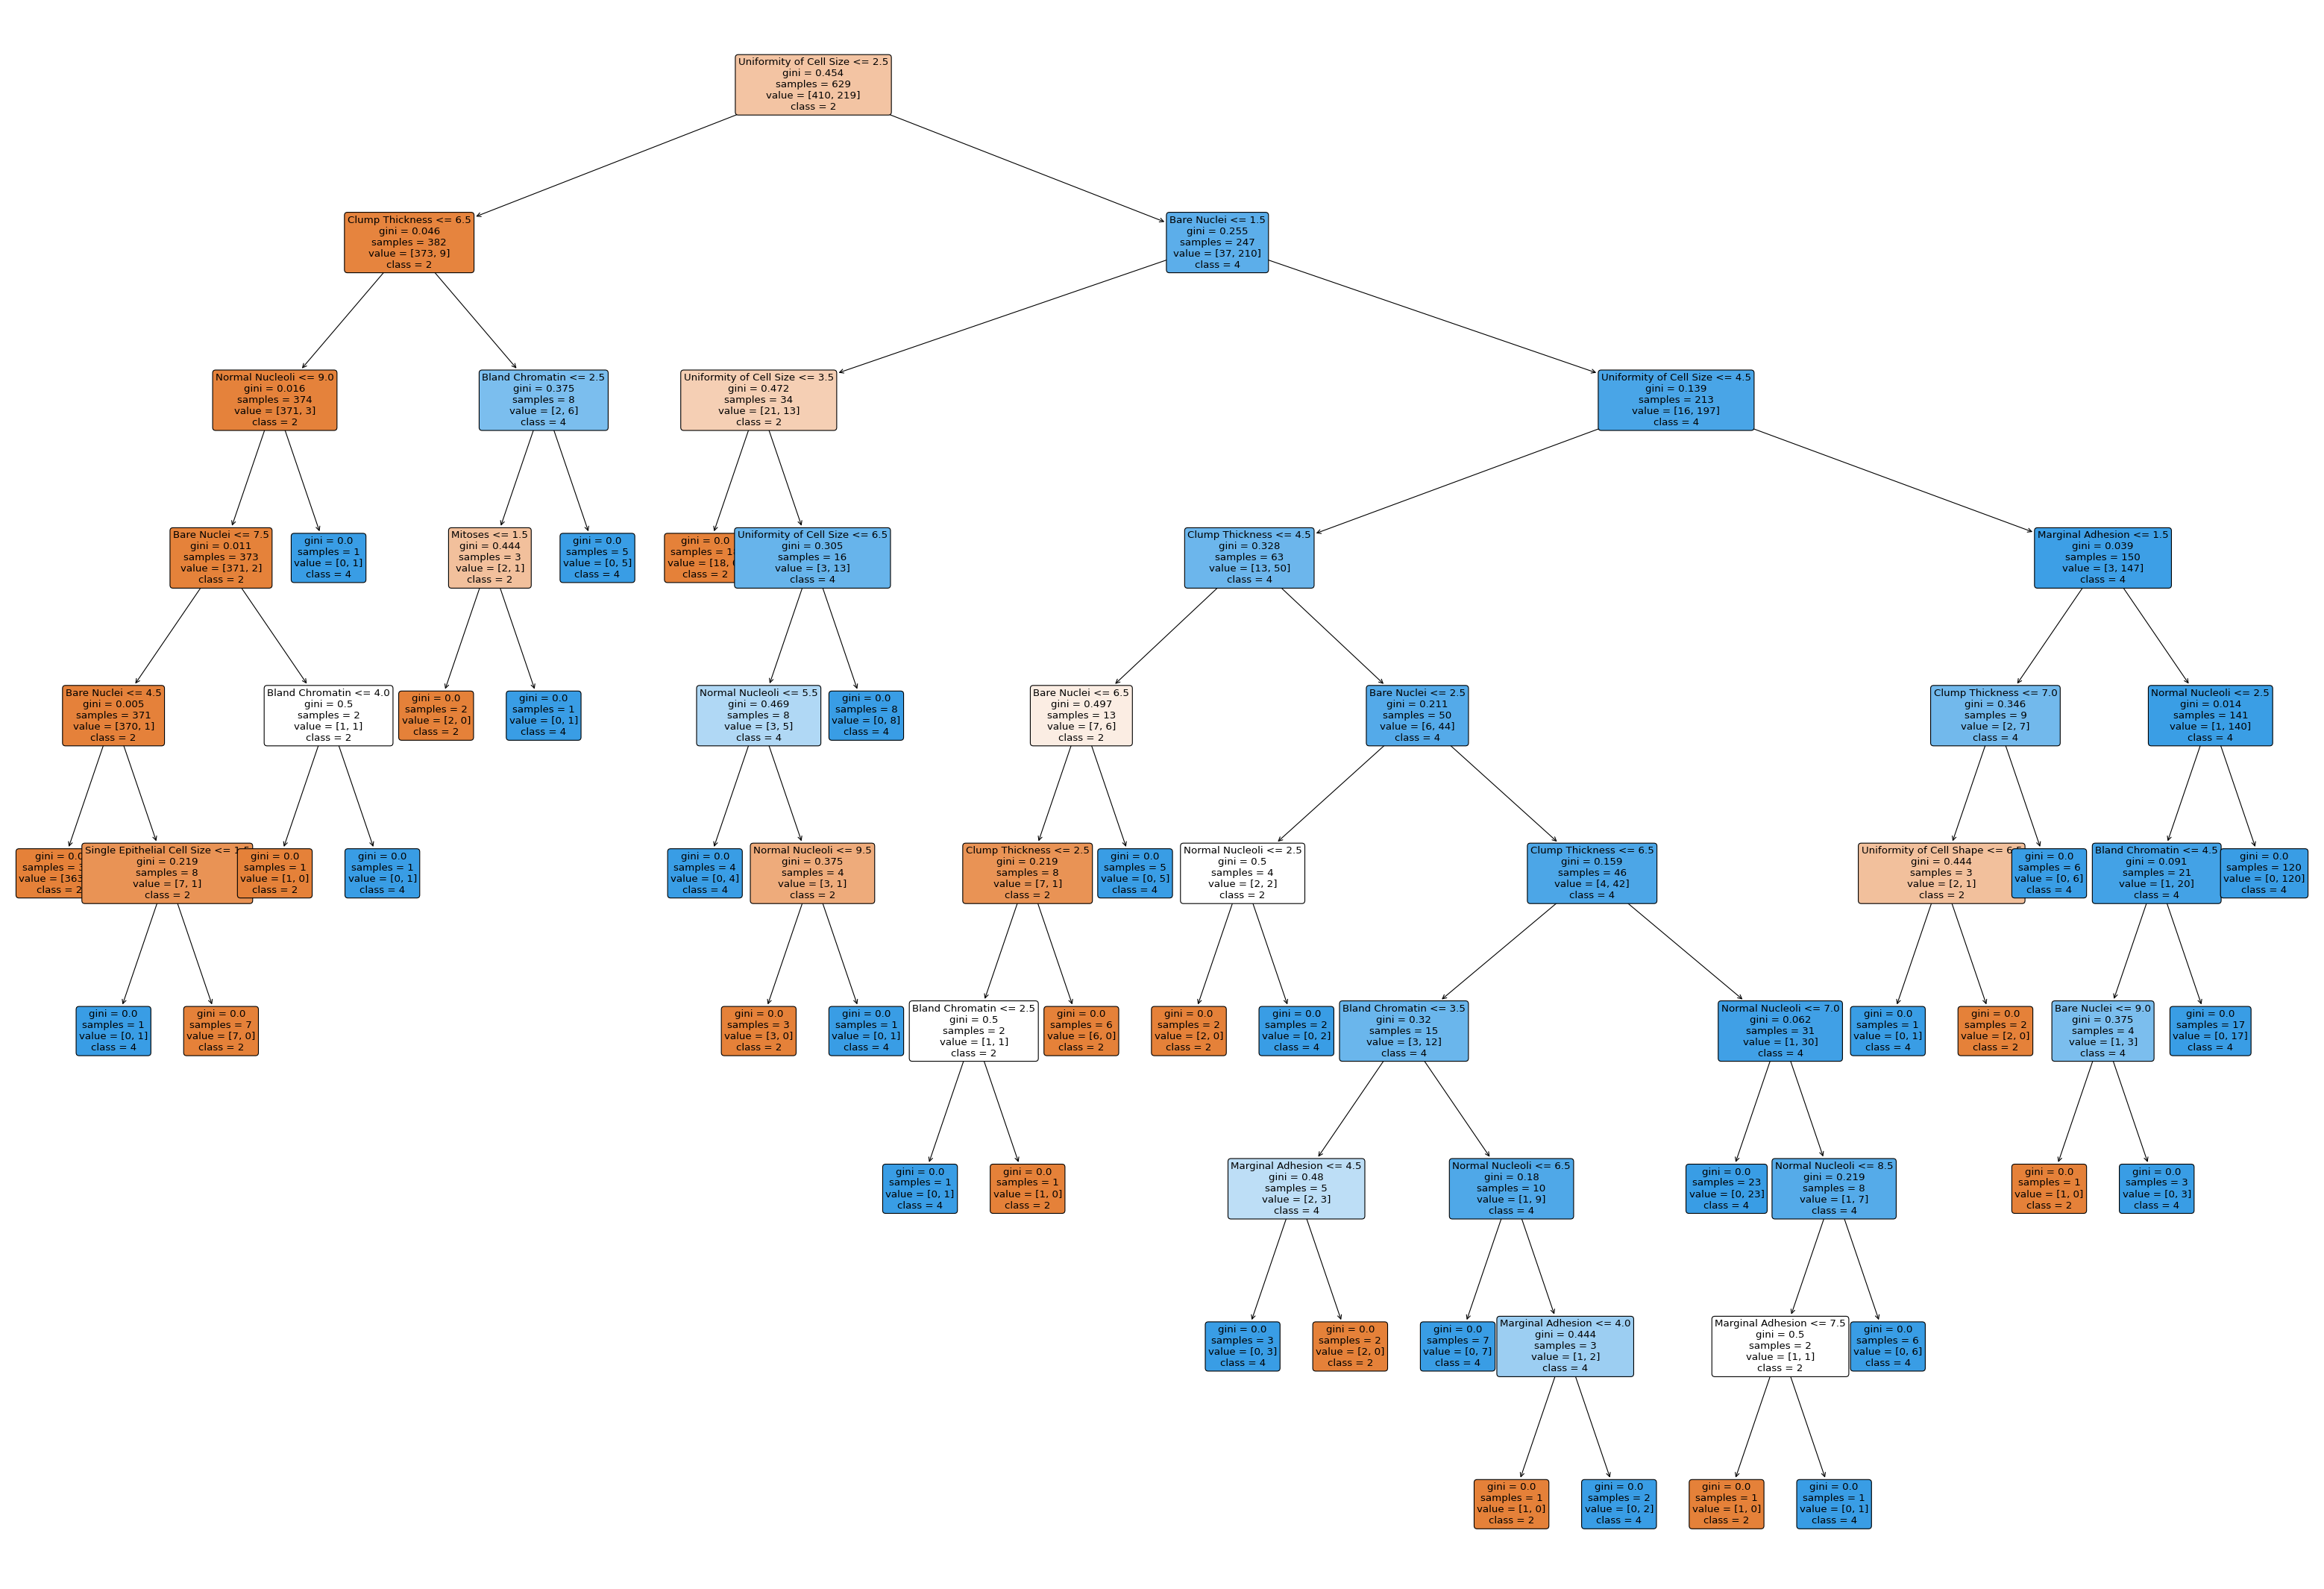

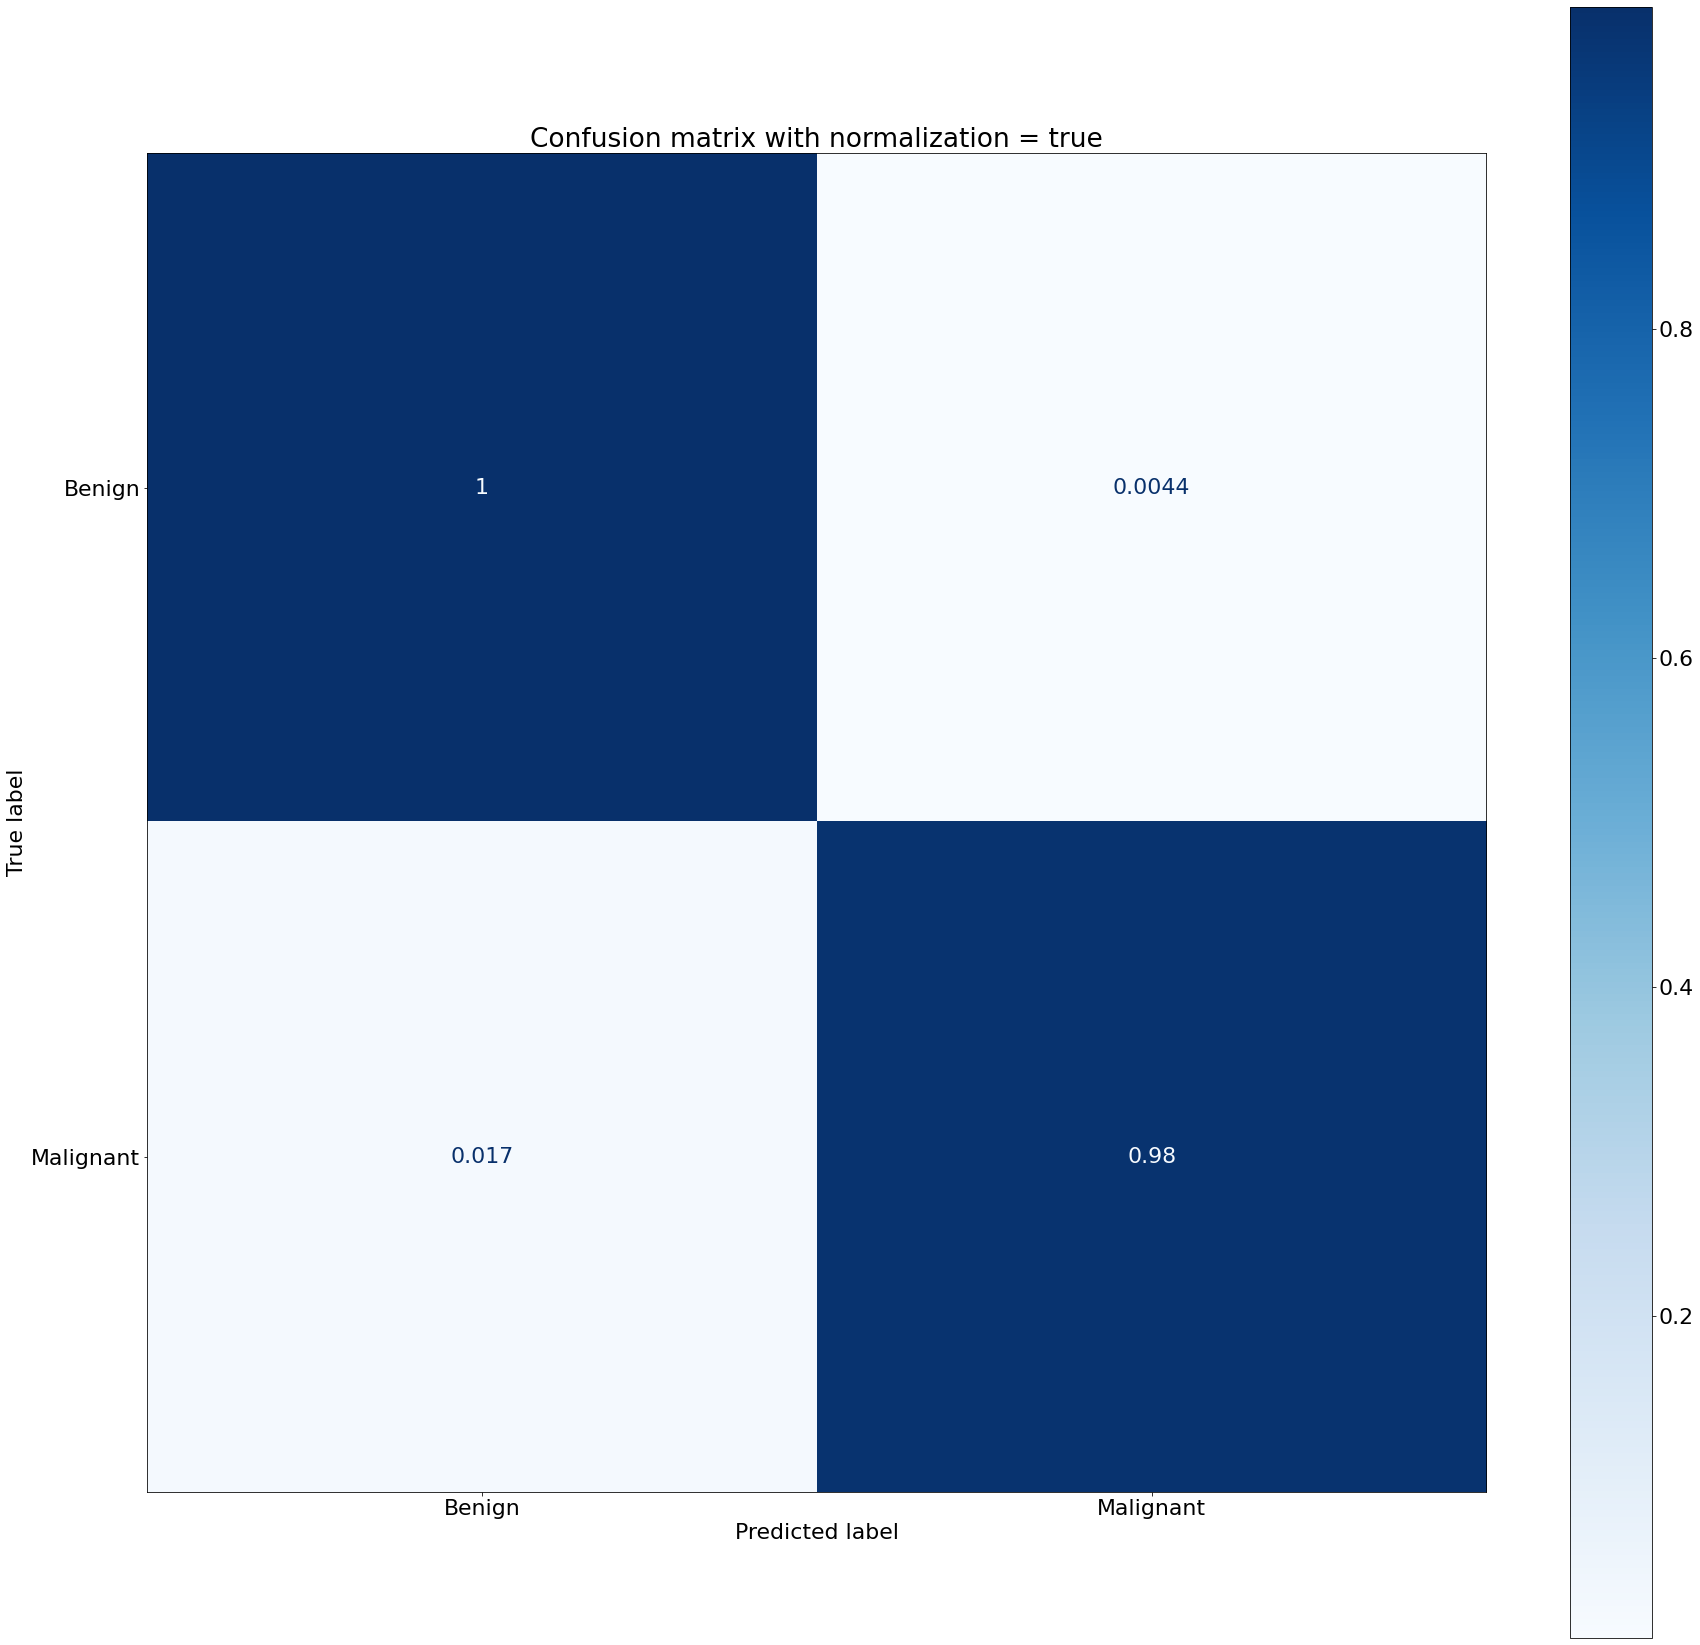

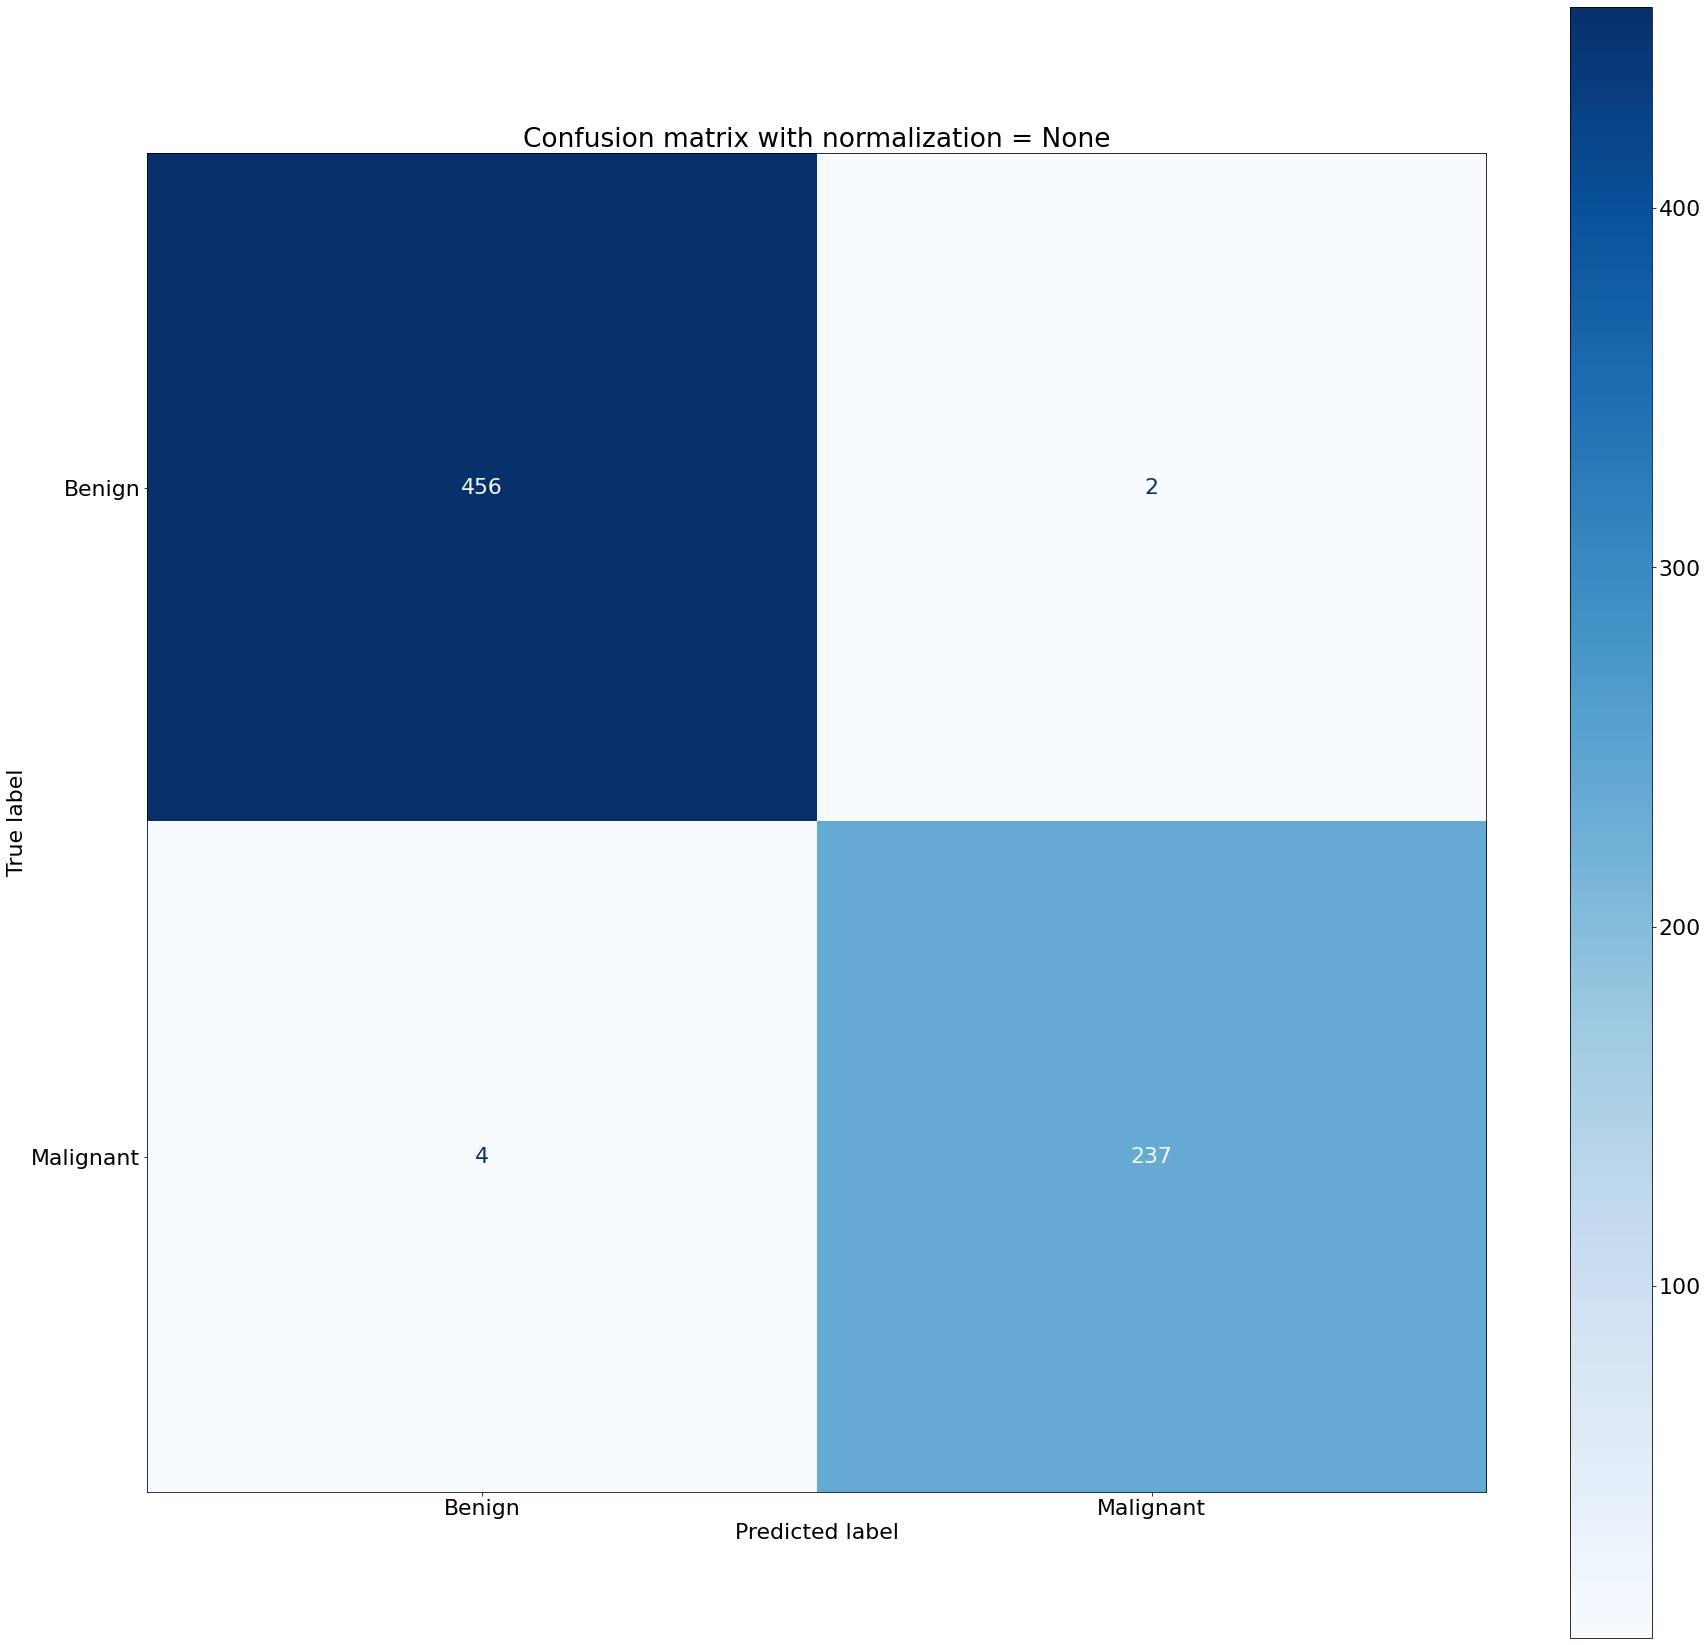

<Figure size 2160x2160 with 0 Axes>

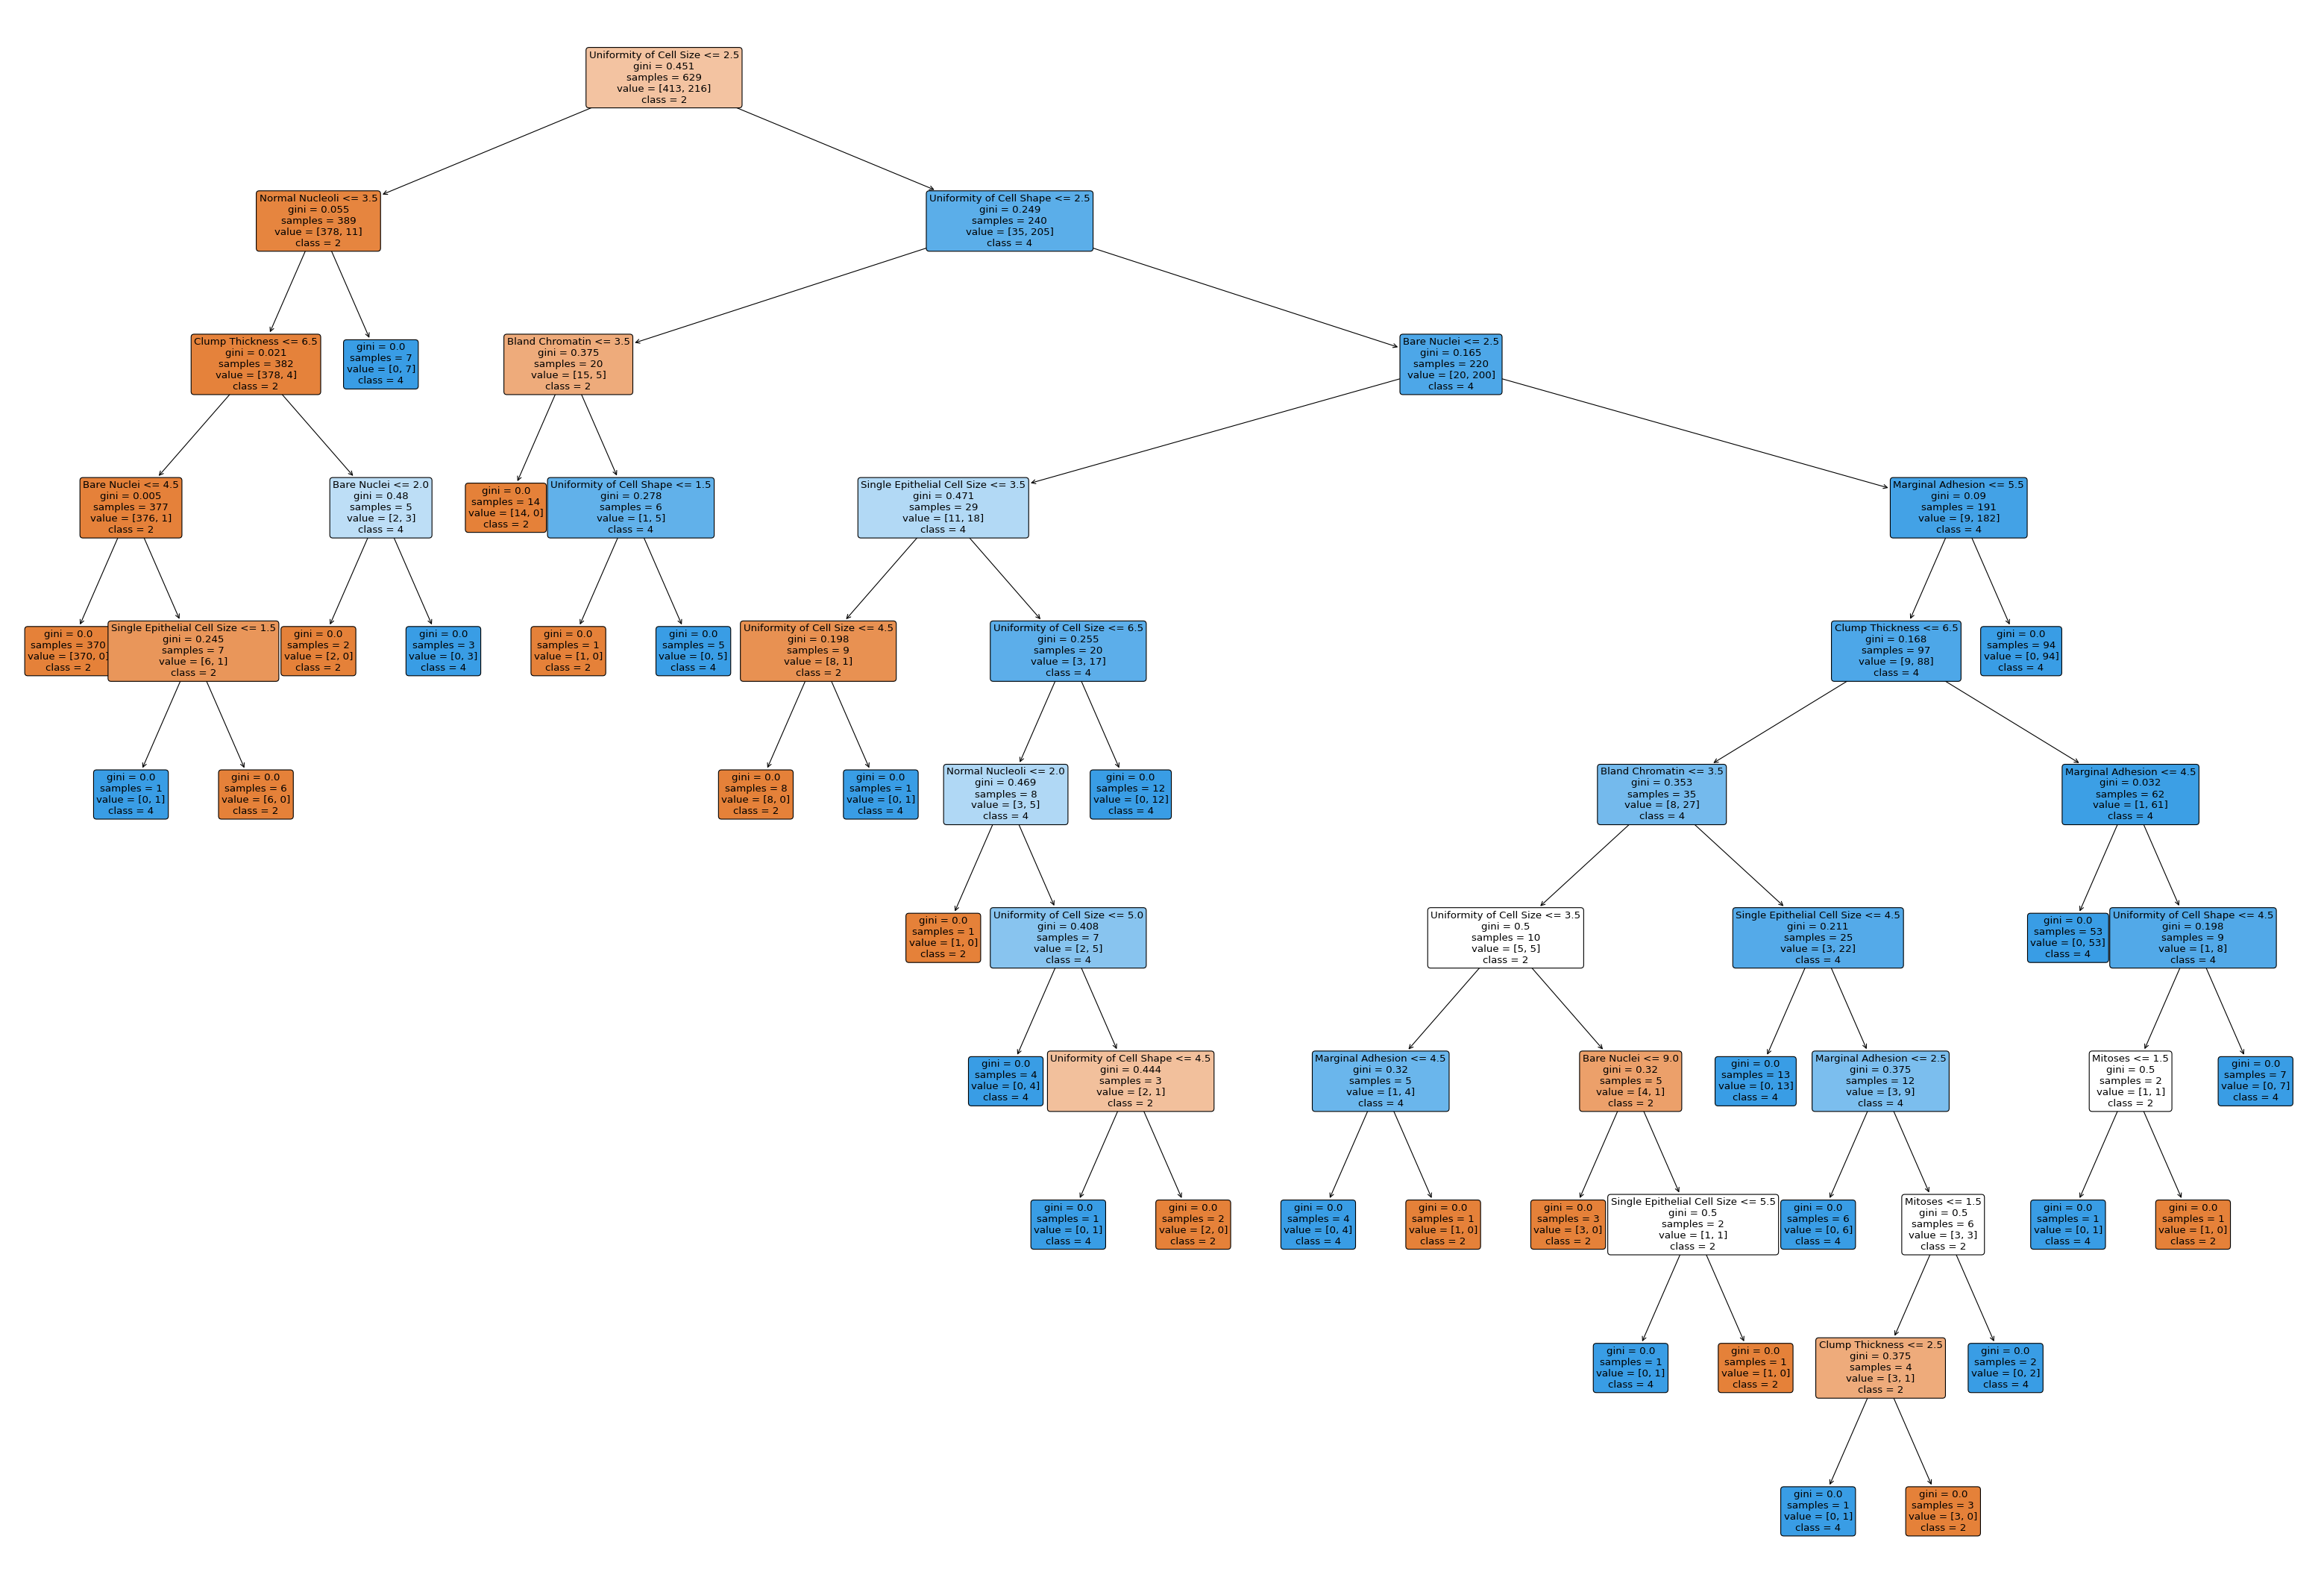

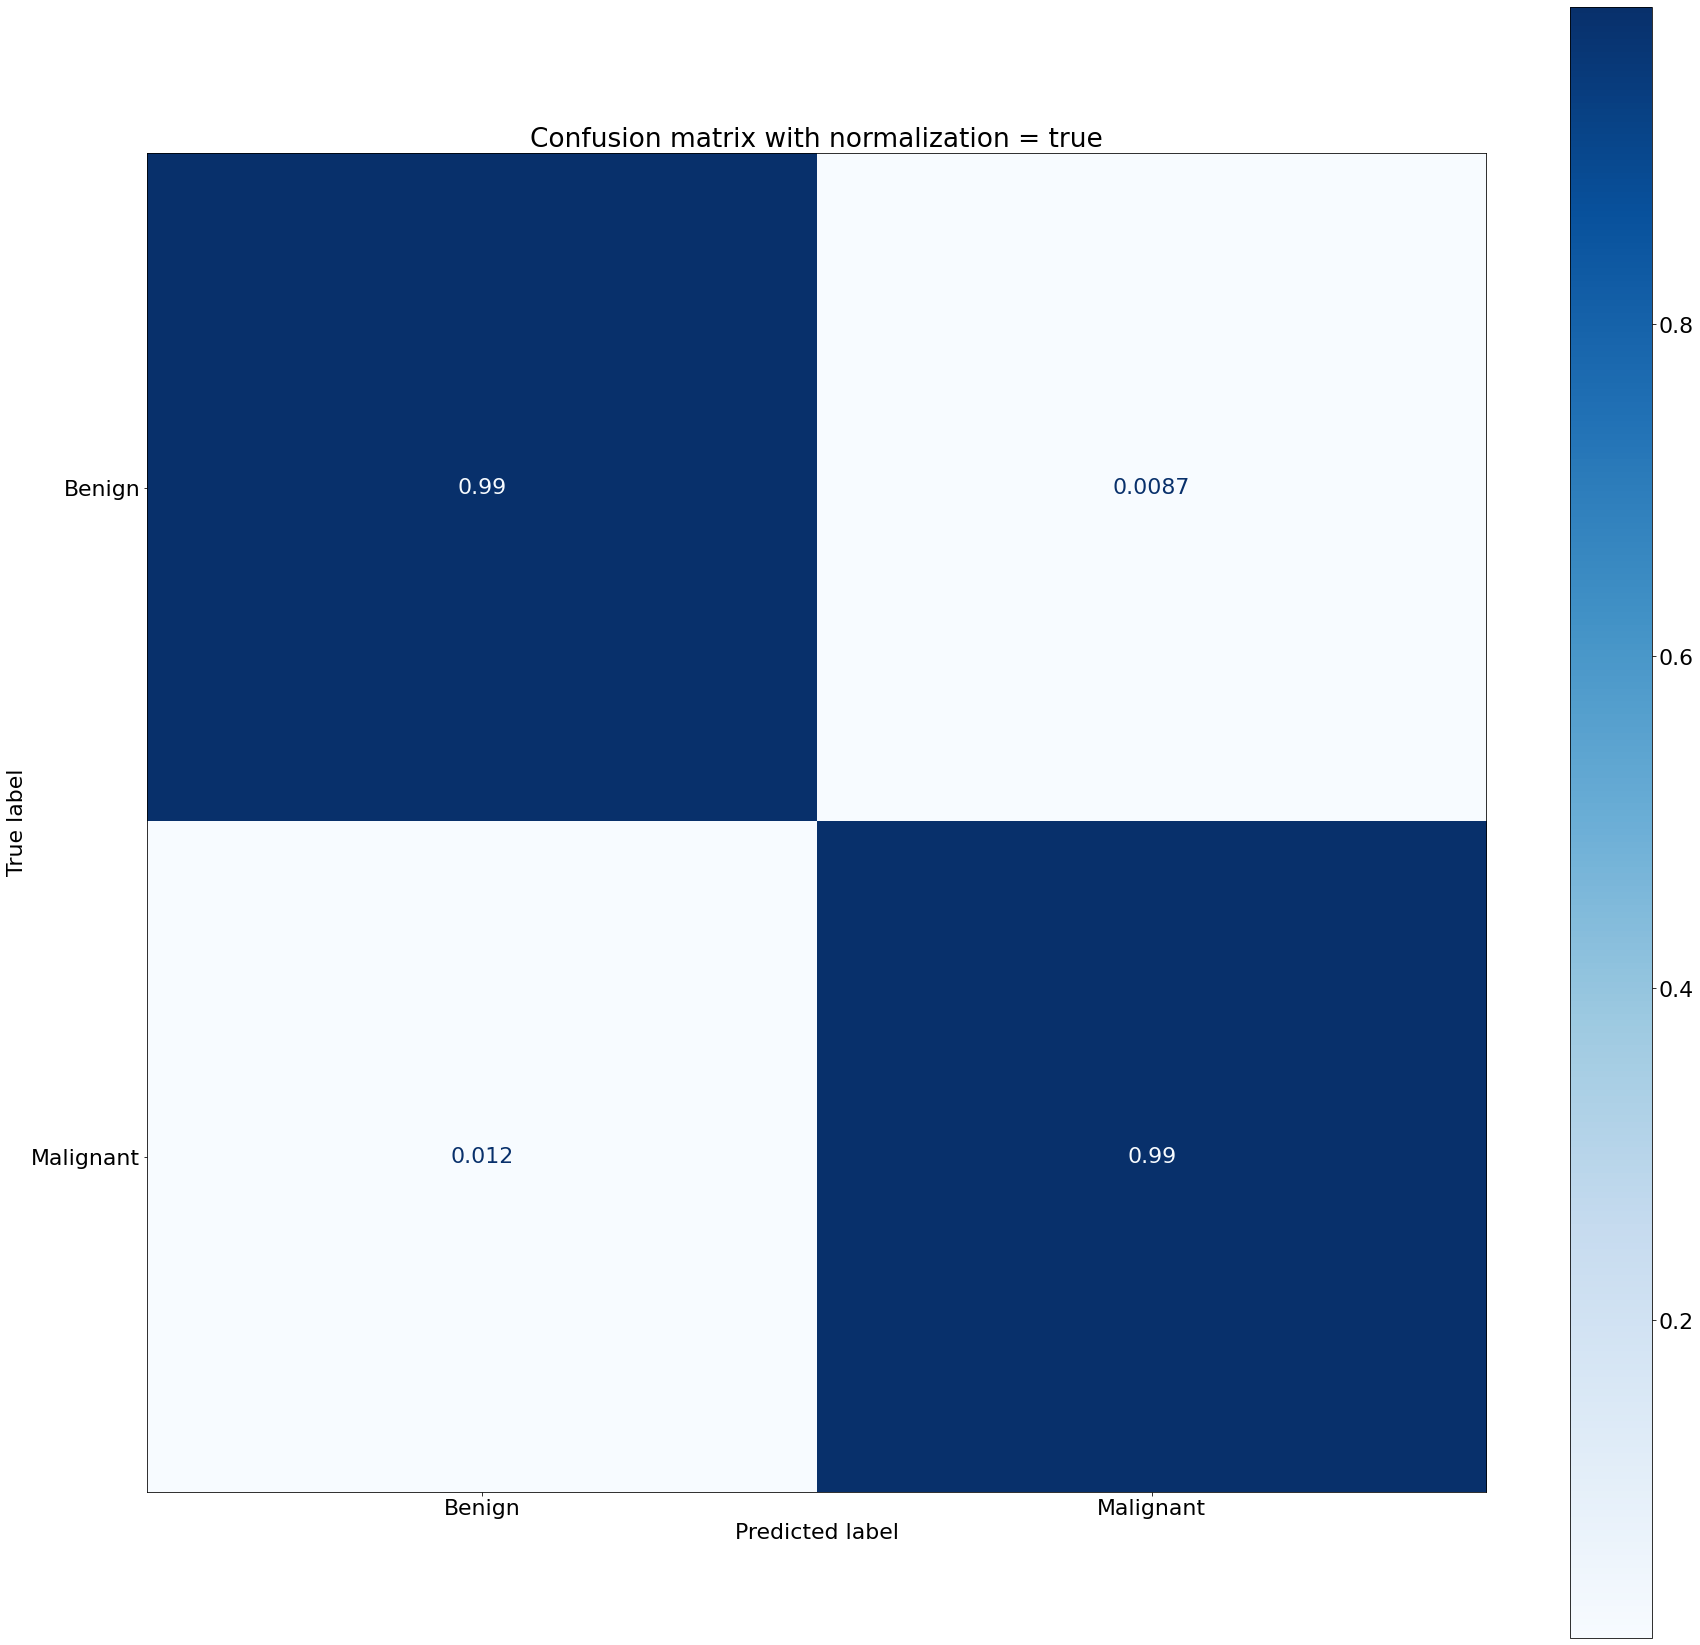

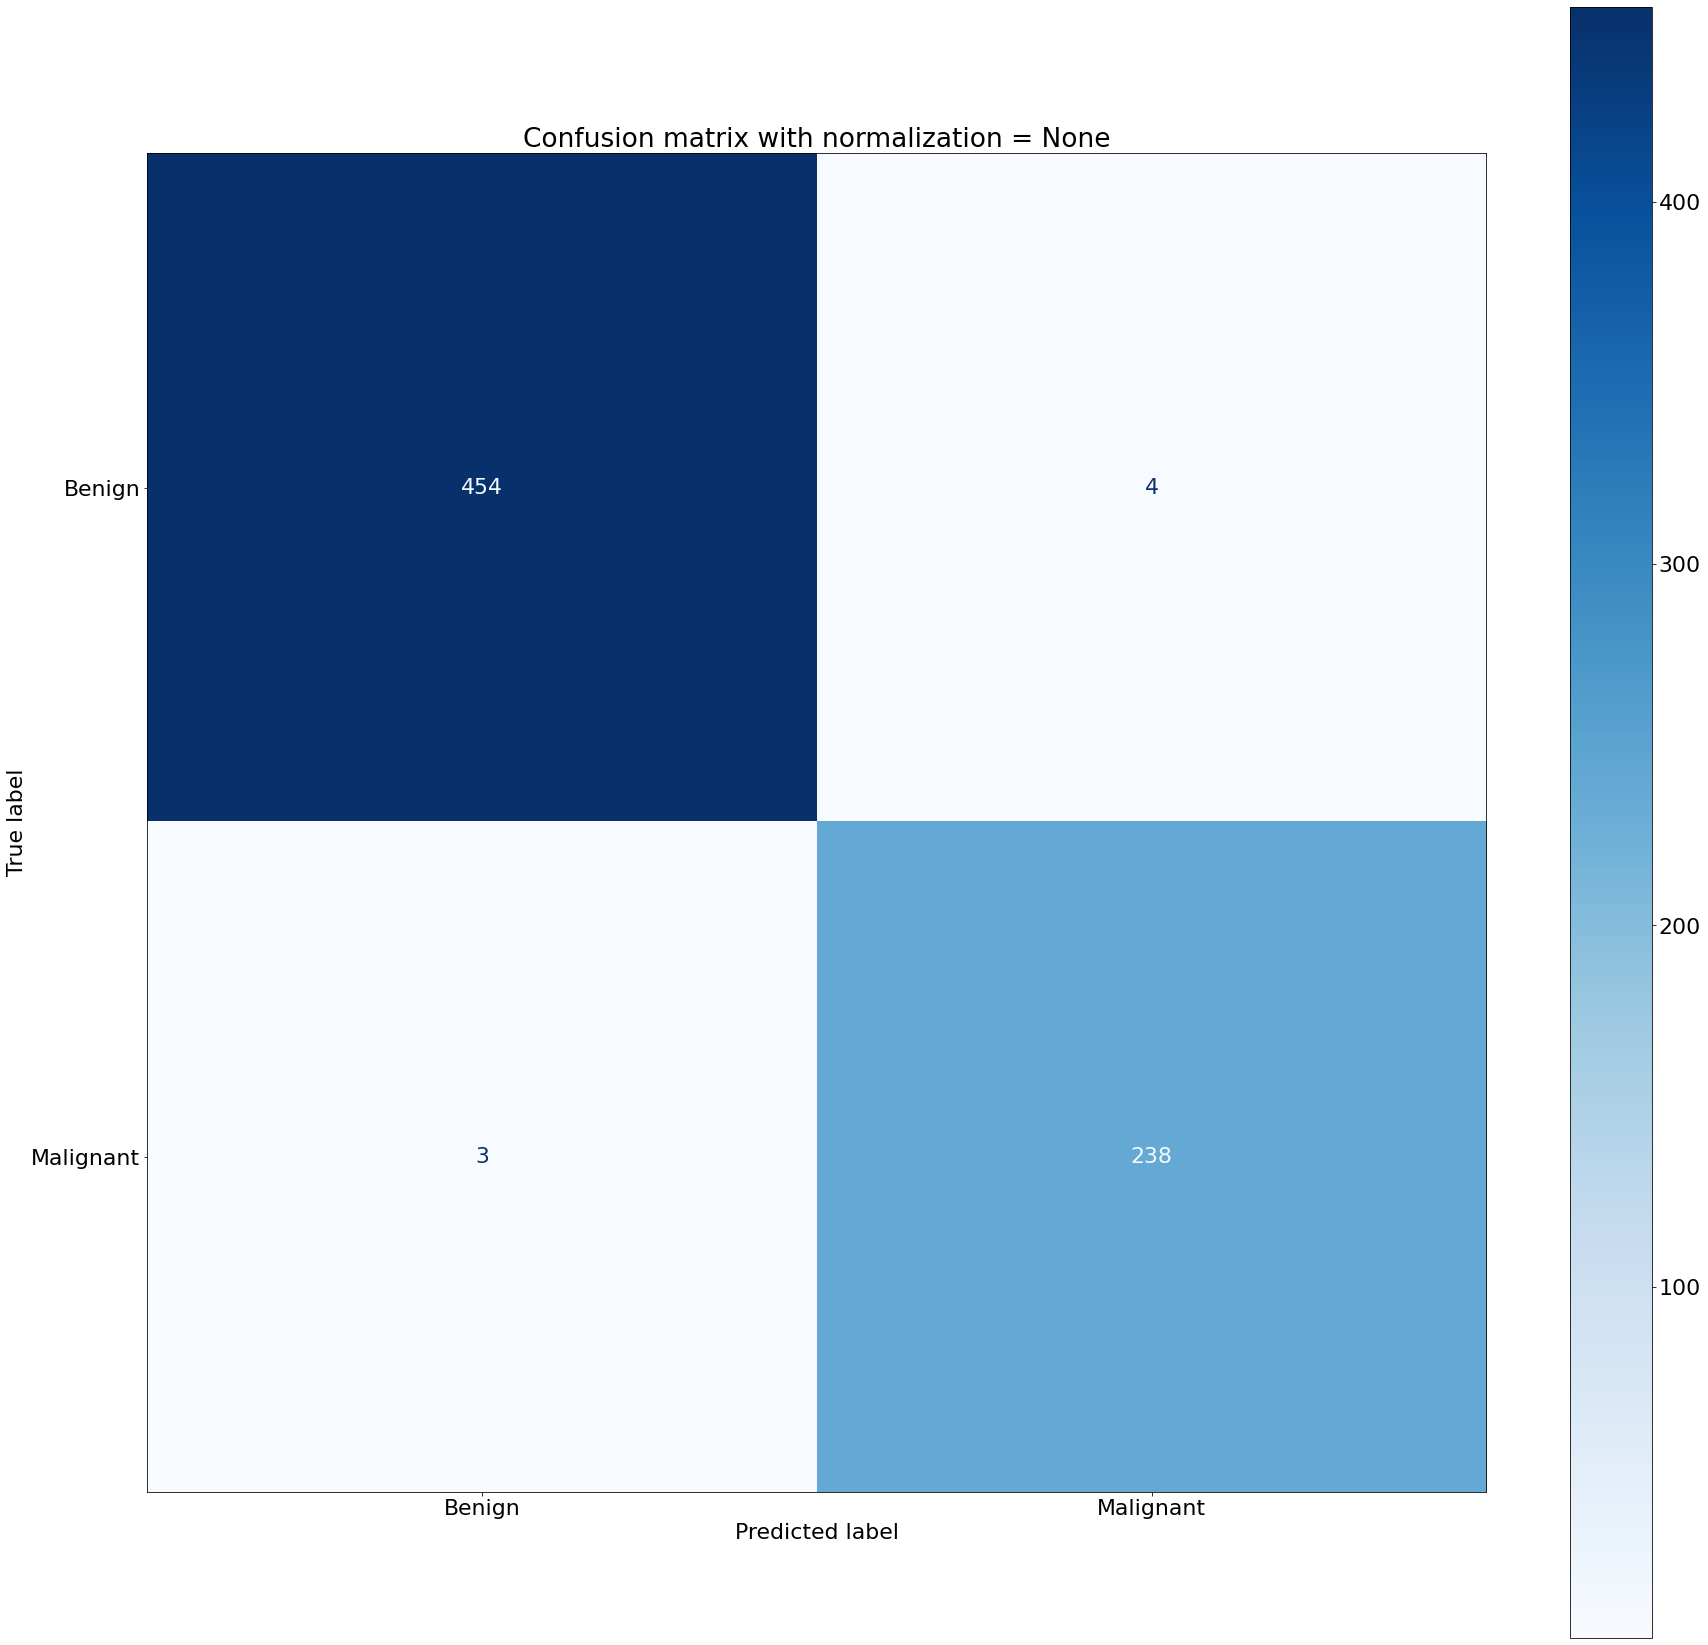

<Figure size 2160x2160 with 0 Axes>

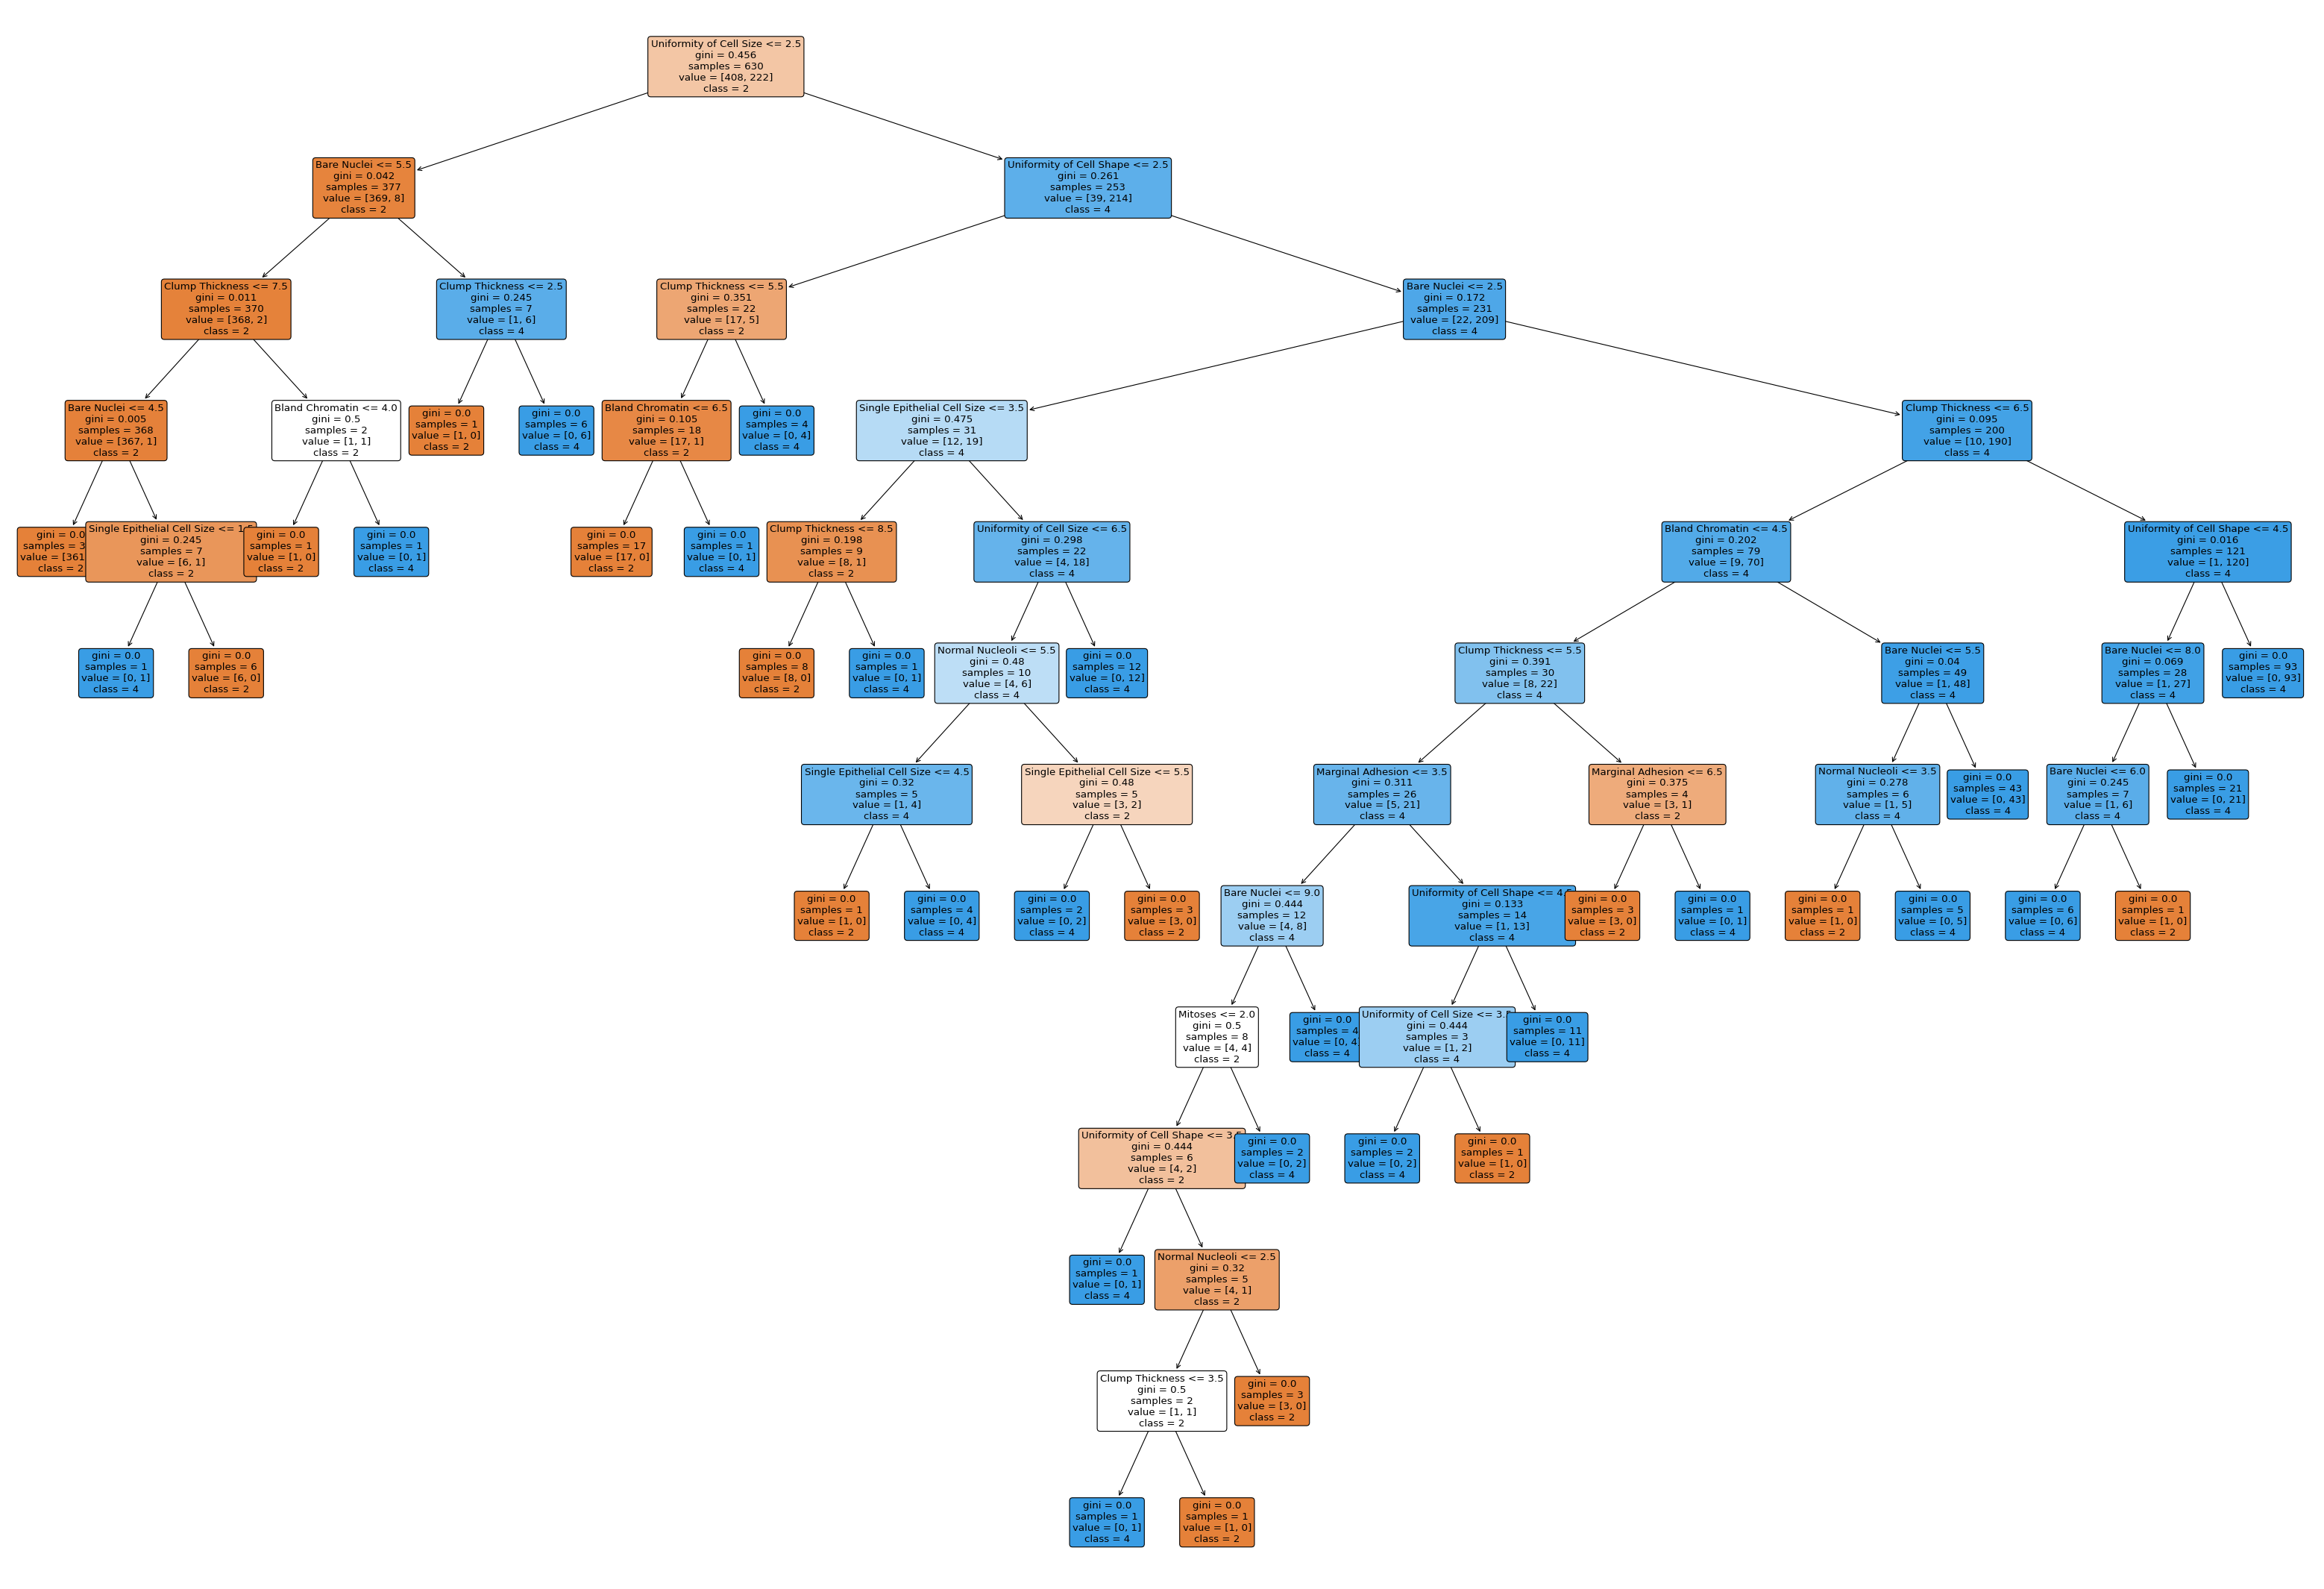

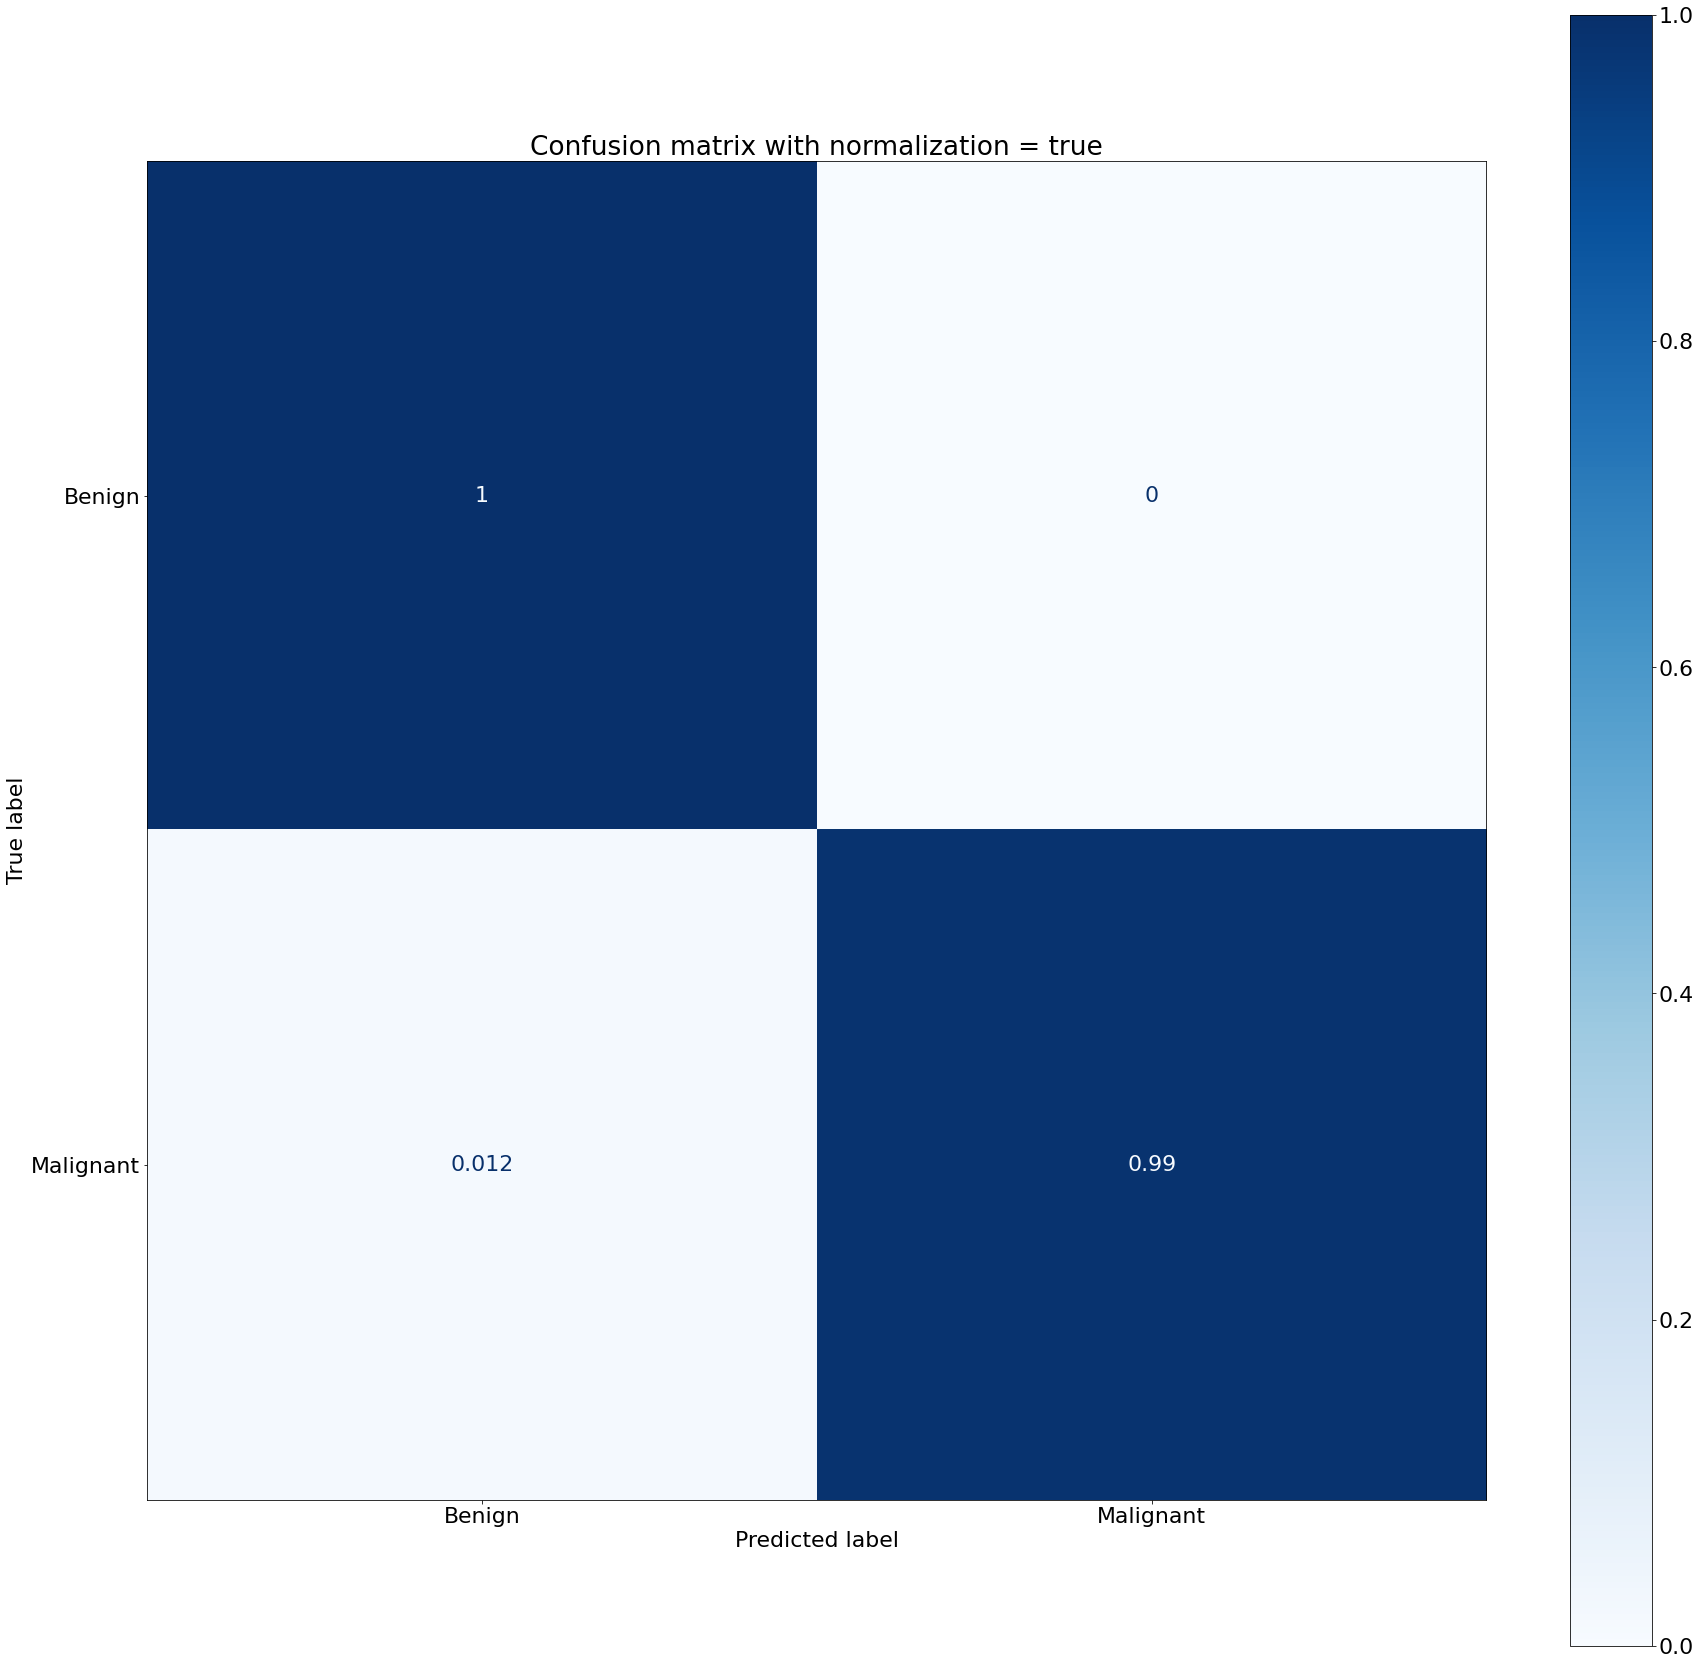

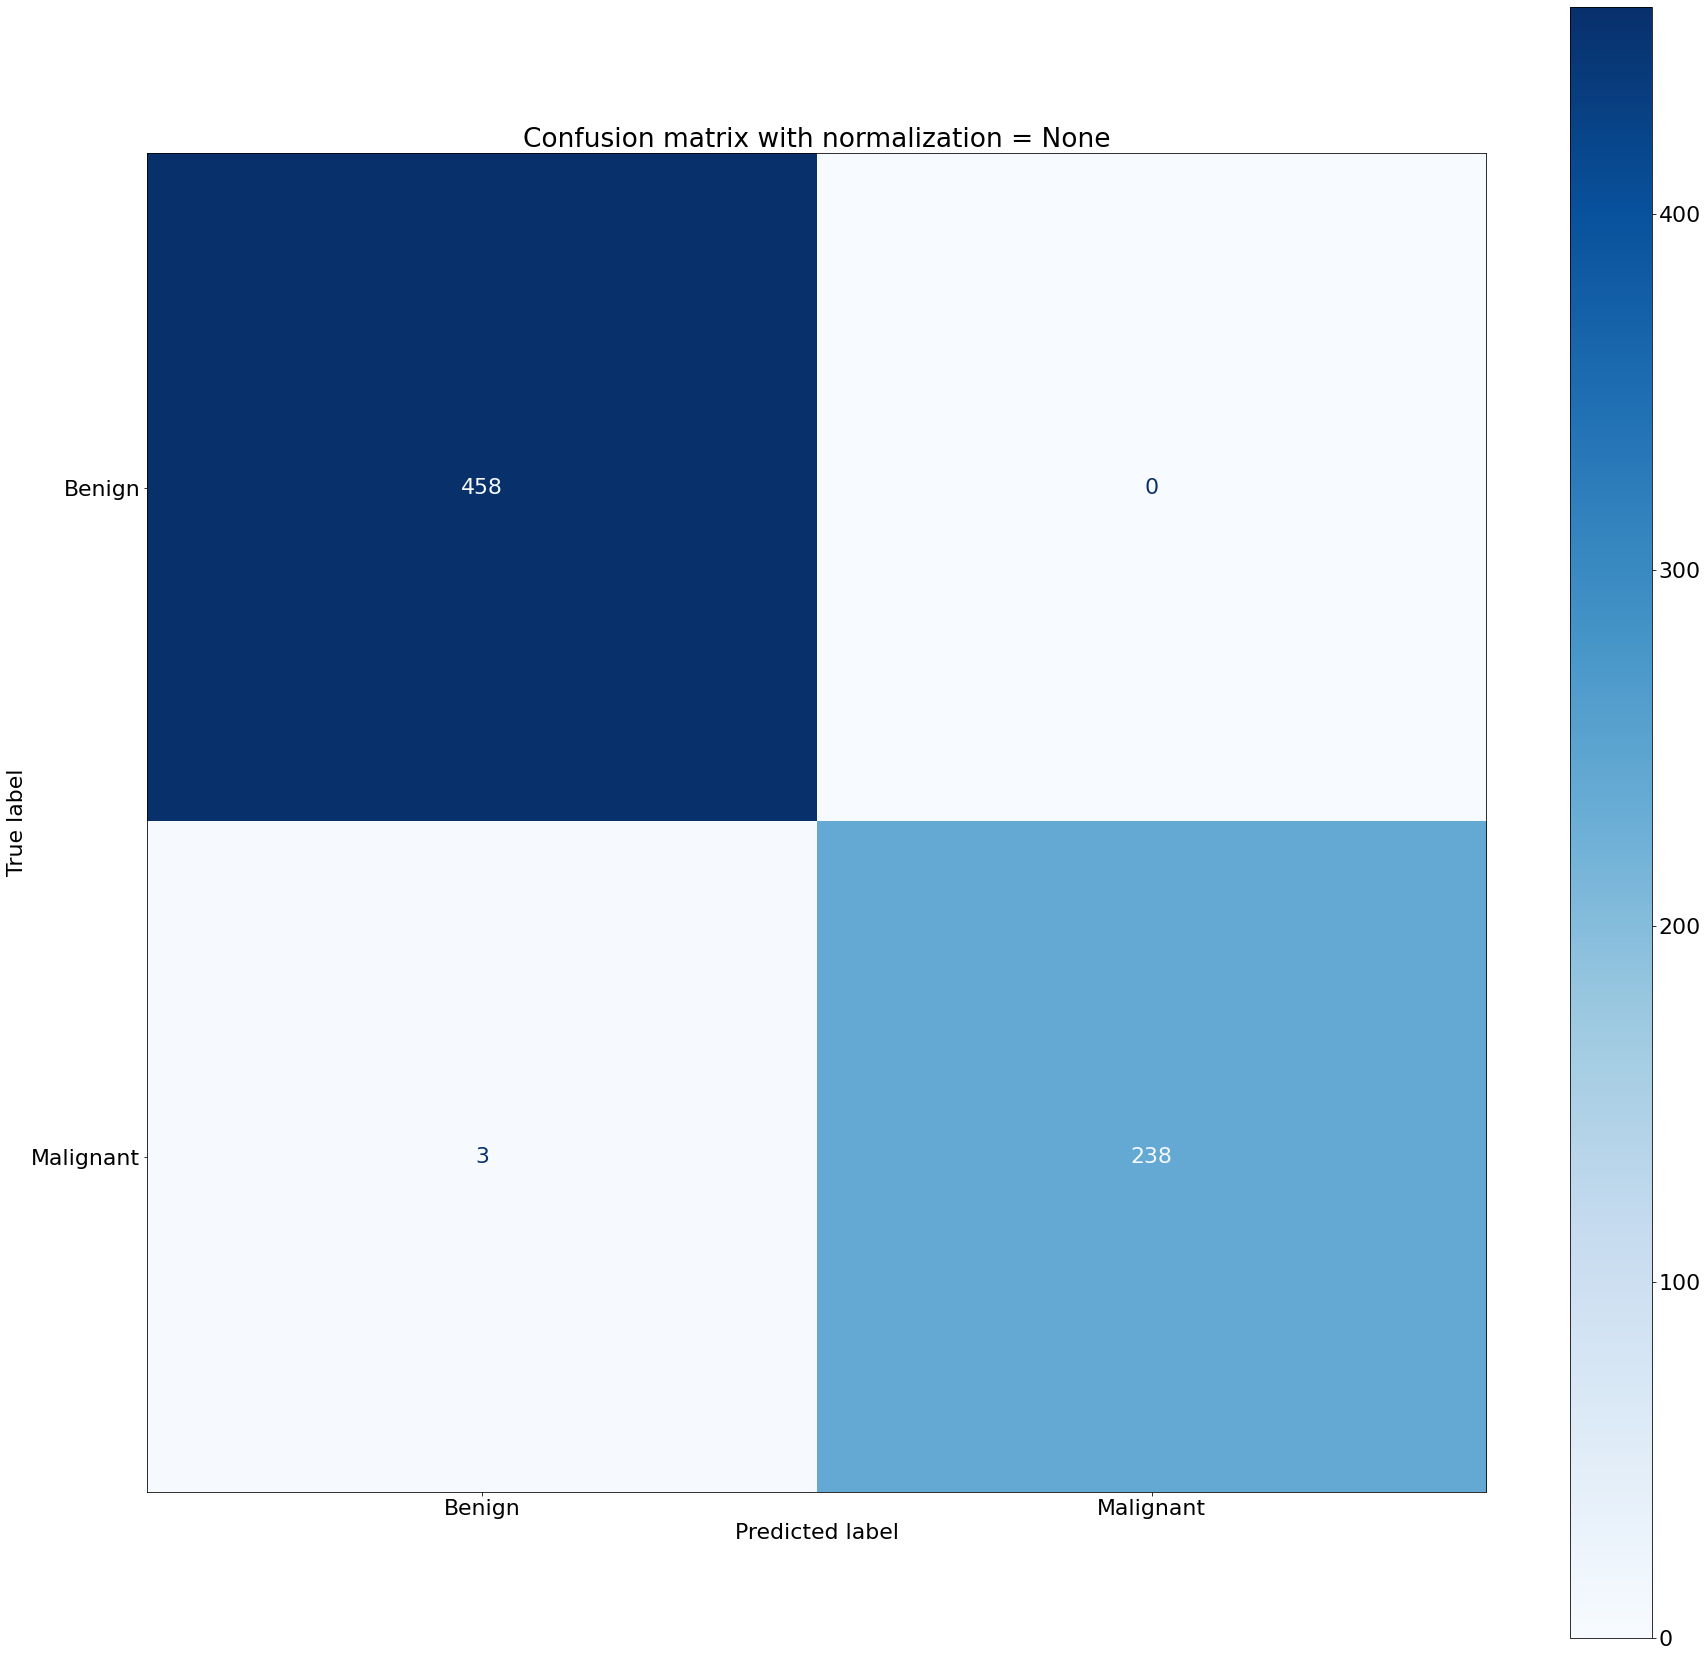

In [99]:
from pandas.plotting import scatter_matrix
from sklearn.model_selection import KFold
k=10
#x = tree.plot_tree(clf,feature_names=features,class_names=labels.astype(str),rounded=True,filled=True) 
#now you have to fit k models using the various splits
#after showing that there is isn't much sampling skew you can cross validate this way and choose a tree closest to the 
#mean value above or take a worst case
#note the splitting of folds occurs by randomly, use random state for reproducible results
#define a dataframe to store all the models
models = pd.DataFrame(columns=["score","model"])
# breakpoint()
#loop over all possible models

#shuffle reorders the data for less bias and changes the cross val score from above
kf = KFold(n_splits = k, shuffle = True, random_state = 0)
i=0
model_scores=[]
print('Average K-Fold Score :' , np.mean(scores)) 
for train_index, test_index in kf.split(X):
    
    x_train = X.iloc[train_index]
    x_test = X.iloc[test_index]
    y_train = Y.iloc[train_index]
    y_test= Y.iloc[test_index]
    
    #train the model
    model = clf.fit(x_train,y_train)
    predictions = clf.predict(x_test)
    print("model score = ",model.score(x_test,y_test))
    model_scores.append(model.score(x_test,y_test))
    
    
    plt.figure()
    # from matplotlib.pyplot import figure
    #width,length
    plt.figure(figsize=(50, 35), dpi=80)
    #label_font = {'size':'36'}
    #title_font = {'size':'21'}  # Adjust to fit
    plt.rcParams.update({'font.size': 22})
    x = tree.plot_tree(clf,rounded=True,filled=True,class_names=sorted,feature_names=features,fontsize=12) 
   
    #assign model to dataframe
    models.loc[i] = [model.score(x_test,y_test),model]
    
    #increment index in dataframe
    i = i+1
    
    #plot the confusion matrices 1 for normalzied the other un-normalized
    values = ['true',None]
    #cmap='cividis'
    for x in values:
        disp = matrix(clf,X,Y,display_labels=sorted,normalize=x,cmap="Blues")
        disp.ax_.set_title("Confusion matrix with normalization = "+str(x))
        disp.ax_.yaxis.set_ticklabels(['Benign', 'Malignant']);
        disp.ax_.xaxis.set_ticklabels(['Benign', 'Malignant']);
    print(disp.confusion_matrix)
